# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?<br>
Answer:  Cas4U is startup company whose project is to addres the pre-owned market, as this market is constantly growing and now is even bigger than the new car market (4M vs 3.6M).

The crutial part of the project, and for this project to be succesfull, the company has to be able to set a price on a vehicule as accurately as possible.

The reason is to make it easy for the seller to know at which price the car can be sold, and set it as a base price to sell. This is due to the fact that in the pre-owned market the price is not set by the manufacturer or the dealer as with discount schemes, but set by the seller. However the price depends on so many factors that it becomes difficult to determine it accurately.

### **The objective:**

 - What is the intended goal?<br>
 Answer: The goal is to be able to predict accurately the price of a vehicule from a set of data. The seller should be able to get a price for his vehicule provided he gives some caracteritics of it. ==> what if he doesnt provide all the infos ?

### **The key questions:**

- What are the key questions that need to be answered?<br>
Answer:
* Is the data usable ?
* What kind of treatments should be done ?
* What are the metrics of each model ?
* Which model is the best to be used ?
* What the most important features ?
* Is the seller able to give all the required criterias afterwards ?

### **The problem formulation**:

- What is it that we are trying to solve using data science?<br>
Answer: We are trying create a model to be able to predict - as accurately as possible - a car value for the company through on predefined criterias or features.

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

#### Common libraries

In [1]:
#none

#### My own library: DeepSpace

**This code is my own library that I developped for my own understanding. <br>
Also after observing the repetitive tasks involved in machine learning, and the incremental work involved. My main goal is to go faster in coding and concentrate on analysis.<br>
The library is shared on GitHub: [Deepspace](https://github.com/0xfade-data-science/deepspace).**

In [2]:
########################################################################
######### DeepSpace, Machine Learning Library
######### Author : Faycal Dembri, fdembri@gmail.com
######### Date : 02/04/2024
########################################################################
#import sys
#sys.path.append(r'C:\Users\fdemb\Documents\Work\Projets.AI.MIT.MyCode.dev')
#Always start with this code :
from deepspace.Initialize import Initialize

# will initialize the seed for random functions for the whole project and remove warnings if need
# will show versions of main used libraries

Initialize(seed=10, 
            use_sep=False, 
            verbose=False, 
            ignorewarns=True) 


Seed: 10
##############################


##############################
##############################


##############################


### **Let us load the data**

In [3]:
file = r'used_cars.csv'

from deepspace.transformers.file.Load import CSVLoader
from deepspace.transformers.chain.Milestone import Milestone

_= (
            CSVLoader(file, ",")
            >> Milestone()
)

### Data Overview

- Observations
- Sanity checks

Let's see the content of the file and some details about the variables.

In [4]:
from deepspace.transformers.overview.Overview import Overview

_ =(
    _
    >> Overview() 
)

(7253, 14)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


**Observations**
* The data has 7253 rows and 14 columns
* S.No. is a sequence, an identifier that is not bring any information for our modeling, and we should remove it later
* Some variables contain null values : Mileage,
Engine,
Power,
Seats,
New_price,
Price
* Majority of the column types is numeric
* Name, Location, Fuel_Type, Transmission, Owner_Type are probably categorical

**Sanity checking**

In [5]:
from deepspace.transformers.overview.SanityCheck import SanityCheck
from deepspace.transformers.overview.Overview import Overview
_ = _ >>  SanityCheck() 

Duplicates found : 0
Feature *Year*: found 58 lower_bound outliers
Feature *Kilometers_Driven*: found 258 upper_bound rows outliers
Feature *Mileage*: found 81 lower_bound outliers
Feature *Mileage*: found 18 upper_bound rows outliers
Feature *Engine*: found 65 upper_bound rows outliers
Feature *Power*: found 273 upper_bound rows outliers
Feature *Seats*: found 137 lower_bound outliers
Feature *Seats*: found 1015 upper_bound rows outliers
Feature *New_price*: found 108 upper_bound rows outliers
Feature *Price*: found 718 upper_bound rows outliers


**Observations**:
* Null values:
  * With 86% of null values, New_Price has too many null values and we must analyse it further. We can also remove it, then create our first model and come back to it if needed
  * The other features,  have much less nulls:
    * Mileage has 0.02%
    * Engine : 0.63%
    * Power : 2.41%
    * Seats : 0.73%
    * Price : 17%
  * One solution is to replace them by the median or the mean. Another one is to drop theses null values but that makes us lose many informations.
  * As to Price, it must be imputed after all other imputations if so.
* Duplicates:
  * No duplicate rows found.
* Outliers:
  * Many outliers have been found for many features
  * We have to analyse that further to get the propre treatment for each one.
  * We can note also that for Seats feature, even if it's numeric, is not a continuous variable - a priori - and should be excluded from the treatment.
  * We found outliers in our target variable Price, we would drop all these

## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

In [6]:
from deepspace.transformers.overview.Describe import DescribeNumerical, DescribeCategorical
_ = _ >>  DescribeNumerical() >> DescribeCategorical()

**Observations**
* S.No. and Year information has no meaning here
* Seats:
  * we have on average 5 seats per car +/-0.8, which means on average a car has between 4.2 and 5.8 seats
  * 75% of the cars have less than 5 seats, we might have outliers
* Kilometers_Driven
  * on average a cas has about 59k Miles +/- std deviation
  * but standard deviation is very high compared to the mean
  * 75% of data us below 73kKM, we probably have multiple outliers
* Engine
  * average is 1617 +/-595
  * probably some outliers
* Power
  * average is 113 +/-53
  * probably some outliers
* Seats: this is not a continuous variable but a categorical ordinal value
* New_price : will be dropped
* Price
  * average Price is 9.4R +/- 11R
  * 75% of the data is less than 10R
  * and the max beeing at 160R we anticipate outliers

In [7]:
from deepspace.transformers.overview.CheckUniqueness import CheckUniqueness
_ = _ >>  CheckUniqueness() 

**Observations**
* S.No. has as many values as the size of the data, which means it's an record identifier and has to be removed
* Name is a not numeric variable but has too many values for a categorical case, we can investigate further but one option is to remove it
* Seats is numeric but has small cardinality, we wil consider it an ordinal categorical variable
* Owner_Type, Transmission, Year, Location have low cardinality will be considered categorical variable


In [8]:
#here we adjust the columns that are useful for our analysis
from deepspace.transformers.column.categorical.Adjust import Adjust as CatAdjuster 
from deepspace.transformers.column.numerical.Adjust import Adjust as NumAdjuster 

_ = ( _ 
     >> CatAdjuster([     
                #'Name',
                'Location',
                'Year',
                'Fuel_Type',
                'Transmission',
                'Seats', #not continuous, but ordinal data
                'Owner_Type'])
    >> NumAdjuster([
                'Kilometers_Driven',
                'Mileage',
                'Engine',
                'Power',
                'New_price',
                'Price',
        ])
)


**Observations**
* Here we define which from our features are categorical and which are numerical, for the next analysis tasks

### **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perfoem the log_transformation(if needed) and write down your observations?

### **Univariate Analysis for Numerical variables**

#### **Univariate Analysis for Numerical Kilometers_Driven variable**

Kilometers_Driven
60000    0.013236
65000    0.011857
45000    0.011857
70000    0.010616
50000    0.009927
           ...   
87200    0.000138
48324    0.000138
20773    0.000138
66355    0.000138
72443    0.000138
Name: proportion, Length: 3660, dtype: float64
--------------------------------------------------


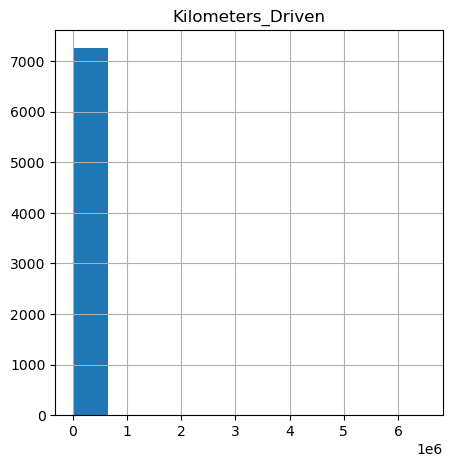

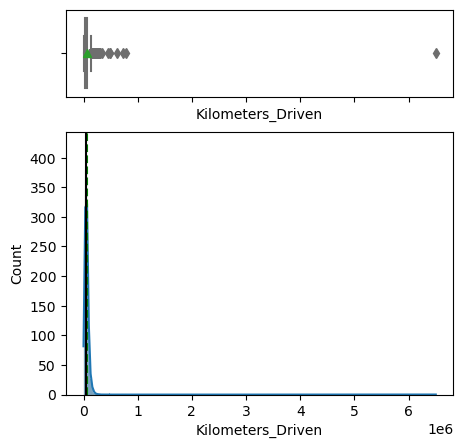

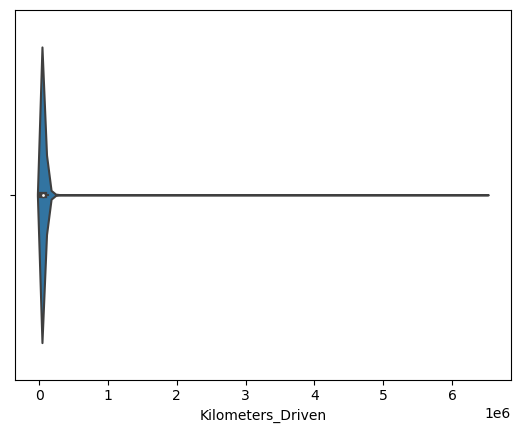

In [9]:
#DeepSpace way:
from deepspace.transformers.exploration.univariate.numerical.UnivariateAnalysis import UnivariateAnalysis
#Deepspace will show calculations and multiple charts by default
_ = (_ 
    >> UnivariateAnalysis(num_cols=['Kilometers_Driven'], figsize=(5,5)) 
)


**Observations**:
* Here we see that the Kilometers_Driven distribution is right skewed
* We observe also a lot of outliers
* There is outliers at more than 6 million of kilometers, this is unexpected and seems to be an error - we will treat it at such for now.
* We may use log transform to make it more normal and lower the impact of the outliers


In [10]:
#DeepSpace way:
from deepspace.transformers.outliers.Check import CheckOutliers 
#Deepspace will show calculations and multiple charts by default
_ = (_ 
    # factor is the inter quartile factor to find outliers
    # it is set to 1.5 in general but here we are trying to identify extreme outliers, that's why we set to 100
    >> CheckOutliers(num_cols=['Kilometers_Driven'], factor=100) 
)


Feature *Kilometers_Driven*: found 1 upper_bound rows outliers


**Observations**:
* Here we are looking for outliers that are way too unexpected
* One outlier is very far from interquantile range (more than 100*IQR), we will remove this one

In [11]:
from deepspace.transformers.outliers.Process import ProcessOutliers 
_ = (_ 
    >> ProcessOutliers(num_cols=['Kilometers_Driven'], factor=100, method='median') 
)


averaging outliers 1 rows for Kilometers_Driven


**Observations**: We chose to set this outlier to the median to save some information, but we could also have removed it.

In [12]:
from deepspace.transformers.featureengineering.func.logXPlus1.forward.XY import LogXPlus1 
_ = (_ 
         >> LogXPlus1('Price', 'Price_Log')  #+1 to avoid log(0) which is undefined
         >> LogXPlus1('Kilometers_Driven', 'Kilometers_Driven_Log') 
)

**Observations**:
* We used our predefined LogTransform transformer to transform Price and Kilometers_Driven
* We are not dropping them yet as we need some futher analysis

#### **Univariate Analysis for Numerical Price variable**

Price
4.50     0.014620
5.50     0.013956
3.50     0.013624
4.25     0.012128
3.25     0.011796
           ...   
11.62    0.000166
43.60    0.000166
19.05    0.000166
3.94     0.000166
7.43     0.000166
Name: proportion, Length: 1373, dtype: float64
--------------------------------------------------
Price_Log
1.704748    0.014620
1.871802    0.013956
1.504077    0.013624
1.658228    0.012128
1.446919    0.011796
              ...   
2.535283    0.000166
3.797734    0.000166
2.998229    0.000166
1.597365    0.000166
2.131797    0.000166
Name: proportion, Length: 1373, dtype: float64
--------------------------------------------------


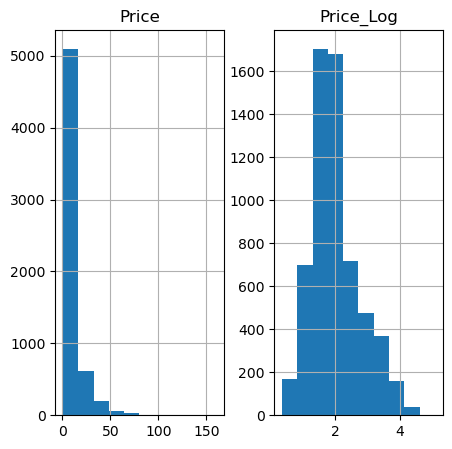

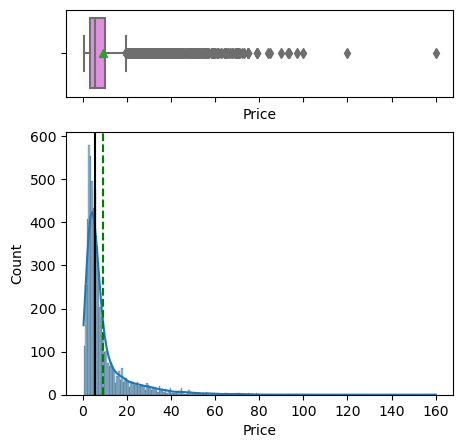

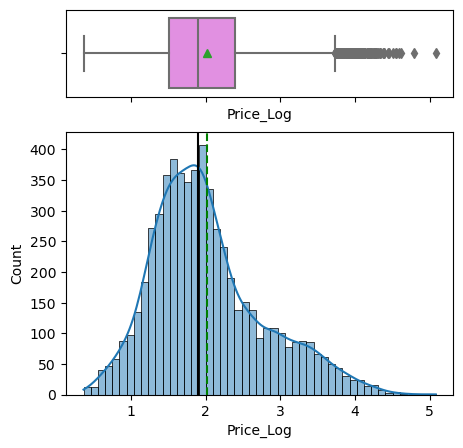

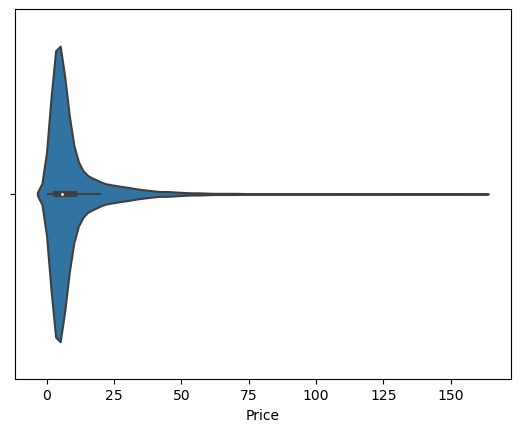

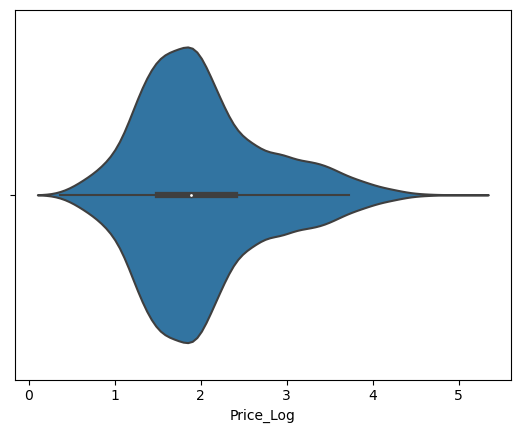

In [13]:
#DeepSpace way:
from deepspace.transformers.exploration.univariate.numerical.UnivariateAnalysis import UnivariateAnalysis
#Deepspace will show calculations and multiple charts by default
_ = (_ 
    >> UnivariateAnalysis(num_cols=['Price', 'Price_Log'], figsize=(5,5)) 
)


**Observations**:
* Price's distribution is right skewed,
* And there's a lot of outliers that have been identified
* We may use log transform because as we see now Price_Log is normal


#### **Univariate Analysis for Numerical Kilometers_Driven variable**

Kilometers_Driven
60000    0.013236
45000    0.011857
65000    0.011857
70000    0.010616
50000    0.009927
           ...   
14001    0.000138
64158    0.000138
20969    0.000138
2900     0.000138
72443    0.000138
Name: proportion, Length: 3659, dtype: float64
--------------------------------------------------
Kilometers_Driven_Log
11.002117    0.013236
10.714440    0.011857
11.082158    0.011857
11.156265    0.010616
10.819798    0.009927
               ...   
9.546955     0.000138
11.069120    0.000138
9.950848     0.000138
7.972811     0.000138
11.190569    0.000138
Name: proportion, Length: 3659, dtype: float64
--------------------------------------------------


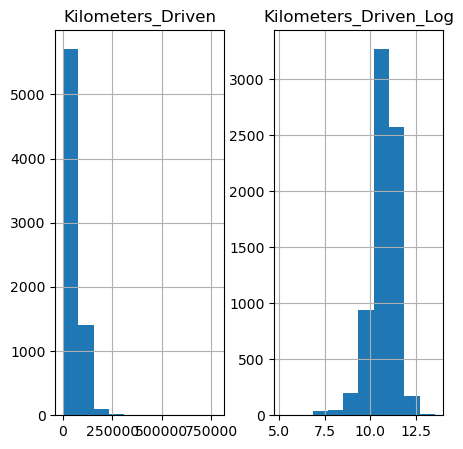

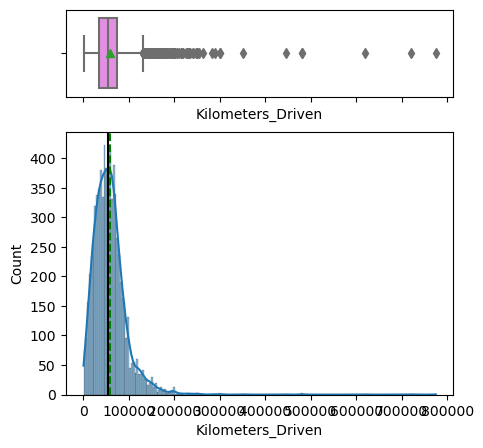

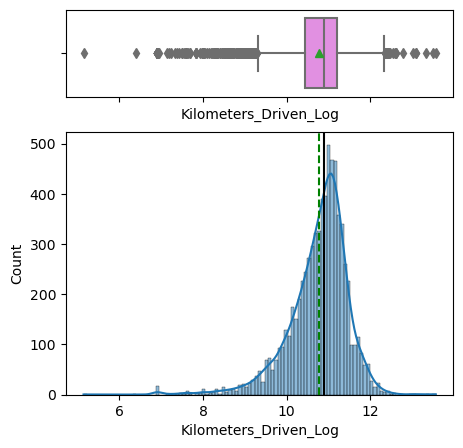

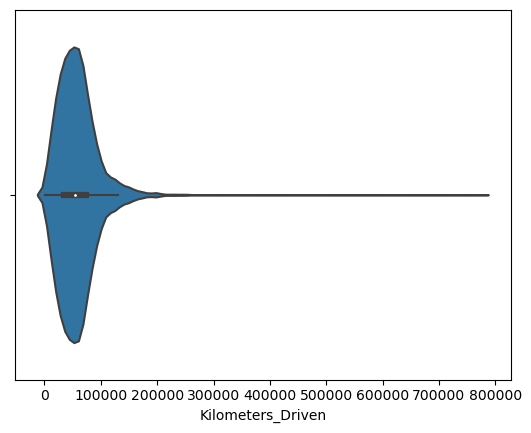

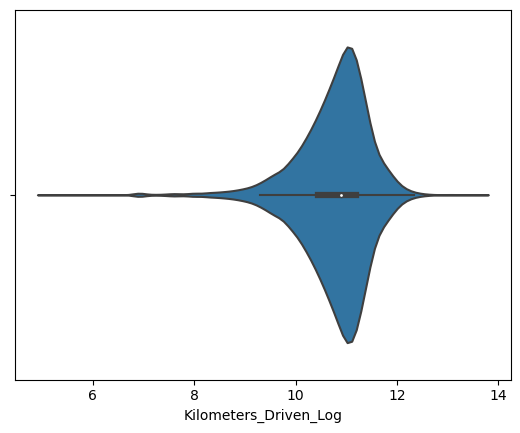

In [14]:
#DeepSpace way:
from deepspace.transformers.exploration.univariate.numerical.UnivariateAnalysis import UnivariateAnalysis
#Deepspace will show calculations and multiple charts by default
_ = (_ 
    >> UnivariateAnalysis(num_cols=['Kilometers_Driven', 'Kilometers_Driven_Log'], figsize=(5,5)) 
)


**Observations**:
* Kilometers_Driven's distribution is right skewed,
* And there's a lot of outliers that have been identified
* As seen above, a log transform will make it Gaussian and removes outliers

#### **Univariate Analysis for Numerical Engine, Mileage and Power variables**

Engine
1197.0    0.101568
1248.0    0.084640
1498.0    0.051339
998.0     0.042875
1198.0    0.038990
            ...   
1489.0    0.000139
1422.0    0.000139
2706.0    0.000139
1978.0    0.000139
1389.0    0.000139
Name: proportion, Length: 150, dtype: float64
--------------------------------------------------
Mileage
17.00    0.028686
18.90    0.027720
18.60    0.019859
21.10    0.014757
20.36    0.014481
           ...   
17.09    0.000138
19.91    0.000138
17.16    0.000138
18.23    0.000138
17.15    0.000138
Name: proportion, Length: 438, dtype: float64
--------------------------------------------------
Power
74.00     0.039559
98.60     0.023453
73.90     0.021475
140.00    0.020062
88.50     0.018649
            ...   
340.00    0.000141
80.90     0.000141
68.10     0.000141
301.73    0.000141
241.60    0.000141
Name: proportion, Length: 383, dtype: float64
--------------------------------------------------


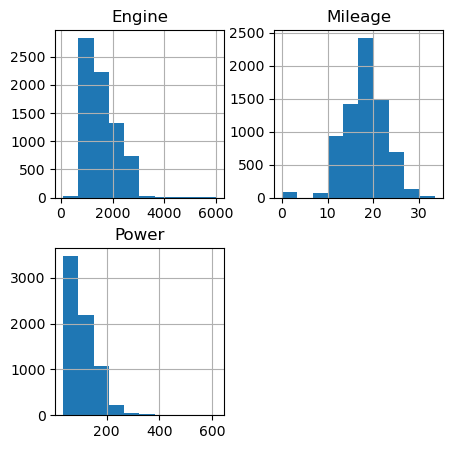

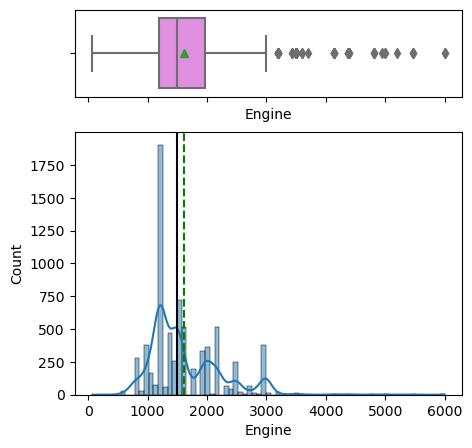

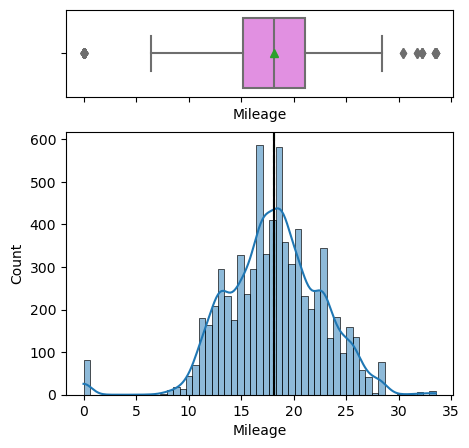

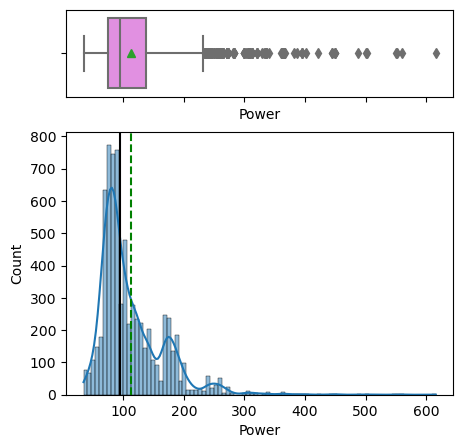

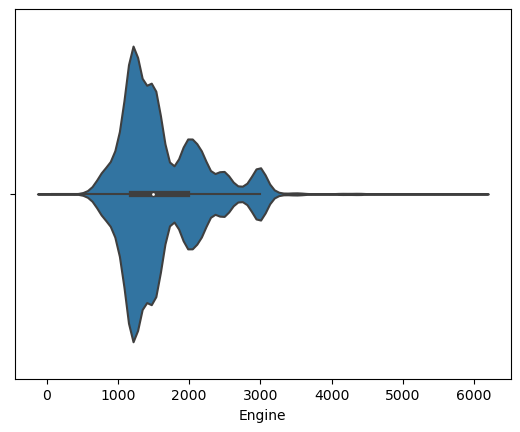

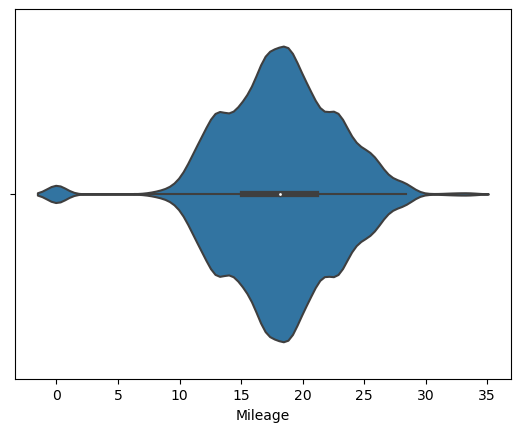

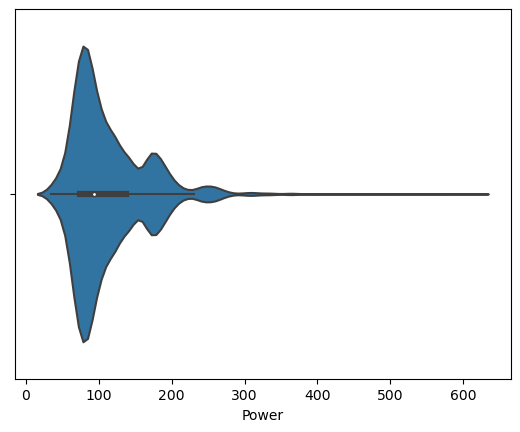

In [15]:
#DeepSpace way:
from deepspace.transformers.exploration.univariate.numerical.UnivariateAnalysis import UnivariateAnalysis
#Deepspace will show calculations and multiple charts by default
_ = (_ 
    >> UnivariateAnalysis(num_cols=['Engine', 'Mileage', 'Power'], figsize=(5,5)) 
)


**Observations**:
* Engine
    * distribution is right skewed,
    * Some outliers identified
* Mileage
    * distribution is quite normal,
    * Very few outliers     
* Power
    * distribution is right skewed,
    * And there's a lot of outliers identified

### **Univariate Analysis for Categorical variables**

Year
2015    0.128085
2014    0.127533
2016    0.122156
2013    0.109058
2017    0.097753
2012    0.095133
2011    0.079829
2010    0.056115
2018    0.049773
2009    0.034744
2008    0.028540
2007    0.020405
2019    0.016407
2006    0.012271
2005    0.009375
2004    0.004826
2003    0.002757
2002    0.002482
2001    0.001103
2000    0.000689
1998    0.000551
1999    0.000276
1996    0.000138
Name: proportion, dtype: float64
--------------------------------------------------
-------------------------------------------------- Year


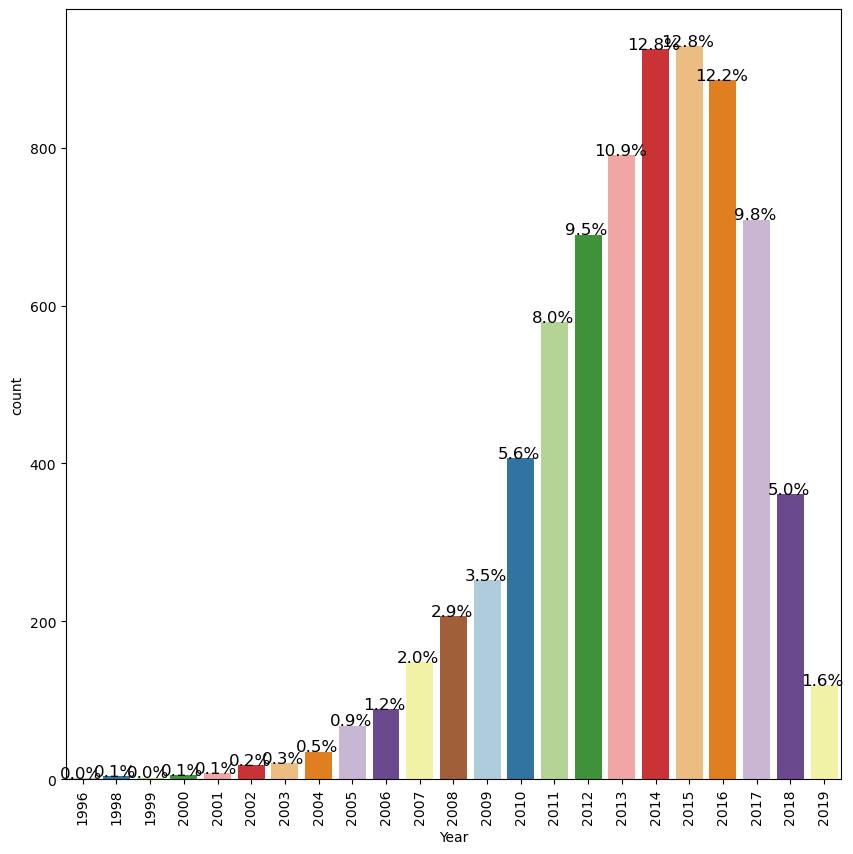

In [16]:
#DeepSpace way:
from deepspace.transformers.exploration.univariate.categorical.UnivariateAnalysis import UnivariateAnalysis
#Deepspace will show calculations and multiple charts by default
_ = (_ 
    >> UnivariateAnalysis(cat_cols=['Year'], ord_cols=['Year'], normalize=True, figsize=(10,10)) 
)


**Observations:**
most cars (81.6%) are between 2010 and 2017

Seats
5.0     0.840000
7.0     0.110556
8.0     0.023611
4.0     0.016528
6.0     0.005278
2.0     0.002500
10.0    0.001111
9.0     0.000417
Name: proportion, dtype: float64
--------------------------------------------------
-------------------------------------------------- Seats


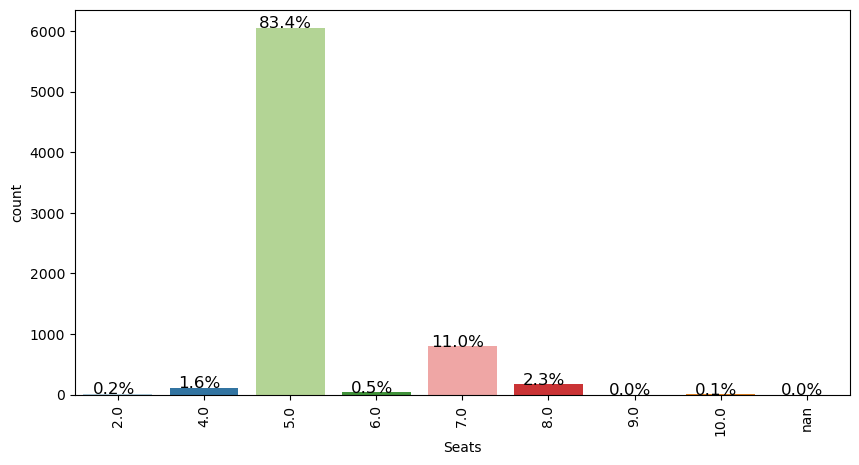

In [17]:
#DeepSpace way:
from deepspace.transformers.exploration.univariate.categorical.UnivariateAnalysis import UnivariateAnalysis
#Deepspace will show calculations and multiple charts by default
_ = (_ 
    >> UnivariateAnalysis(cat_cols=['Seats'], ord_cols=['Seats'], normalize=True, figsize=(10,5)) 
)


**Observations:**
* Seats :
    * Most cars are 5 seats


Fuel_Type
Diesel      0.531091
Petrol      0.458431
CNG         0.008548
LPG         0.001654
Electric    0.000276
Name: proportion, dtype: float64
--------------------------------------------------
-------------------------------------------------- Fuel_Type


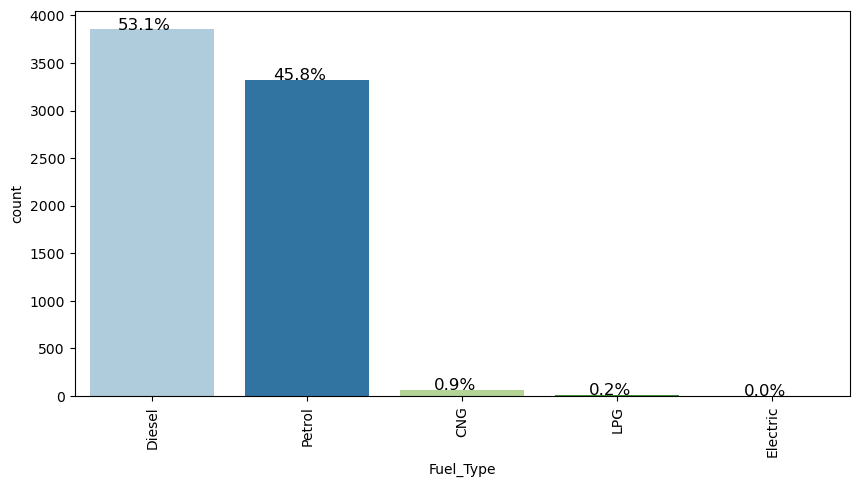

In [18]:
#DeepSpace way:
from deepspace.transformers.exploration.univariate.categorical.UnivariateAnalysis import UnivariateAnalysis
#Deepspace will show calculations and multiple charts by default
_ = (_ 
    >> UnivariateAnalysis(cat_cols=['Fuel_Type'], normalize=True, figsize=(10,5)) 
)


**Observations:**
Around 99.9% of cars are either Diesel or Petrol

Transmission
Manual       0.717496
Automatic    0.282504
Name: proportion, dtype: float64
--------------------------------------------------
-------------------------------------------------- Transmission


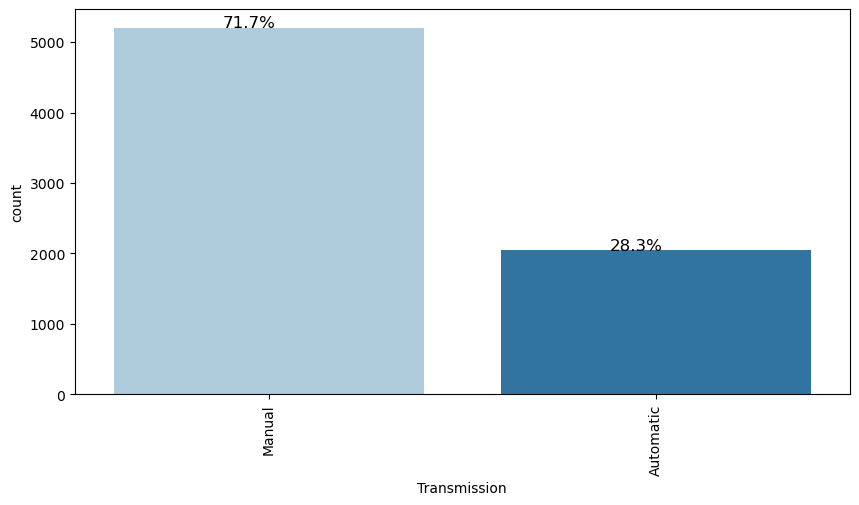

In [19]:
#DeepSpace way:
from deepspace.transformers.exploration.univariate.categorical.UnivariateAnalysis import UnivariateAnalysis
#Deepspace will show calculations and multiple charts by default
_ = (_ 
    >> UnivariateAnalysis(cat_cols=['Transmission'], normalize=True, figsize=(10,5)) 
)


**Observations:**
Around 99.9% of cars are either Diesel or Petrol

Owner_Type
First             0.820626
Second            0.158831
Third             0.018889
Fourth & Above    0.001654
Name: proportion, dtype: float64
--------------------------------------------------
-------------------------------------------------- Owner_Type


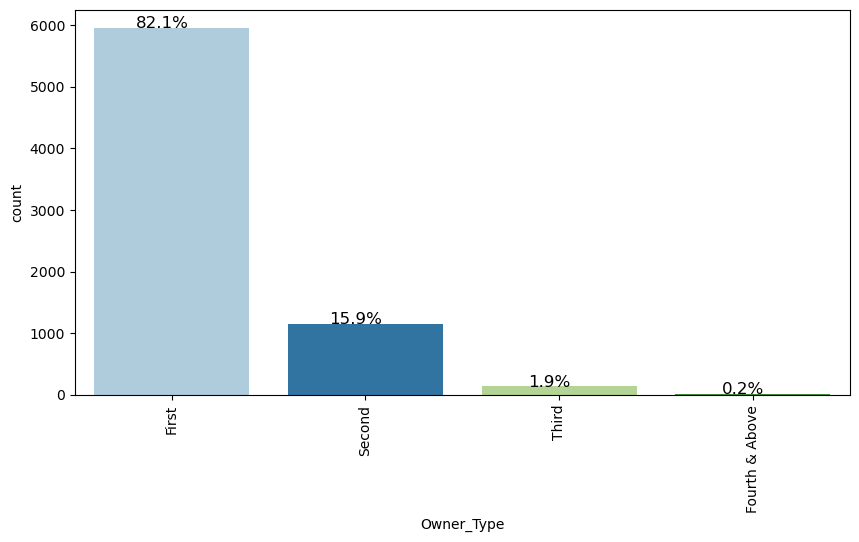

In [20]:
#DeepSpace way:
from deepspace.transformers.exploration.univariate.categorical.UnivariateAnalysis import UnivariateAnalysis
#Deepspace will show calculations and multiple charts by default
_ = (_ 
    >> UnivariateAnalysis(cat_cols=['Owner_Type'], normalize=True, figsize=(10,5)) 
)


**Observations:**
Around 98% of cars are either First or Second hand

### **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

Log transform will be done later and justified.

[('Price_Log', 'Kilometers_Driven_Log')]


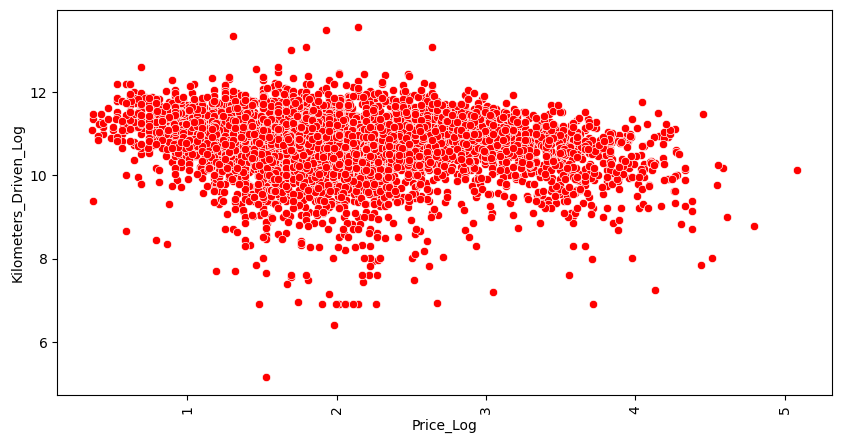

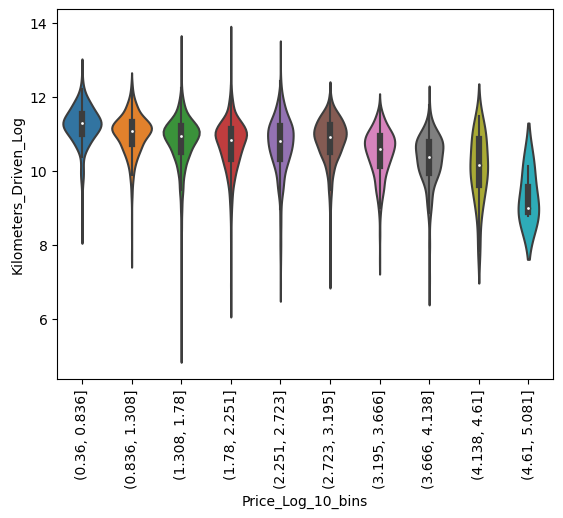

In [21]:
#DeepSpace way:
from deepspace.transformers.exploration.bivariate.NN.NxN import NxN
#Deepspace will show calculations and multiple charts by default
_ = (_ 
    >> NxN(num_cols=['Price_Log', 'Kilometers_Driven_Log'], figsize=(10,5), violin=True, violin_bins=10) 
)


**Observations:**
* There's a linear relationship between the tow variables.


We can check a heatmap to get more insights.

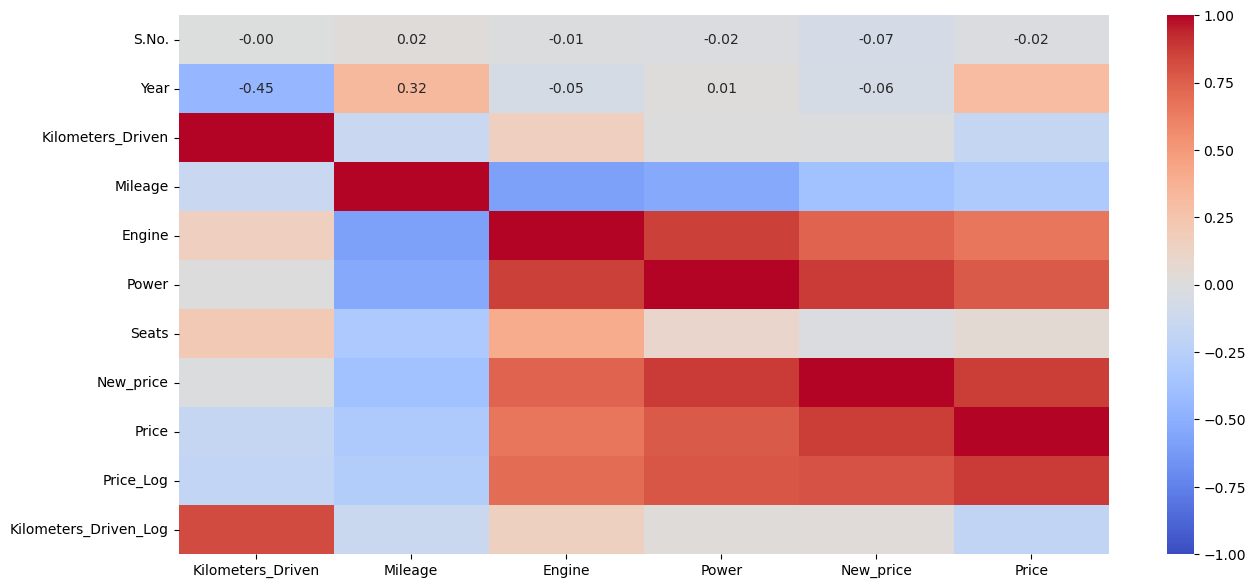

In [22]:
#DeepSpace way:
from deepspace.transformers.exploration.bivariate.CorrHeatmap import CorrHeatmap
_ = (_ 
    >> CorrHeatmap() 
)


**Observations:**
* We see a dependency between Kilometers_Driven and Year, and this relation is less in absolute value than Price_Log
* Year is globaly independent a part from Kilometers_Driven
* Mileage depends on Power and Engine, Seats
* Power dependents on Engine
* Seats depends on Engine

We have detected some patterns between variables and this is a case of multicolinearity.

target None not defined


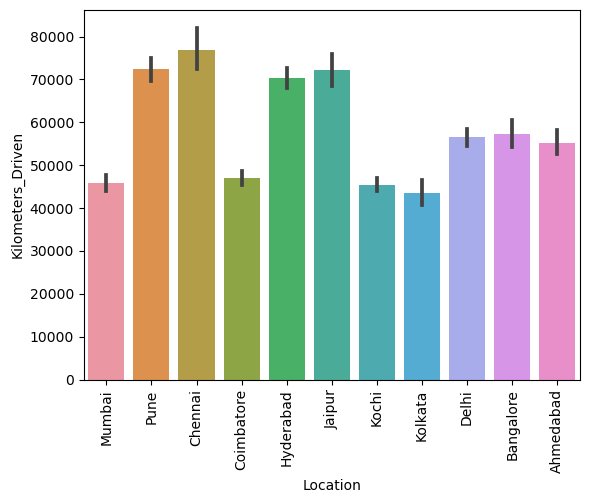

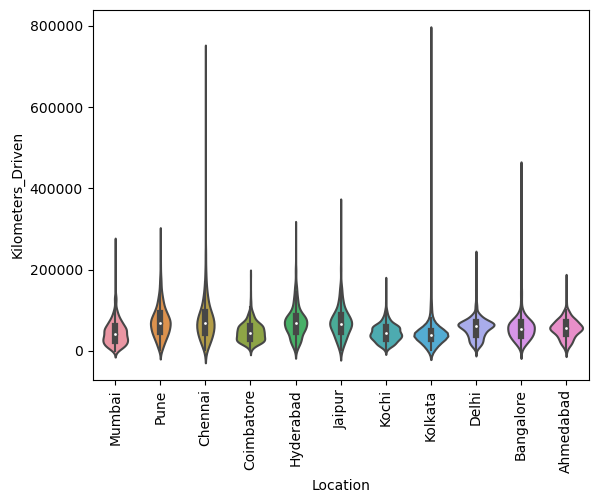

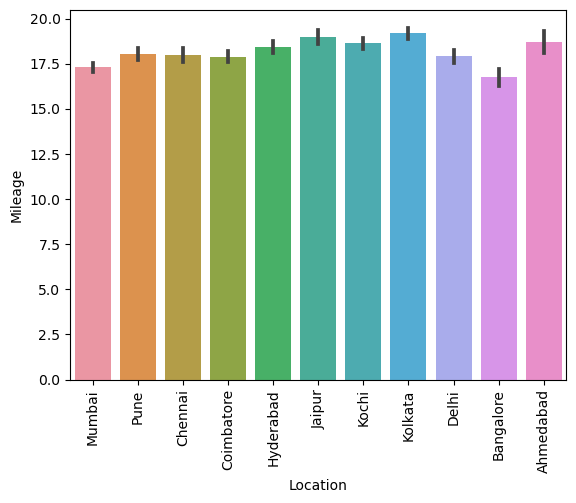

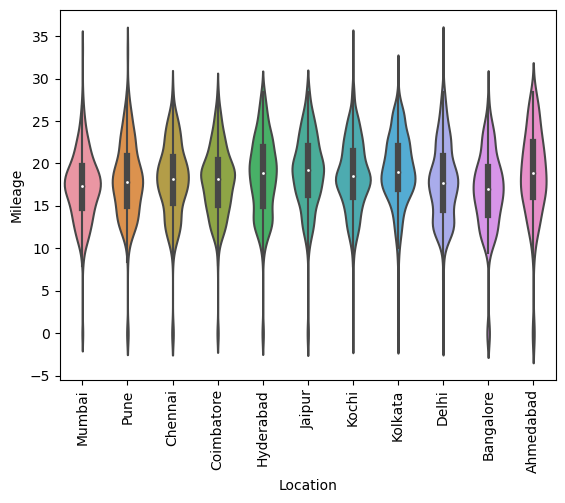

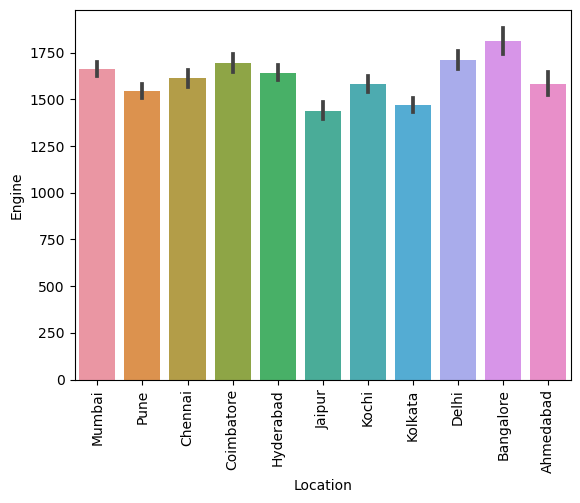

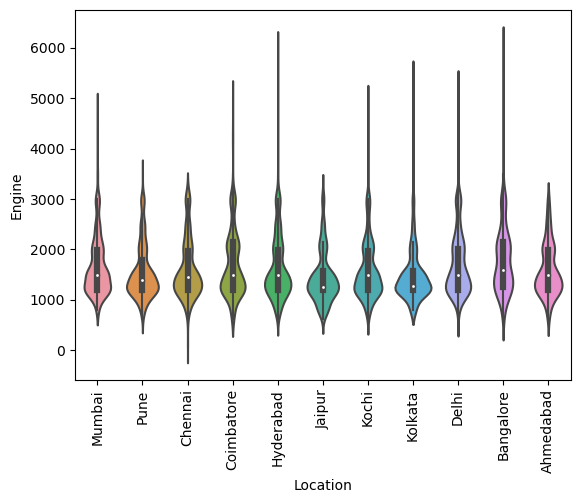

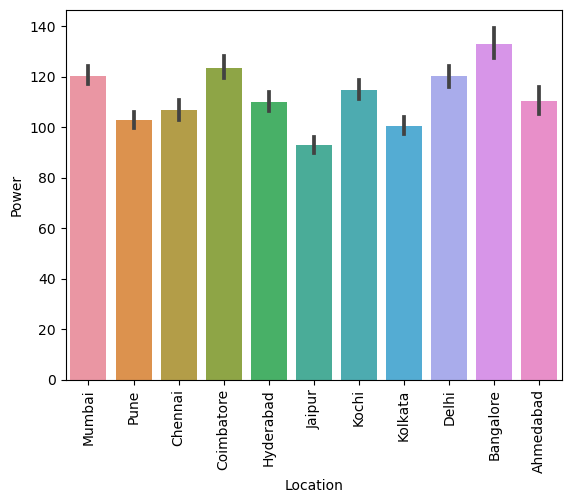

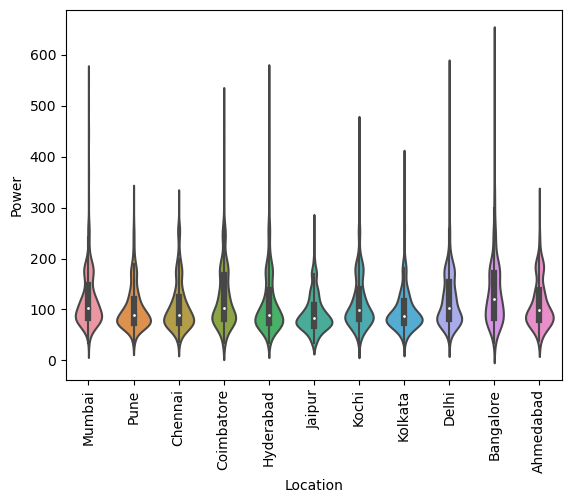

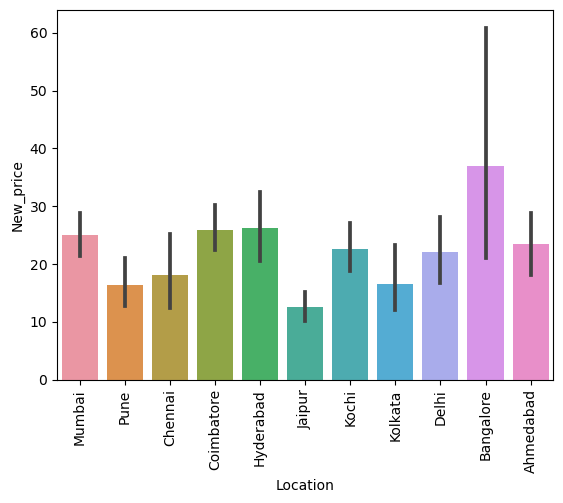

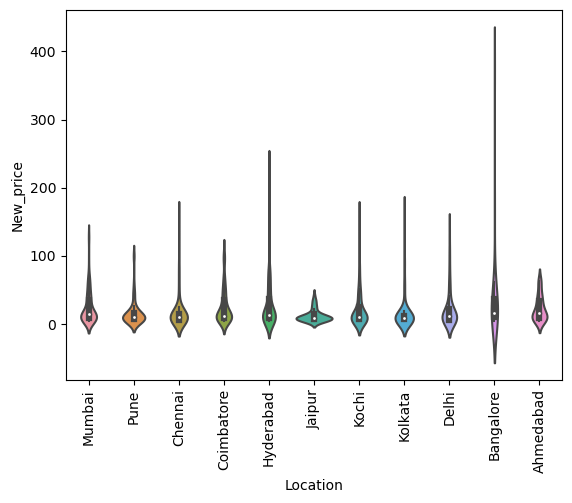

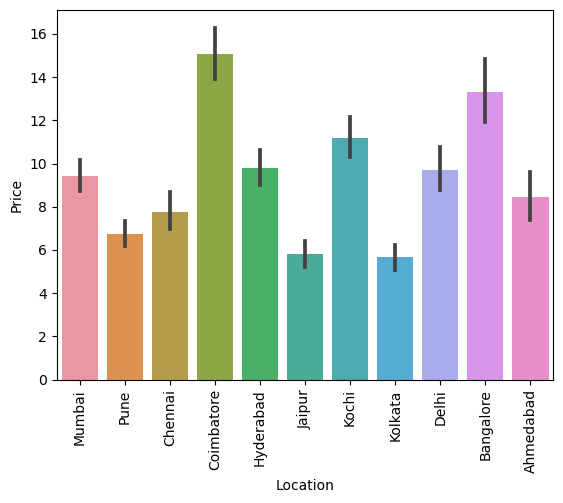

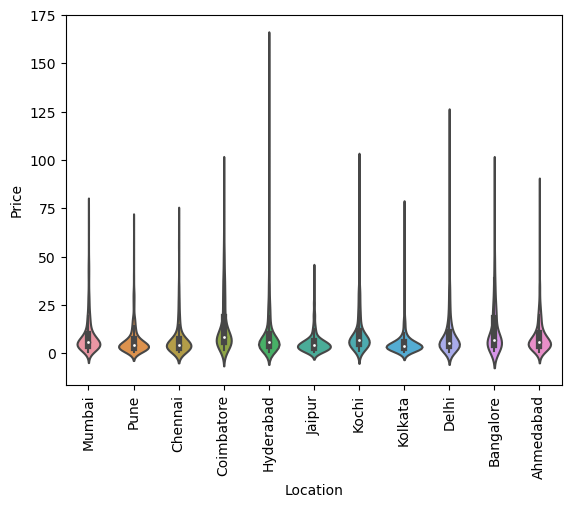

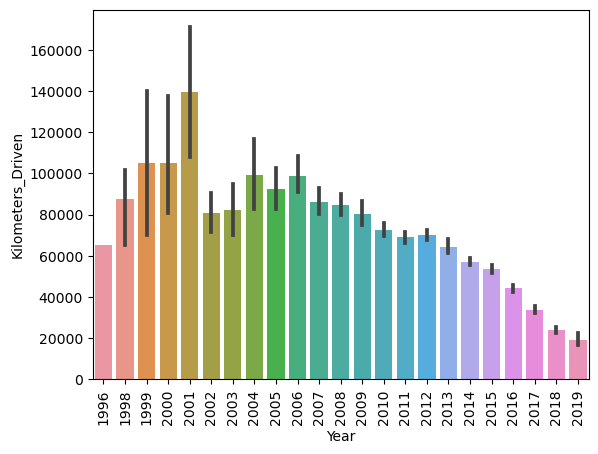

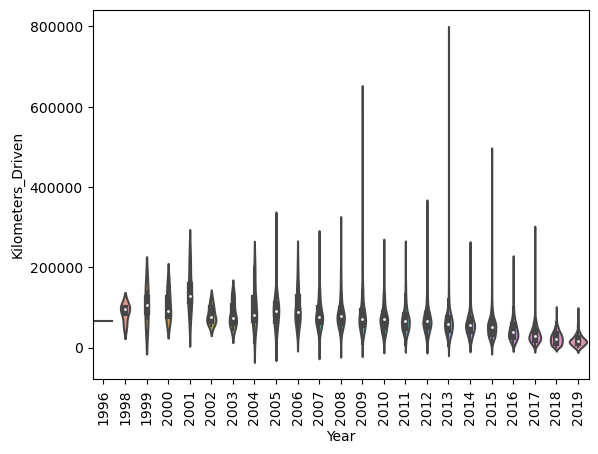

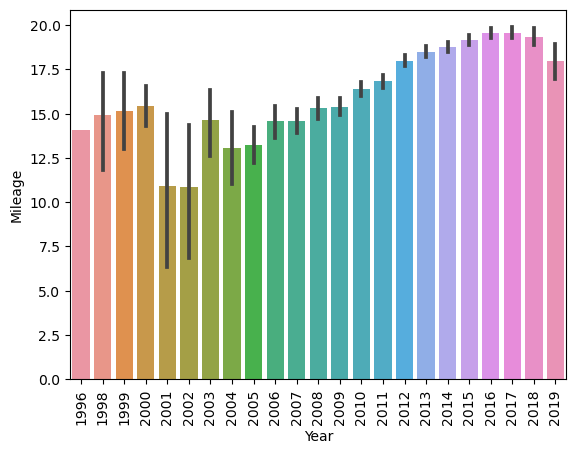

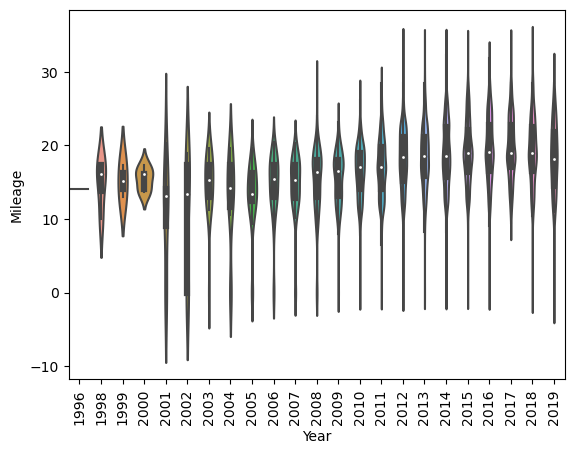

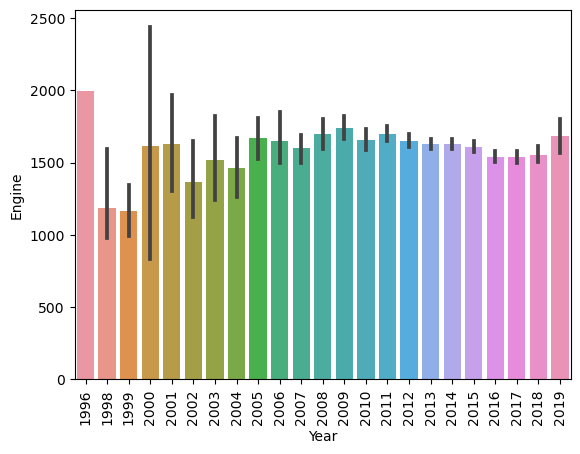

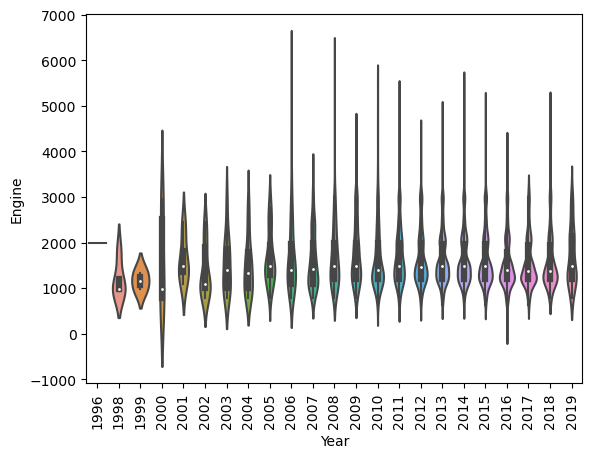

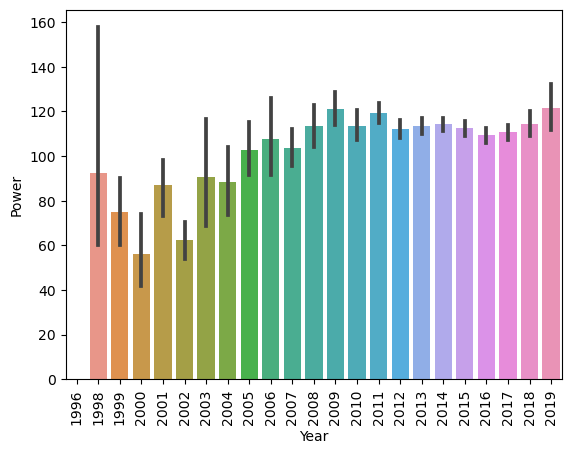

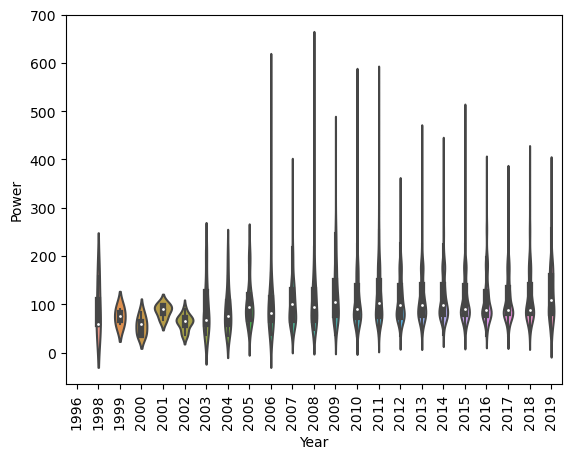

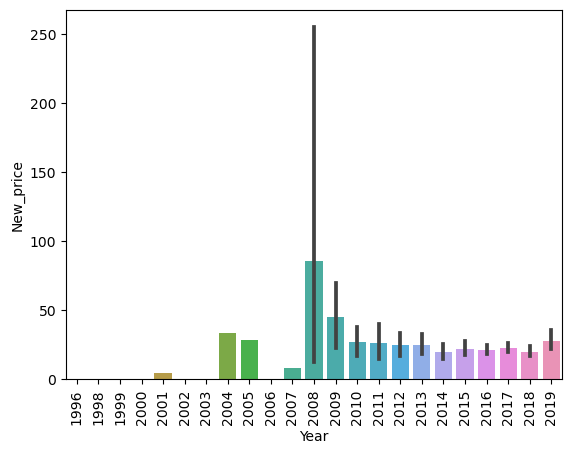

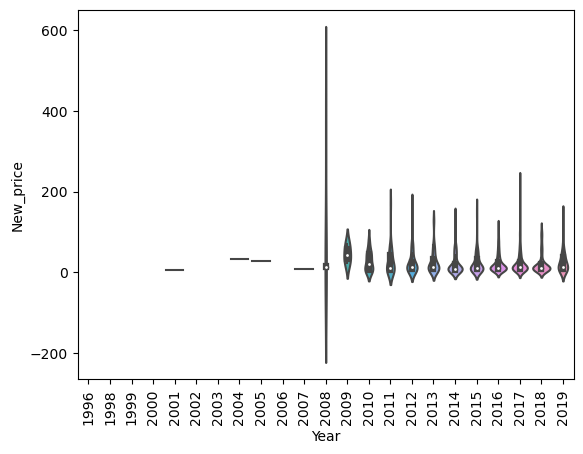

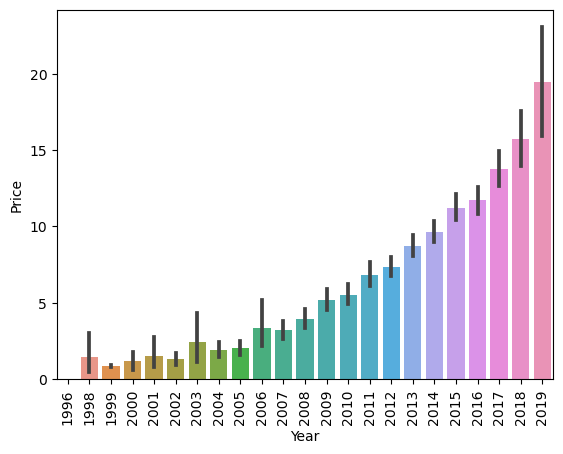

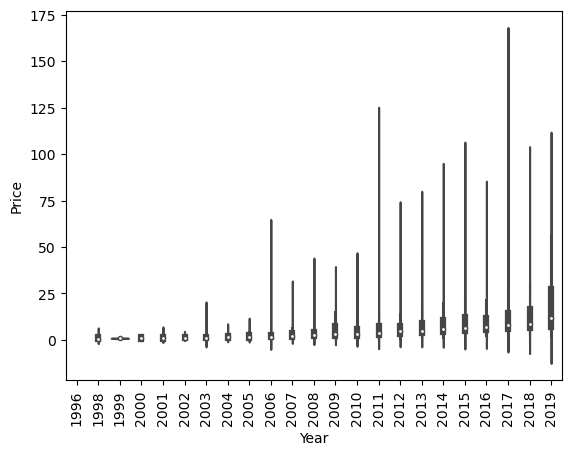

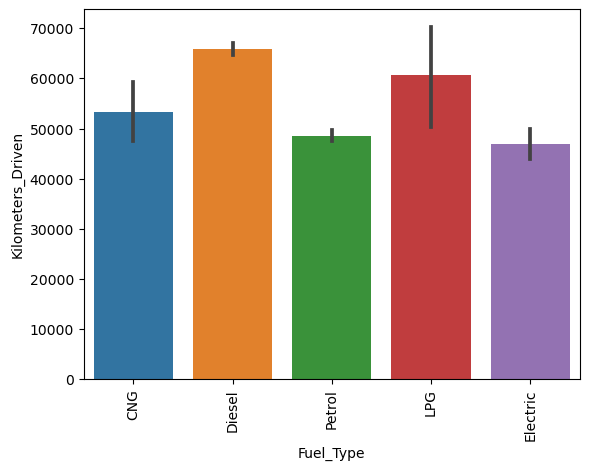

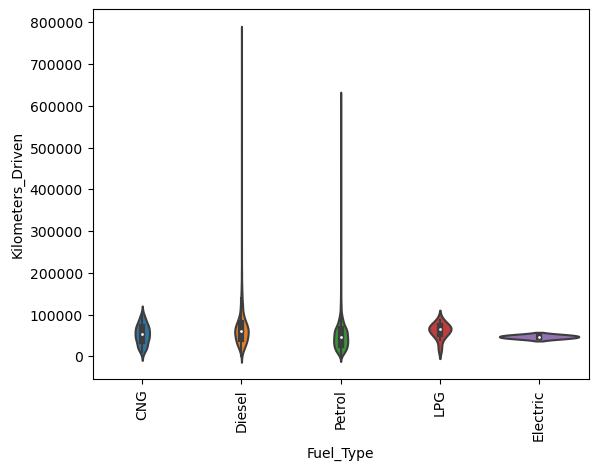

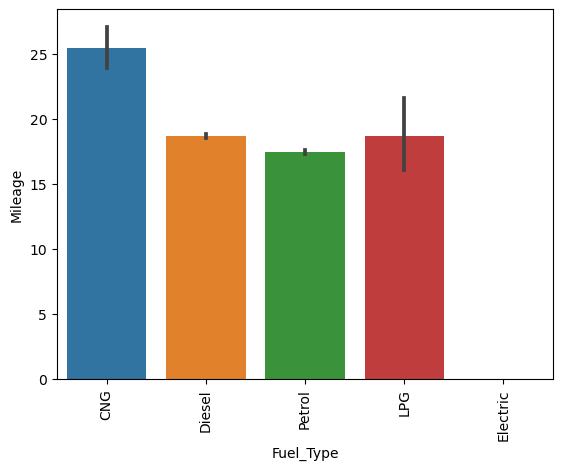

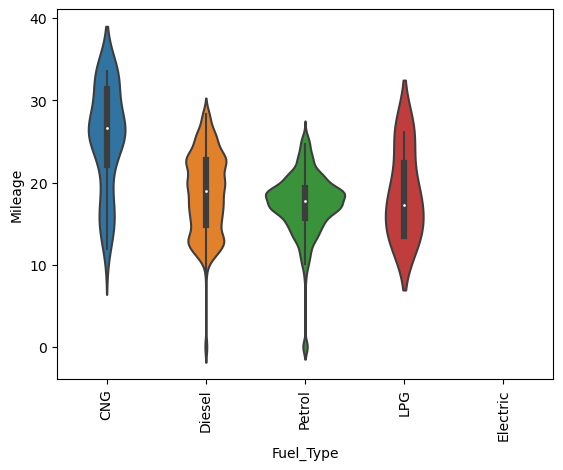

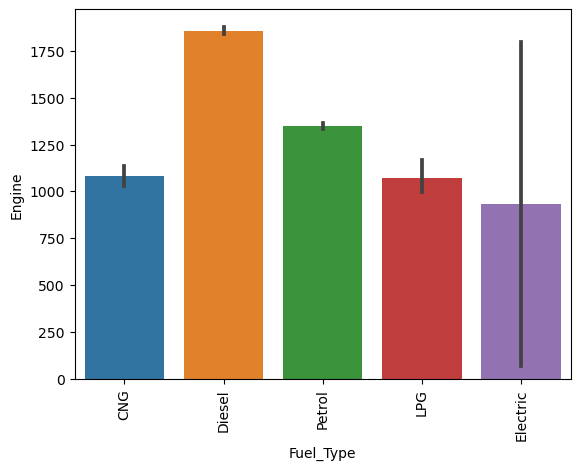

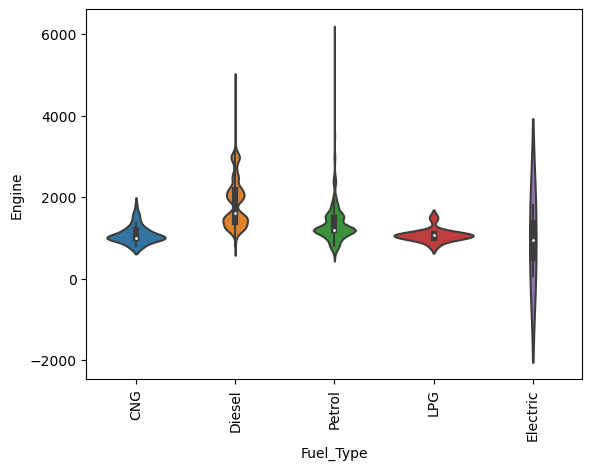

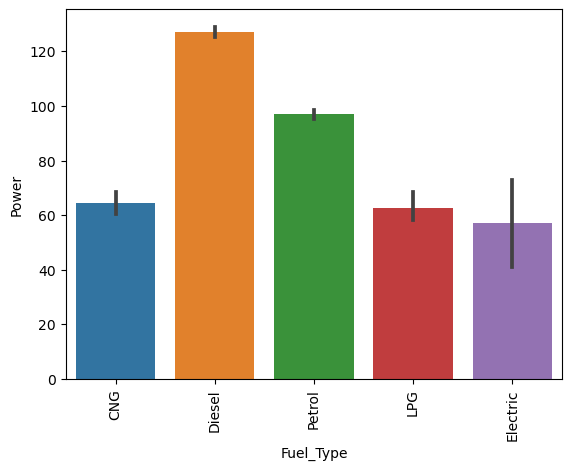

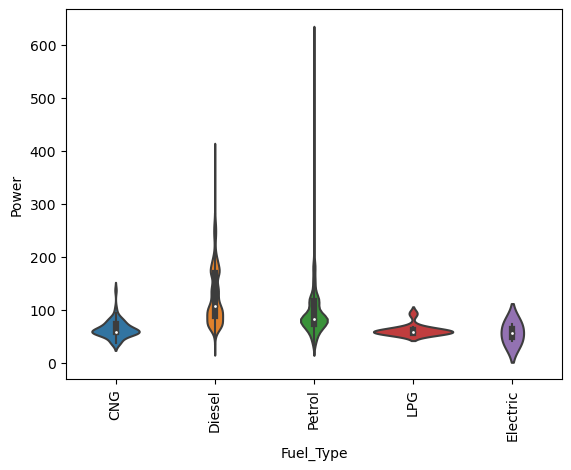

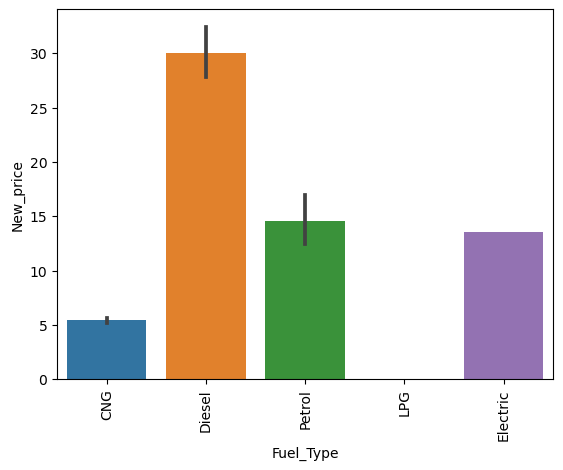

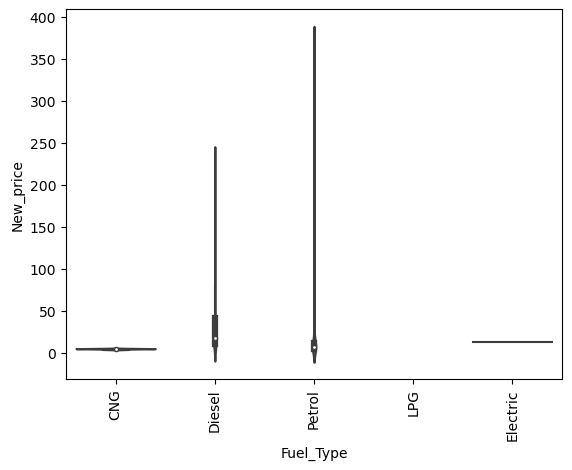

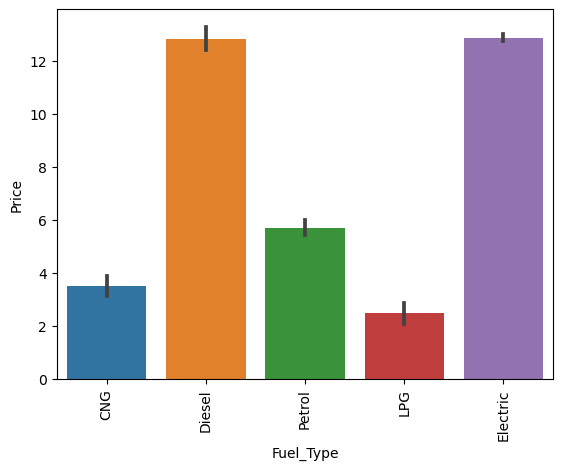

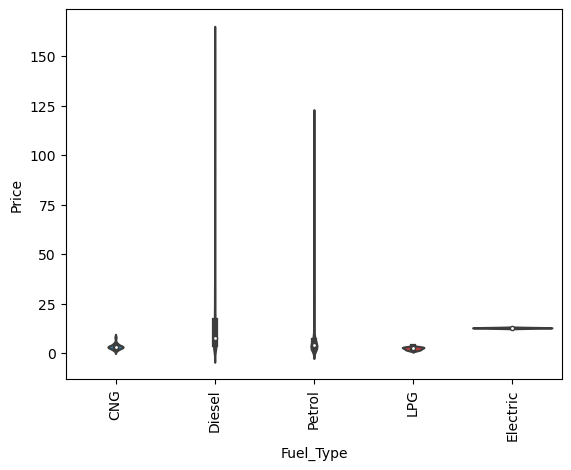

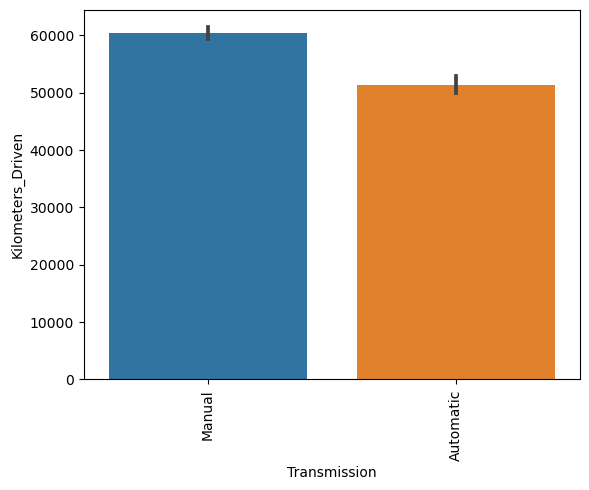

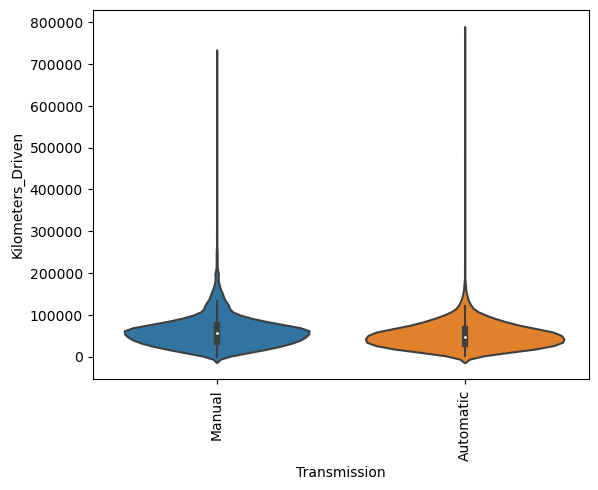

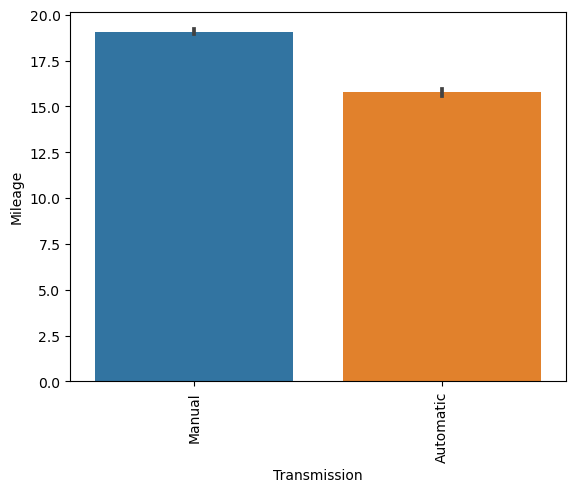

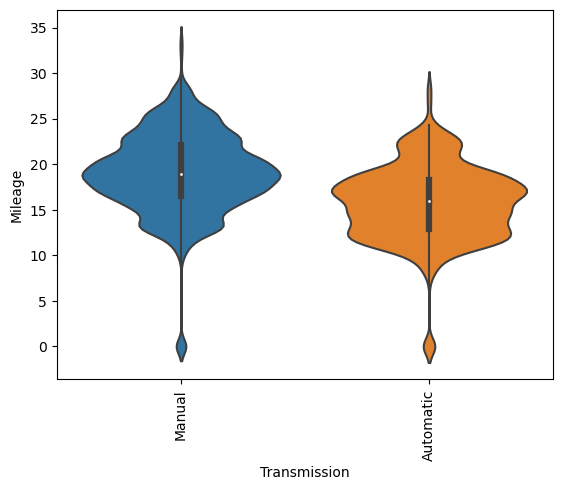

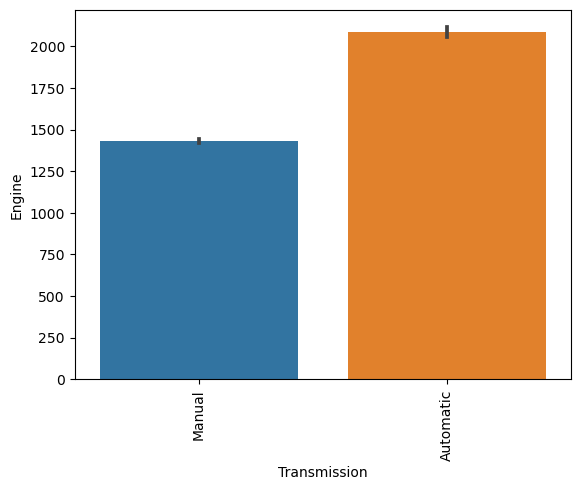

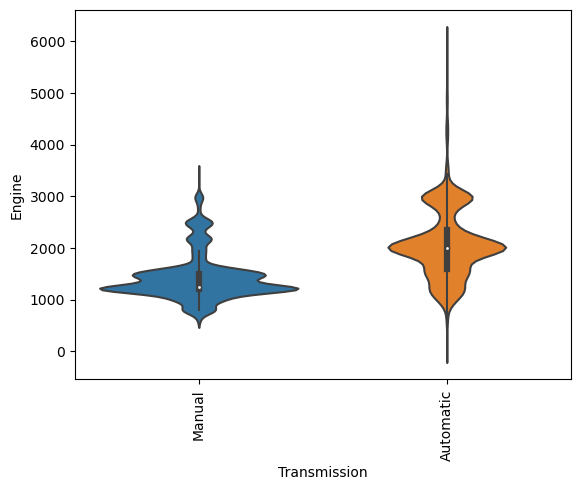

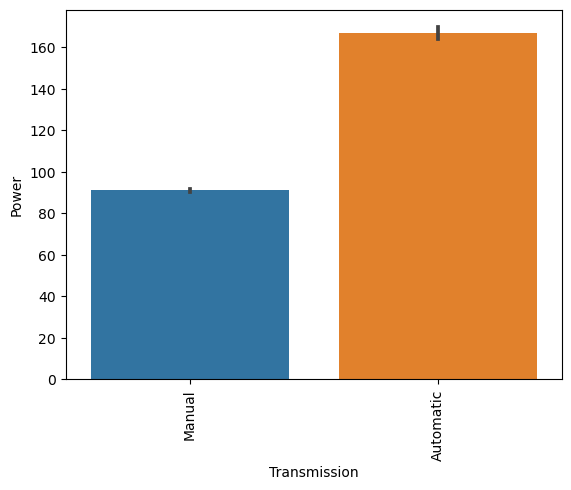

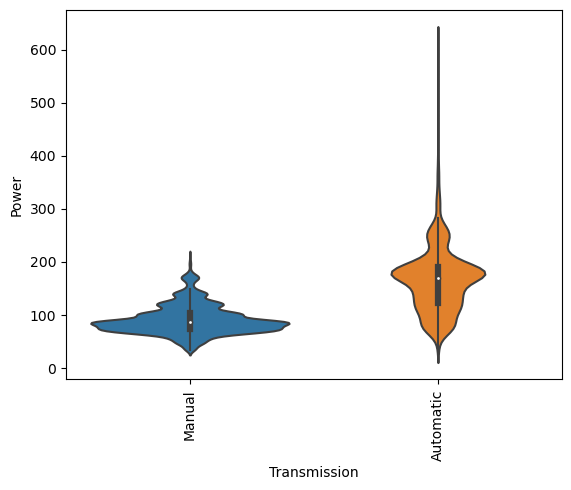

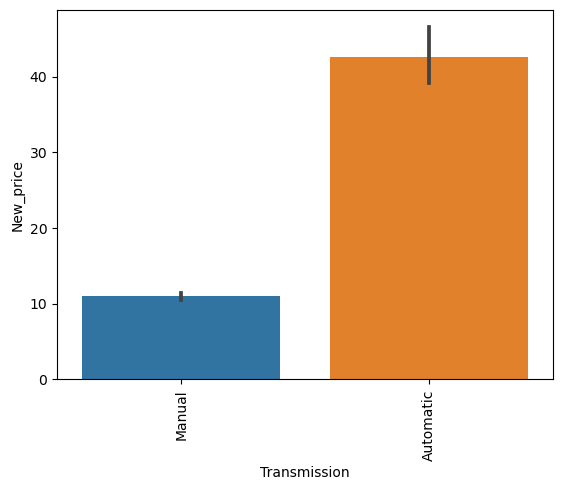

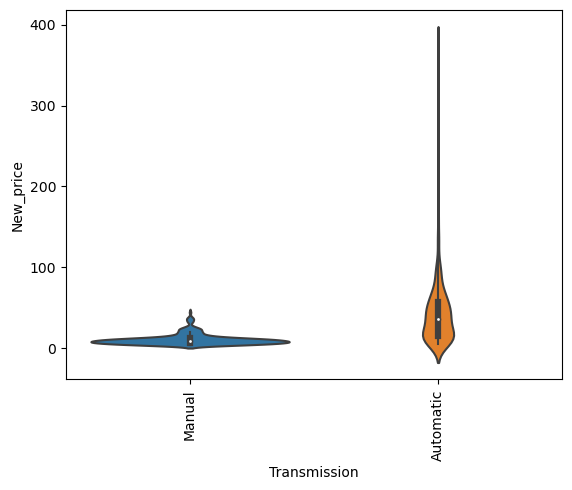

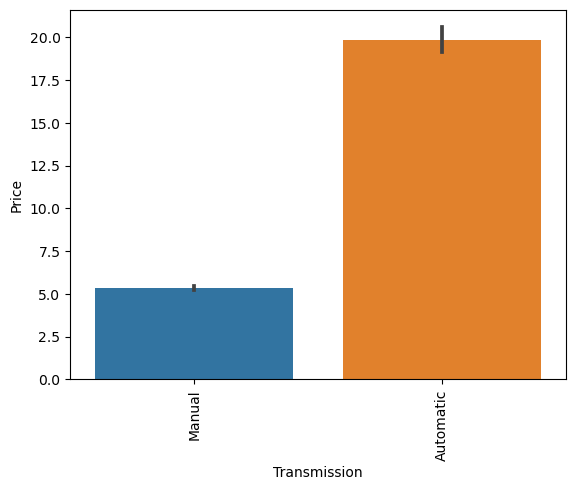

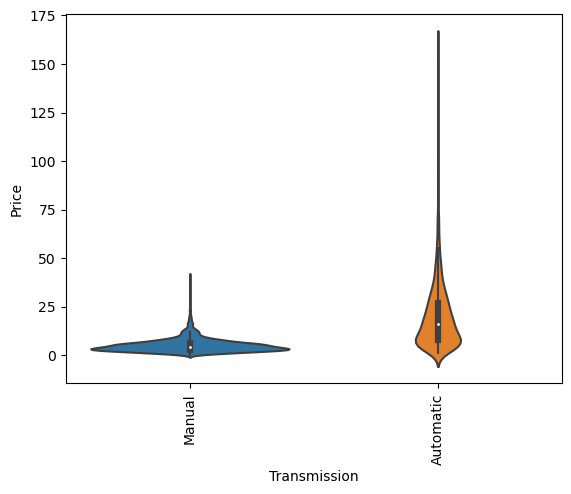

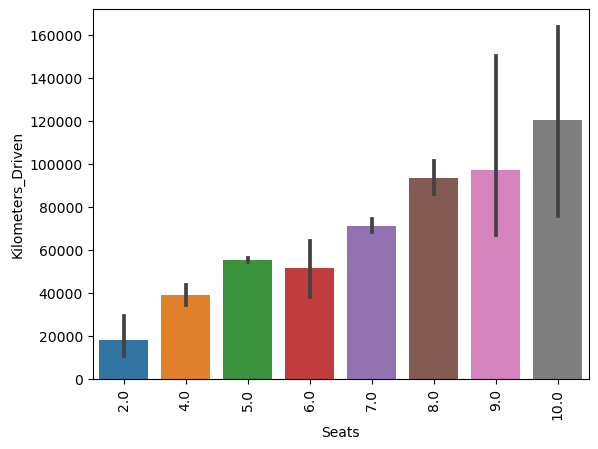

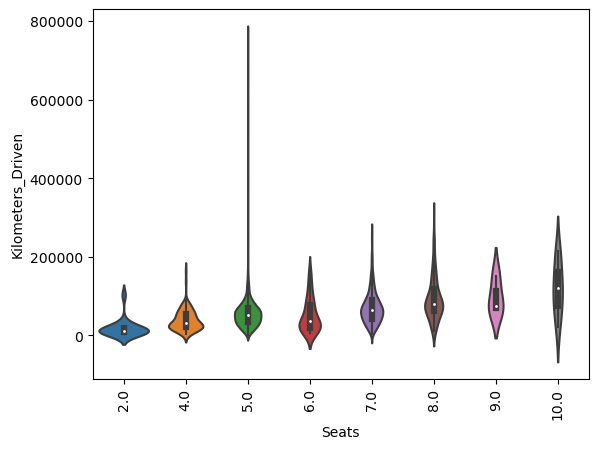

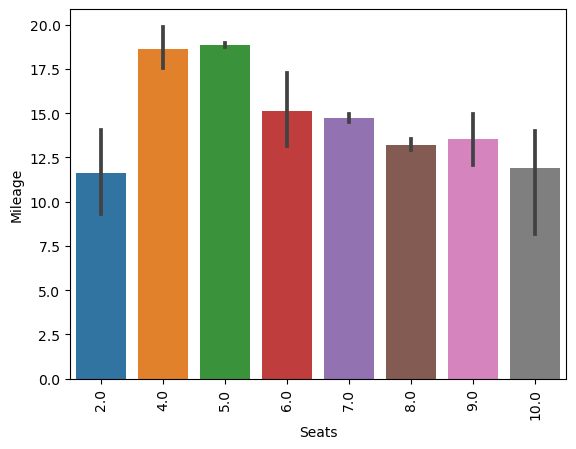

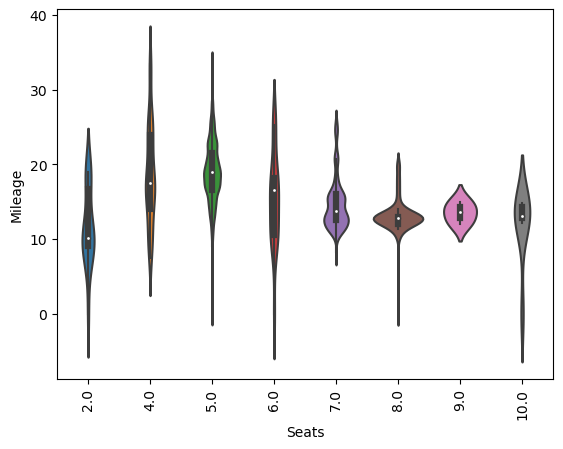

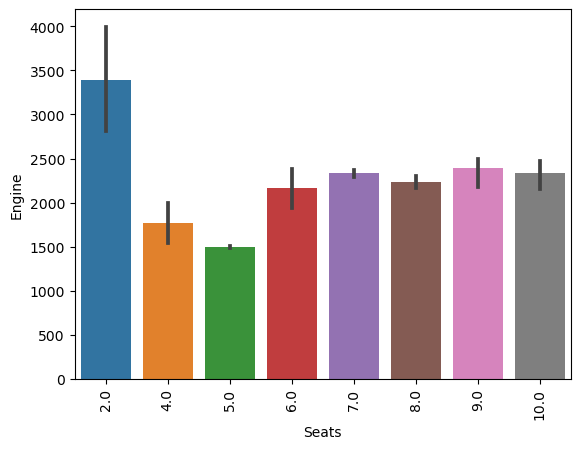

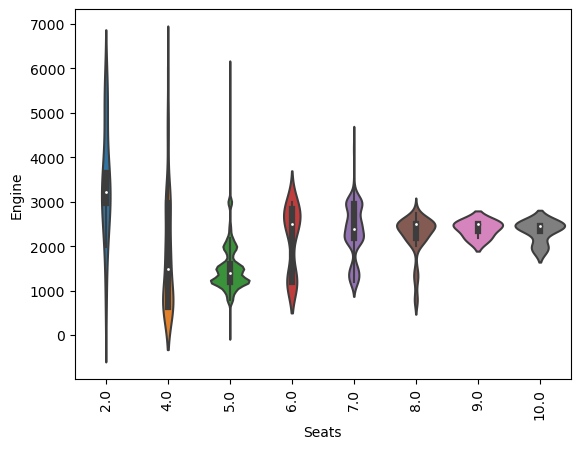

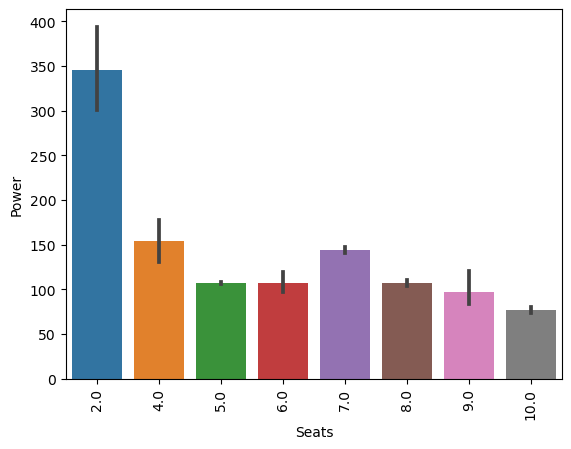

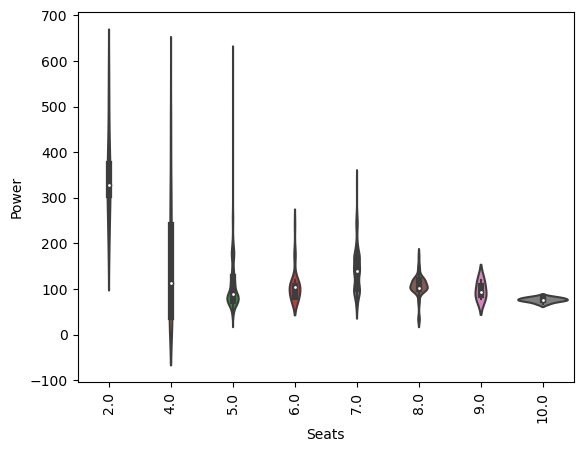

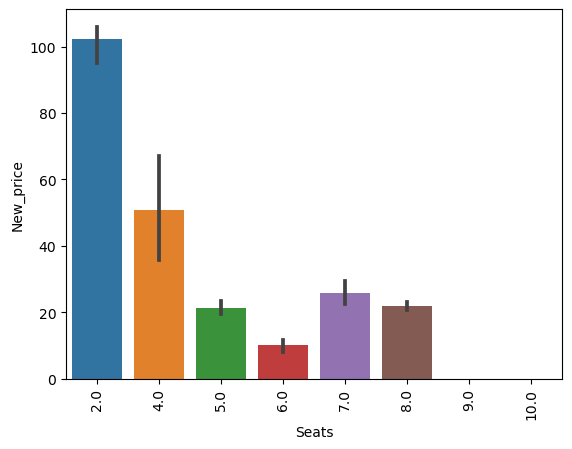

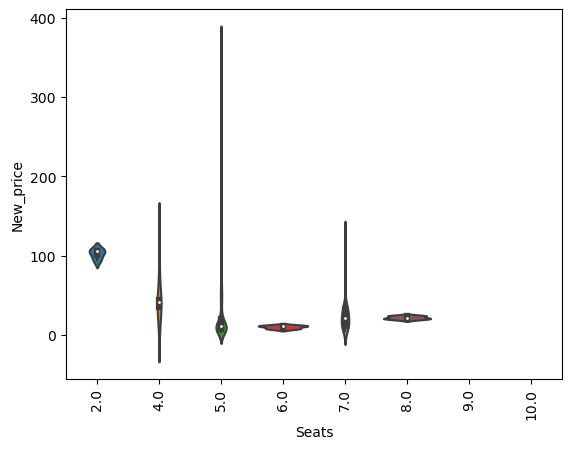

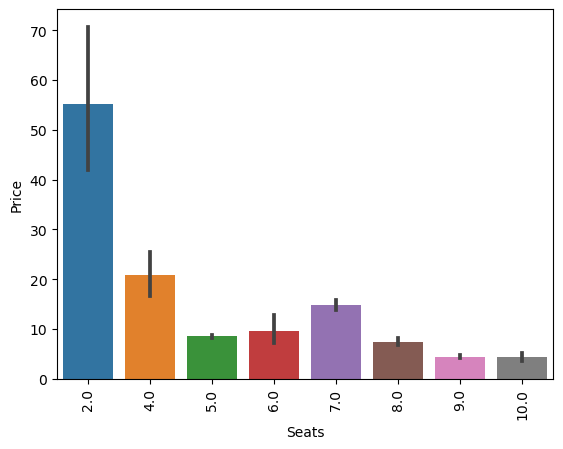

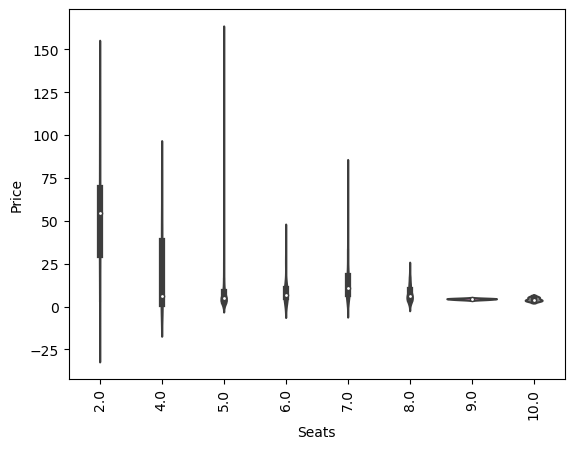

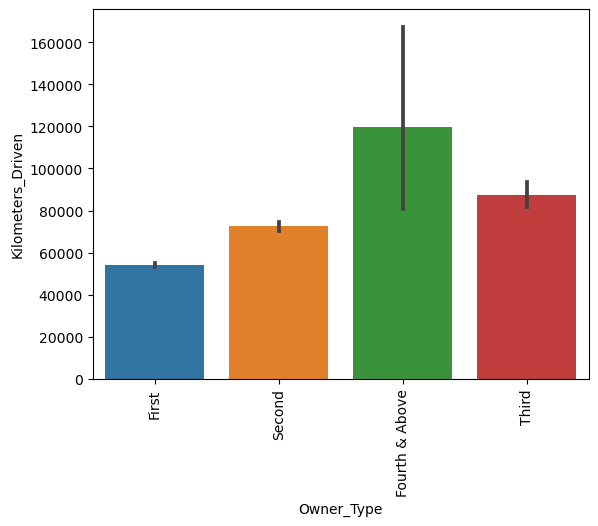

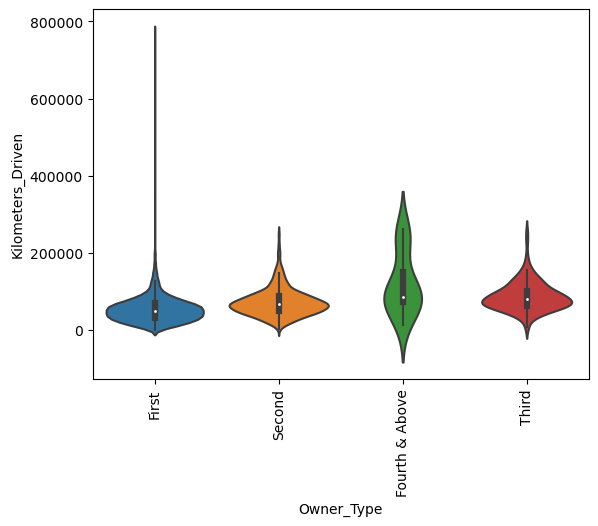

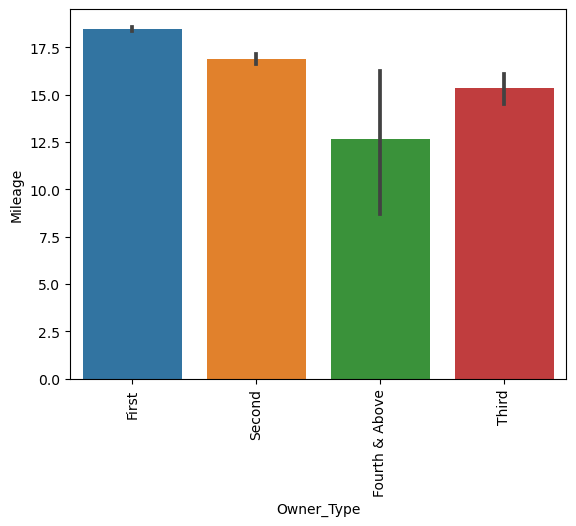

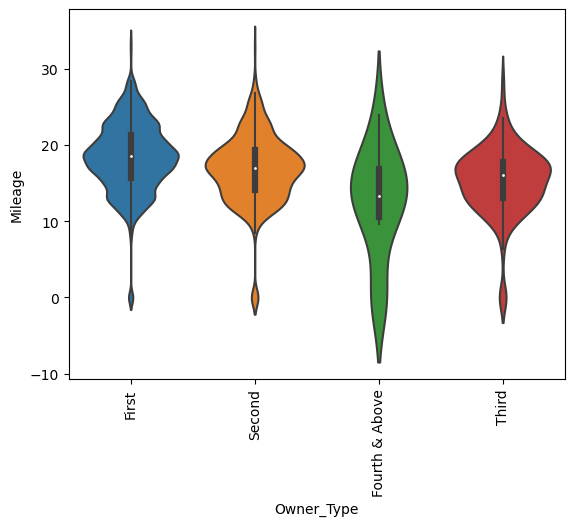

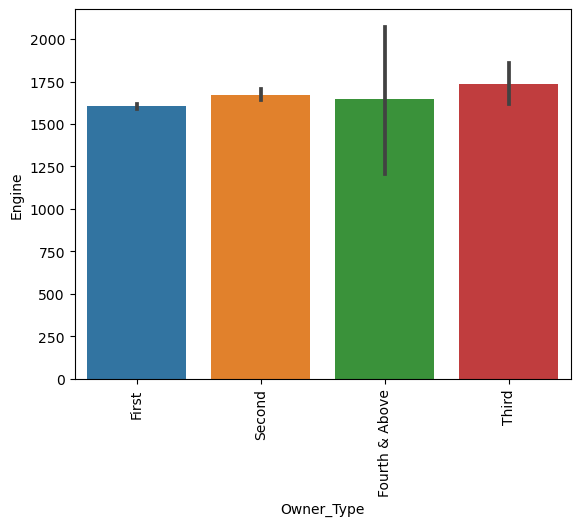

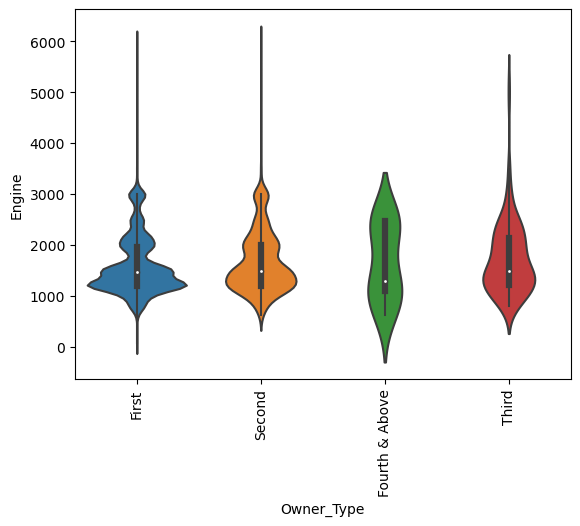

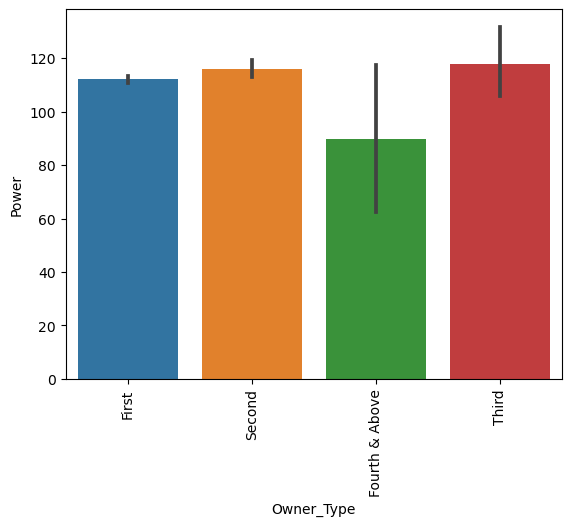

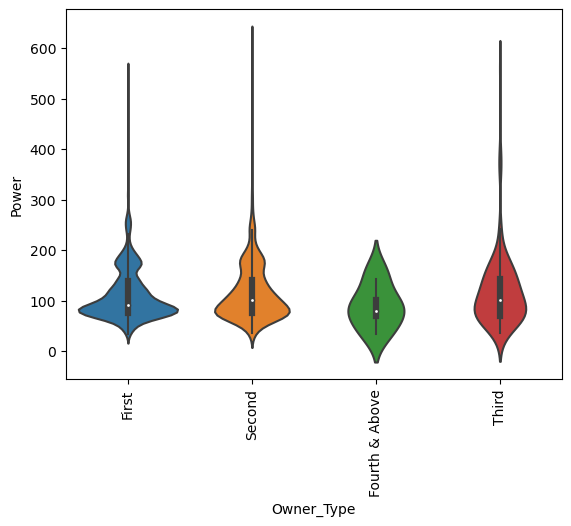

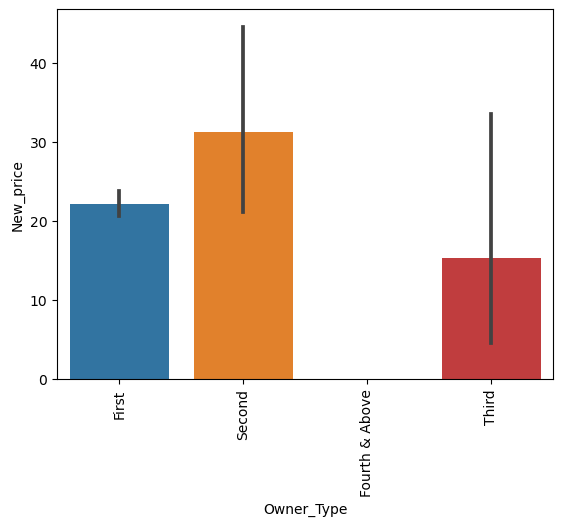

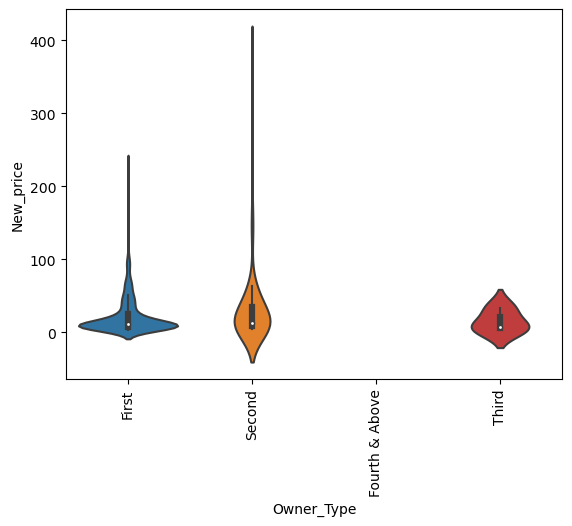

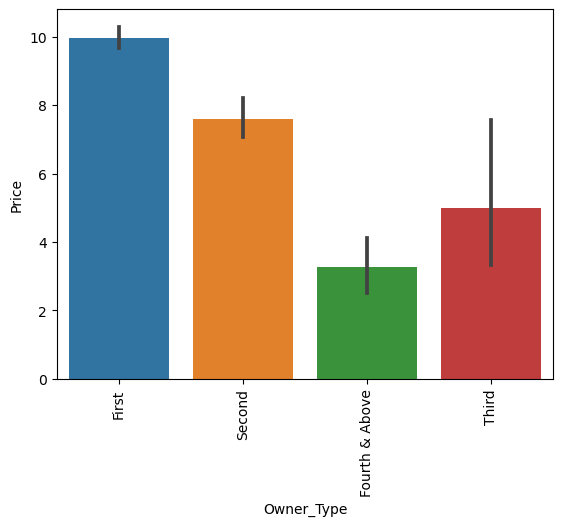

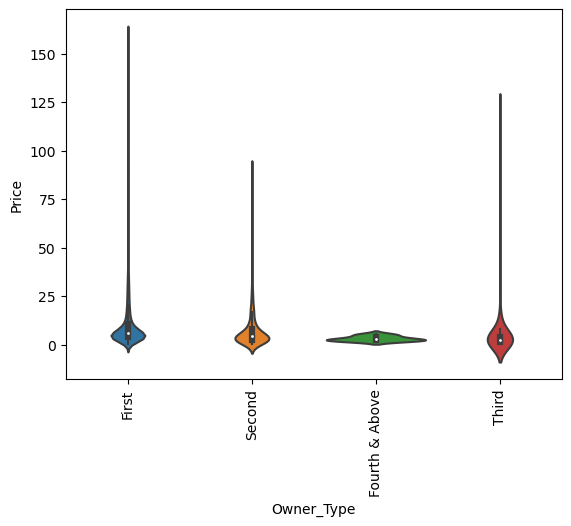

In [23]:
#DeepSpace way:
from deepspace.transformers.exploration.bivariate.NN.NxC import NxC
#Deepspace will show calculations and multiple charts by default
_ = (_ 
    >> NxC(figsize=(10,5)) 
)

[('Location', 'Year'), ('Location', 'Fuel_Type'), ('Location', 'Transmission'), ('Location', 'Seats'), ('Location', 'Owner_Type'), ('Year', 'Fuel_Type'), ('Year', 'Transmission'), ('Year', 'Seats'), ('Year', 'Owner_Type'), ('Fuel_Type', 'Transmission'), ('Fuel_Type', 'Seats'), ('Fuel_Type', 'Owner_Type'), ('Transmission', 'Seats'), ('Transmission', 'Owner_Type'), ('Seats', 'Owner_Type')]


________________________________________________________________________________________________________________________


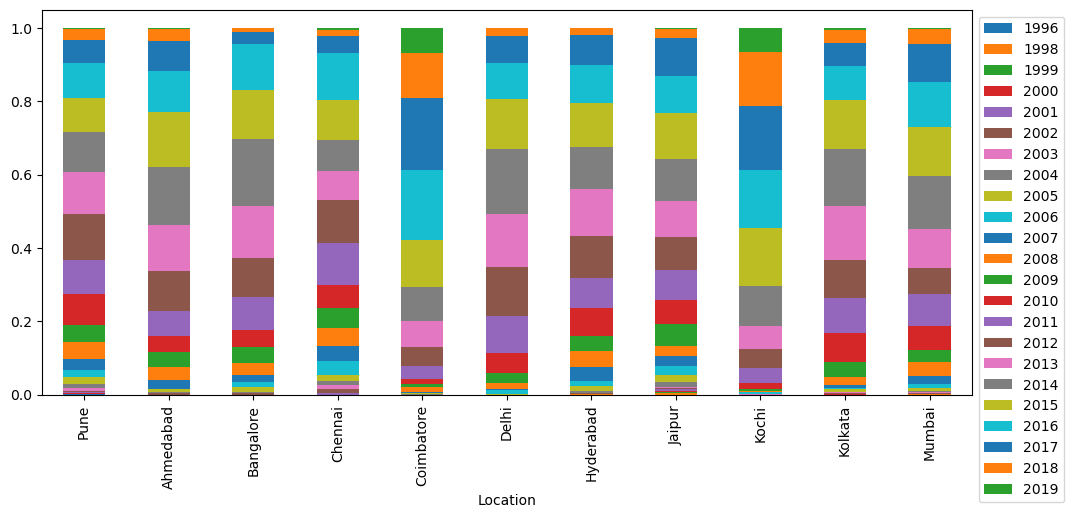

________________________________________________________________________________________________________________________


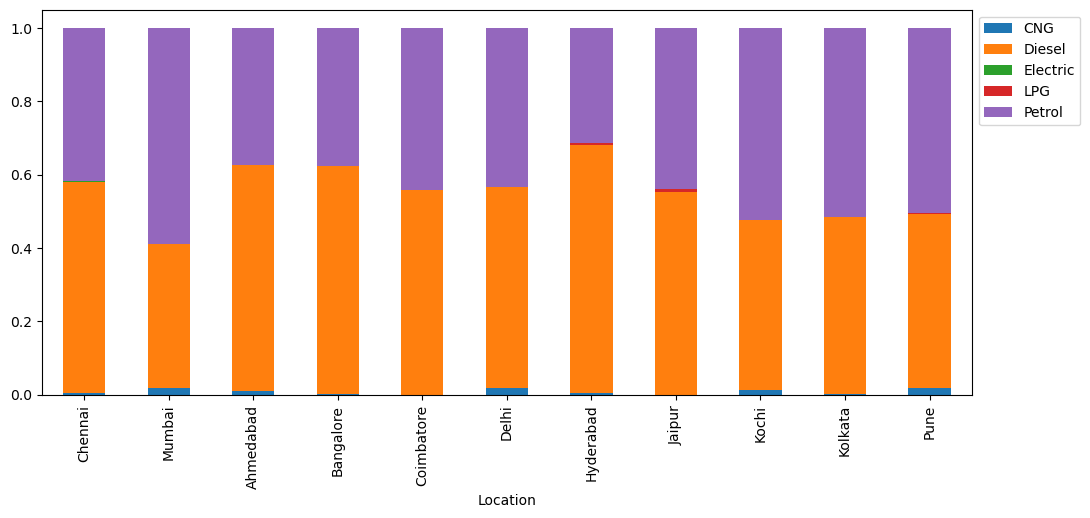

________________________________________________________________________________________________________________________


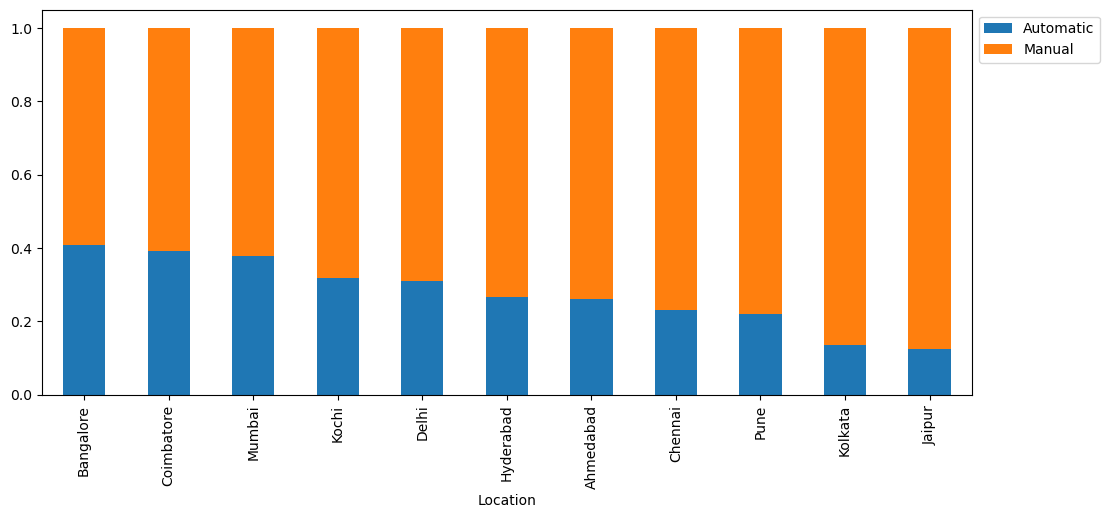

________________________________________________________________________________________________________________________


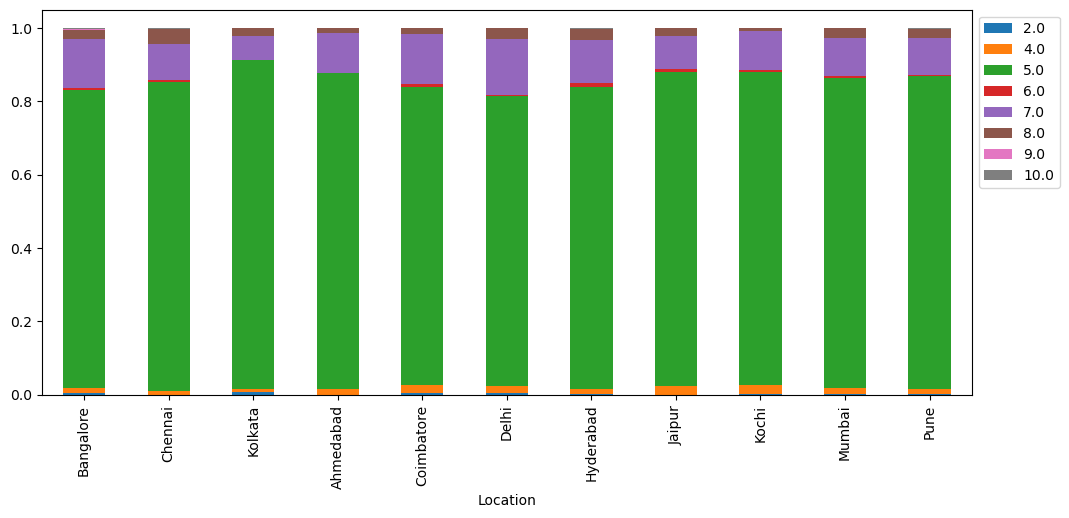

________________________________________________________________________________________________________________________


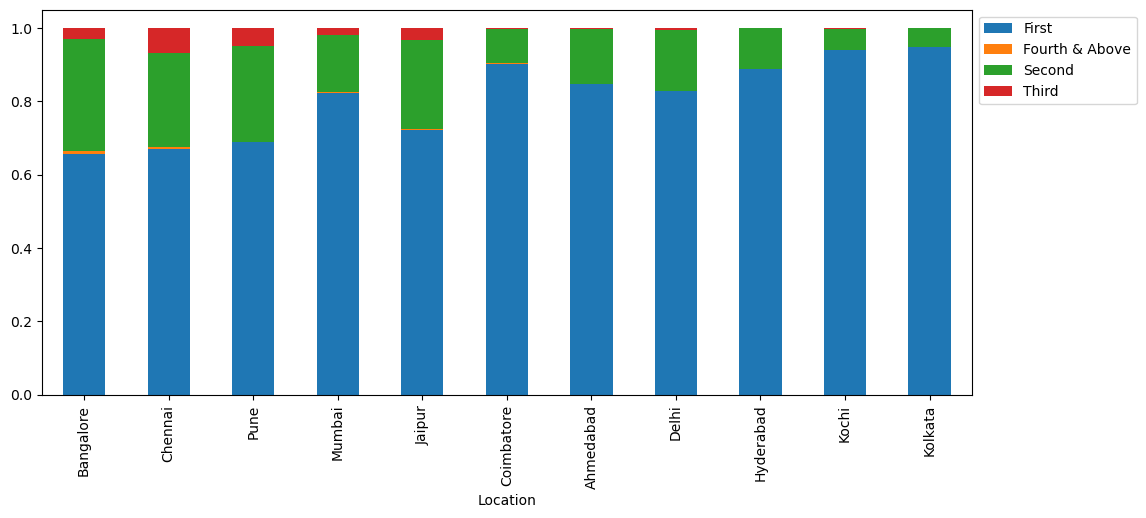

________________________________________________________________________________________________________________________


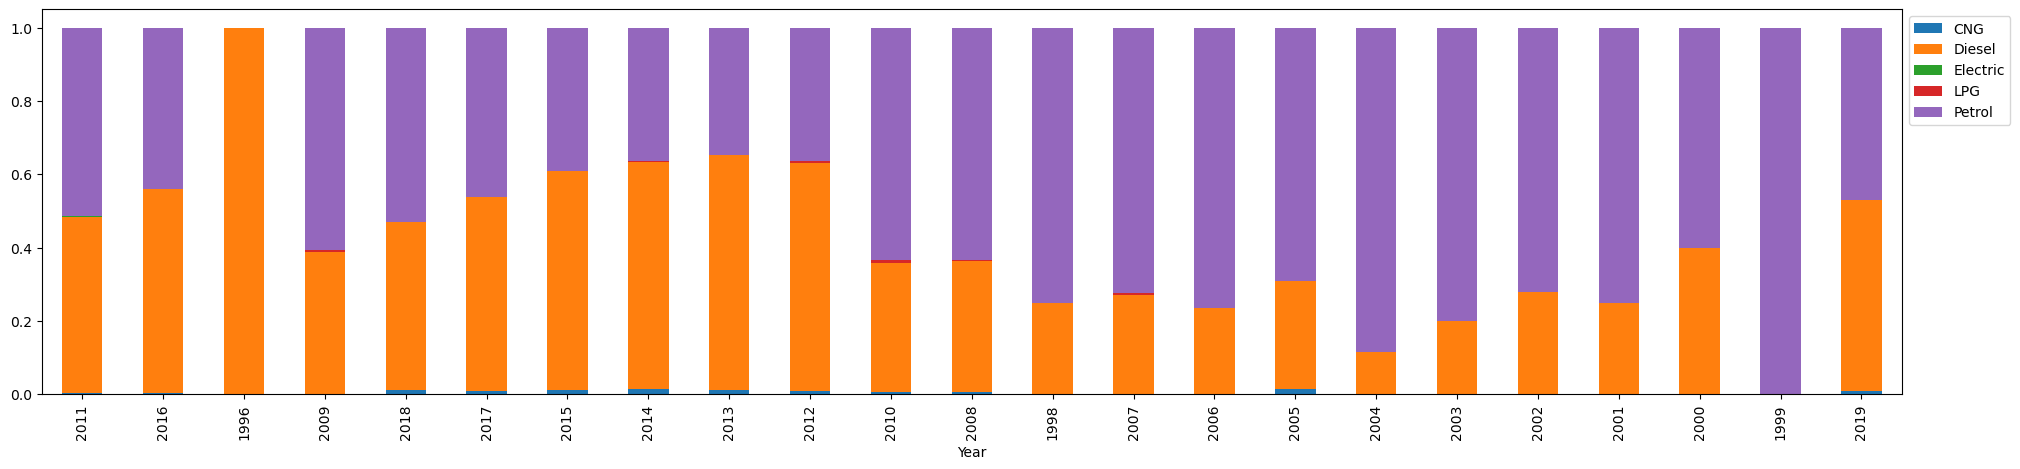

________________________________________________________________________________________________________________________


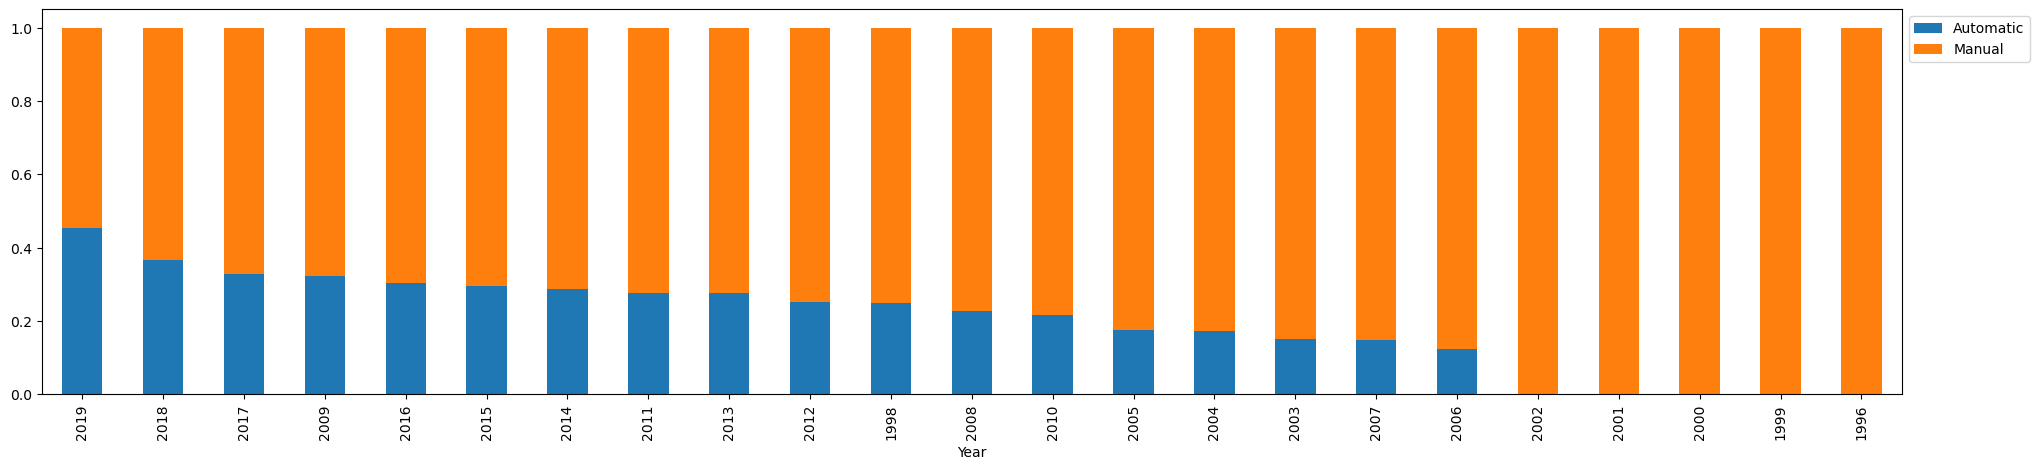

________________________________________________________________________________________________________________________


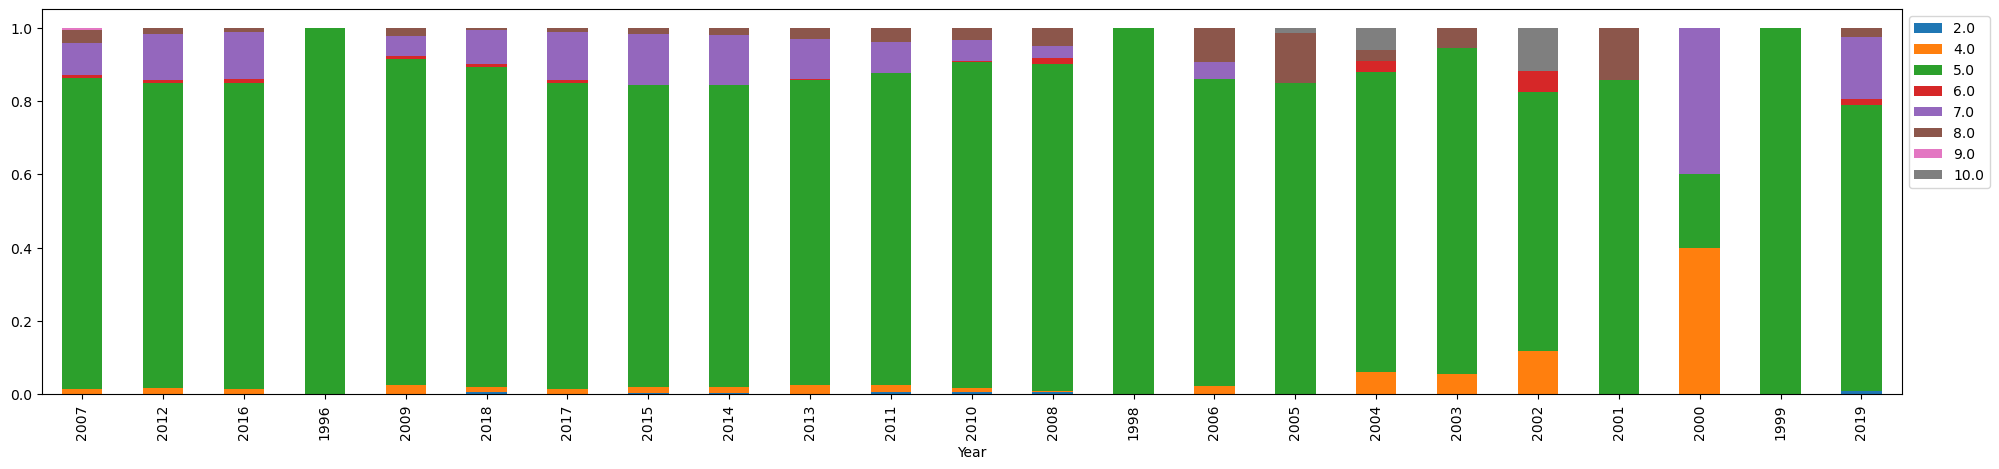

________________________________________________________________________________________________________________________


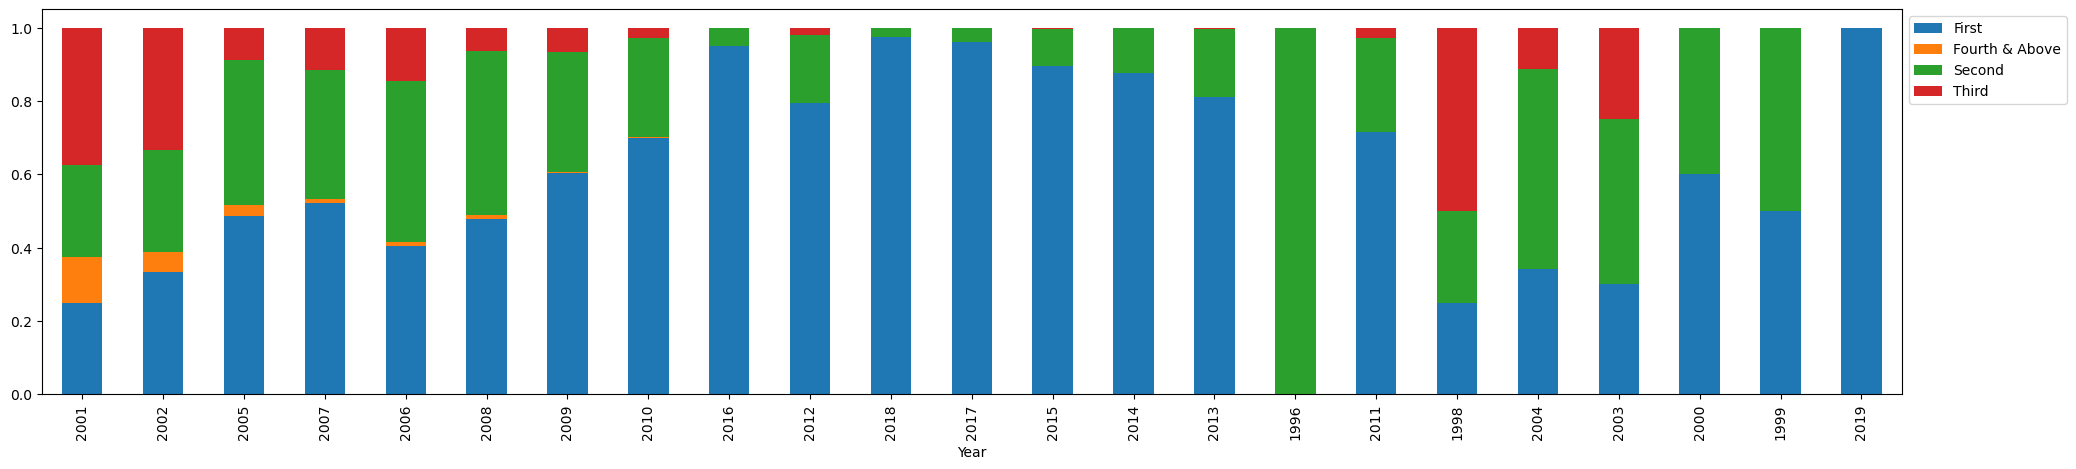

________________________________________________________________________________________________________________________


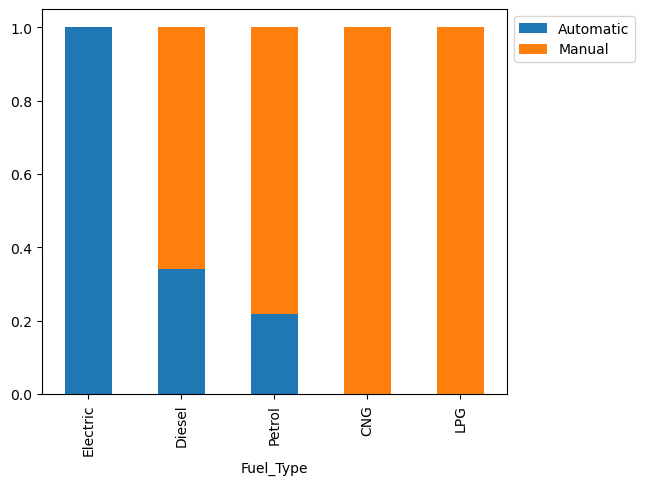

________________________________________________________________________________________________________________________


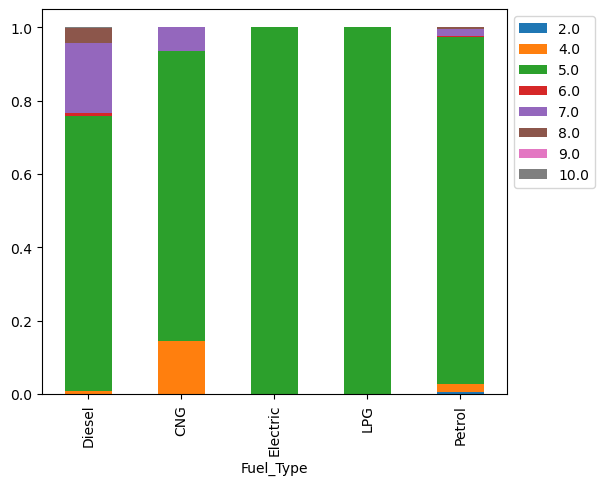

________________________________________________________________________________________________________________________


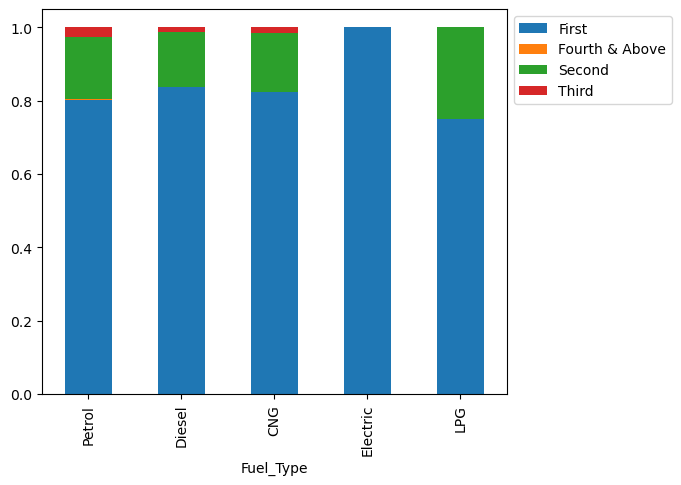

________________________________________________________________________________________________________________________


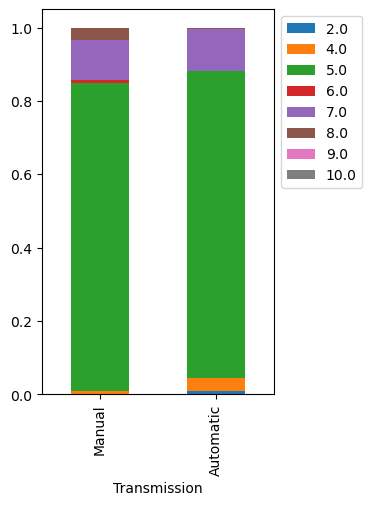

________________________________________________________________________________________________________________________


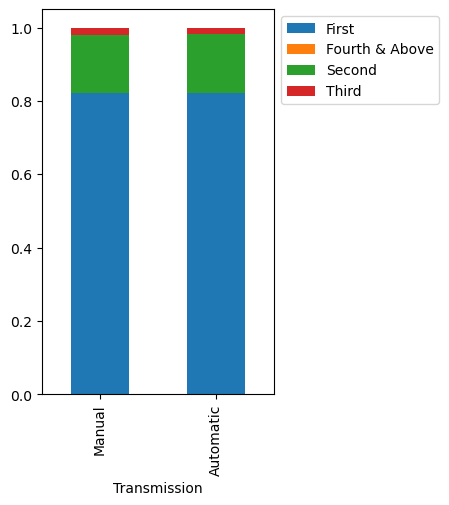

________________________________________________________________________________________________________________________


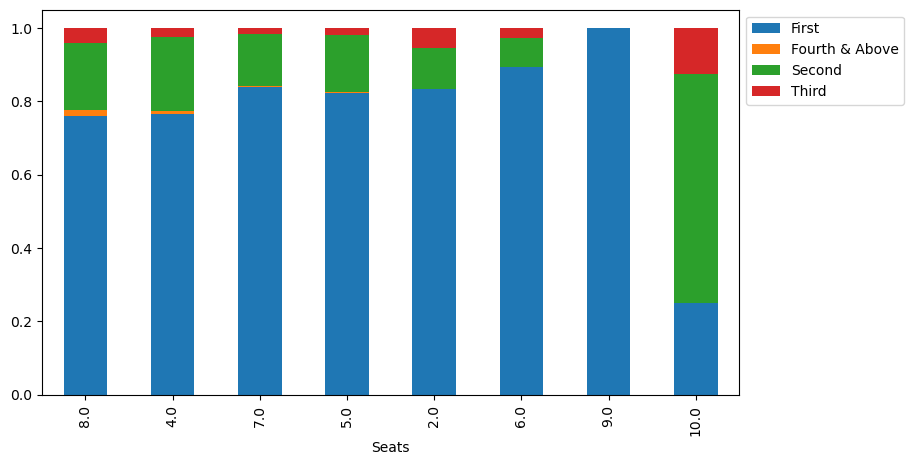

In [24]:
#DeepSpace way:
from deepspace.transformers.exploration.bivariate.NN.CxC import CxC
#Deepspace will show calculations and multiple charts by default
_ = (_ 
    >> CxC() 
)
#XXY

## **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column?

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

#### New Model feature

In [25]:
from deepspace.transformers.Transformer import Transformer
#Specific to current projet
class FeatureEngineerBrandFromName(Transformer):
    '''Target Feature Engineering'''
    def __init__(self):
        Transformer.__init__(self)
    def transform(self, ds):
        df = ds.data
        dfm = df['Name'].str.split(pat = ' ', expand = True)
        df['Brand'] = dfm[0].str.upper()
        #df['Model'] = dfm[1].str.upper()
        return ds

In [26]:
#DeepSpace way:
_ = (_ 
    >> FeatureEngineerBrandFromName()  #creates Brand from Name
)

In [27]:
#DeepSpace way:
from deepspace.transformers.overview.CheckUniqueness import CheckUniqueness
_ = (_ 
    >> CheckUniqueness(cols=['Brand'])  
)

**Observations**:
* the number of values (33) for the newly created feature is quite high. As we set a threshold of 20 as an acceptable volume in general
* tow options here:
  * either we drop it and strart a first model without it and see if the model has good performance without
  * or we can use it and drop it later if it's not useful

In [28]:
from deepspace.transformers.column.categorical.Adjust import Adjust as CatAdjuster 
#we add Brand to the list of useful features
_ = ( _ 
     >> CatAdjuster([     
                    #'Name',
                    'Brand',
                    'Location',
                    'Year',
                    'Fuel_Type',
                    'Transmission',
                    'Seats', 
                    'Owner_Type'])
)

Brand
MARUTI           1444
HYUNDAI          1340
HONDA             743
TOYOTA            507
MERCEDES-BENZ     380
VOLKSWAGEN        374
FORD              351
MAHINDRA          331
BMW               312
AUDI              285
TATA              228
SKODA             202
RENAULT           170
CHEVROLET         151
NISSAN            117
LAND               67
JAGUAR             48
FIAT               38
MITSUBISHI         36
MINI               31
VOLVO              28
PORSCHE            19
JEEP               19
DATSUN             17
ISUZU               5
FORCE               3
BENTLEY             2
SMART               1
AMBASSADOR          1
LAMBORGHINI         1
HINDUSTAN           1
OPELCORSA           1
Name: count, dtype: int64
Brand
MARUTI           0.199090
HYUNDAI          0.184751
HONDA            0.102440
TOYOTA           0.069902
MERCEDES-BENZ    0.052392
VOLKSWAGEN       0.051565
FORD             0.048394
MAHINDRA         0.045636
BMW              0.043017
AUDI             0.03929

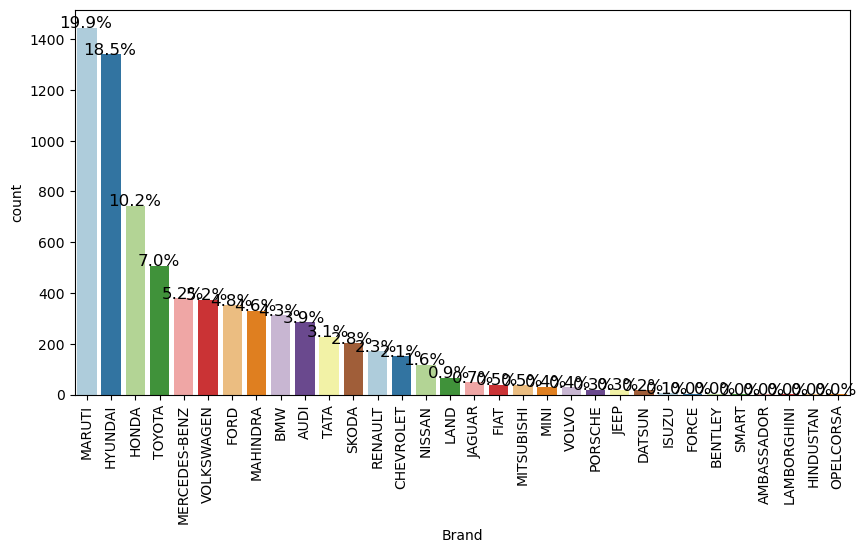

In [29]:
#DeepSpace way:
from deepspace.transformers.exploration.univariate.categorical.UnivariateAnalysis import UnivariateAnalysis
#Deepspace will show calculations and multiple charts by default
_ = (_ 
    >> UnivariateAnalysis(cat_cols=['Brand'], normalize=None, figsize=(10,5)) 
)


**Observations:**
* Nearly 50% cars are either Maruti, or Hyundai, or Honda



Seats
5.0     6048
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
Name: count, dtype: int64
Seats
5.0     0.840000
7.0     0.110556
8.0     0.023611
4.0     0.016528
6.0     0.005278
2.0     0.002500
10.0    0.001111
9.0     0.000417
Name: proportion, dtype: float64
--------------------------------------------------
-------------------------------------------------- Seats


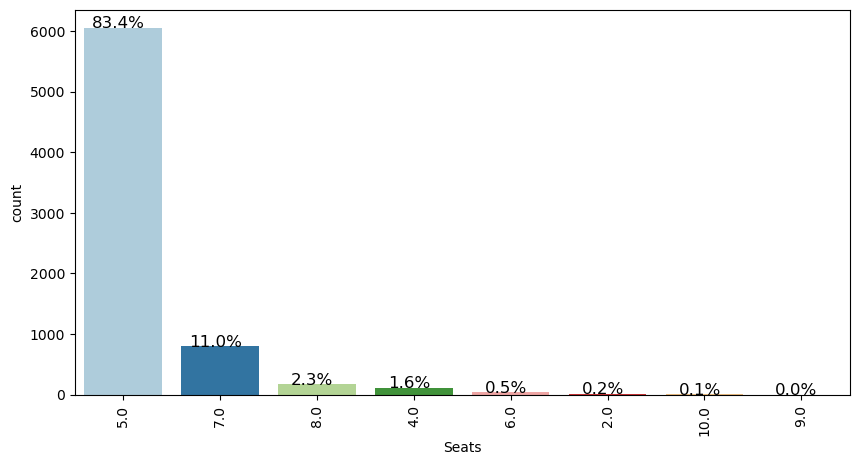

In [30]:
#DeepSpace way:
from deepspace.transformers.exploration.univariate.categorical.UnivariateAnalysis import UnivariateAnalysis
#Deepspace will show calculations and multiple charts by default
_ = (_ 
    >> UnivariateAnalysis(cat_cols=['Seats'], normalize=None, figsize=(10,5)) 
)


**Observations:**
* Nearly 84% cars are 5 seats


Brand
MARUTI           1444
HYUNDAI          1340
HONDA             743
TOYOTA            507
MERCEDES-BENZ     380
VOLKSWAGEN        374
FORD              351
MAHINDRA          331
BMW               312
AUDI              285
TATA              228
SKODA             202
RENAULT           170
CHEVROLET         151
NISSAN            117
LAND               67
JAGUAR             48
FIAT               38
MITSUBISHI         36
MINI               31
VOLVO              28
PORSCHE            19
JEEP               19
DATSUN             17
ISUZU               5
FORCE               3
BENTLEY             2
SMART               1
AMBASSADOR          1
LAMBORGHINI         1
HINDUSTAN           1
OPELCORSA           1
Name: count, dtype: int64
Brand
MARUTI           0.199090
HYUNDAI          0.184751
HONDA            0.102440
TOYOTA           0.069902
MERCEDES-BENZ    0.052392
VOLKSWAGEN       0.051565
FORD             0.048394
MAHINDRA         0.045636
BMW              0.043017
AUDI             0.03929

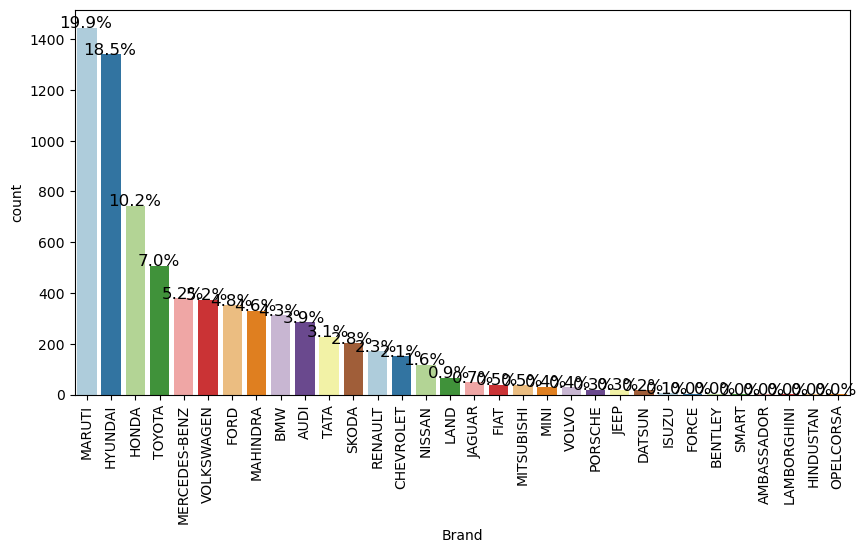

-------------------------------------------------- Location


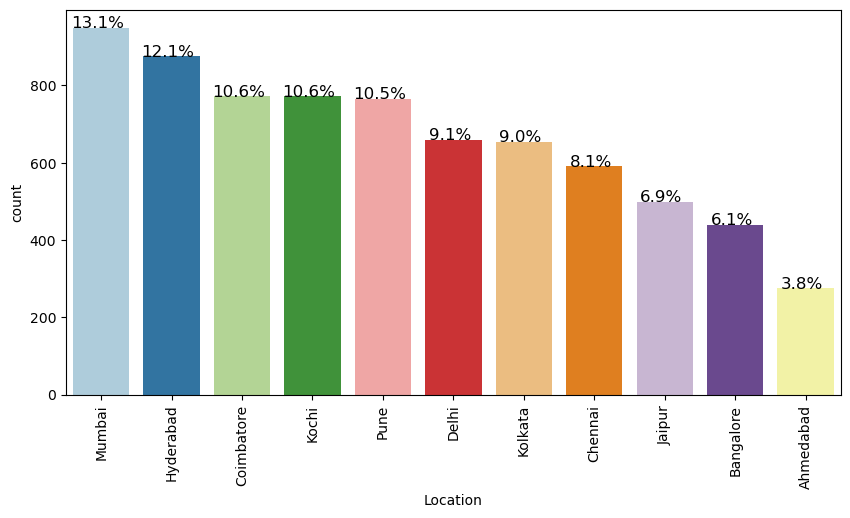

-------------------------------------------------- Year


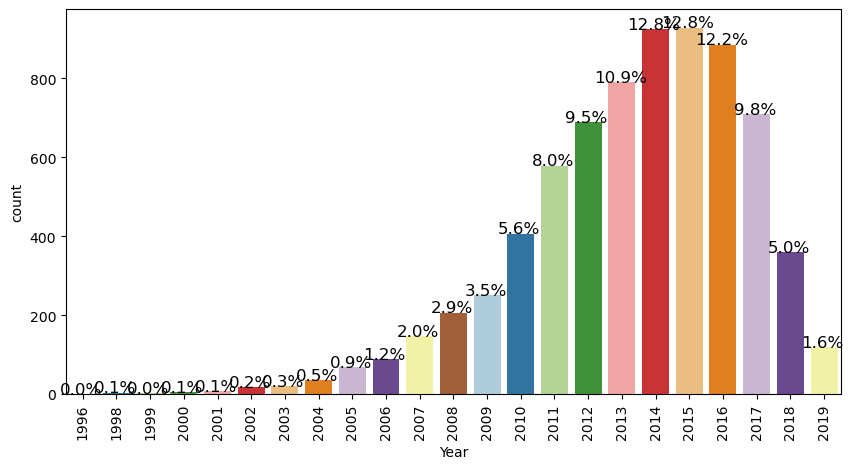

-------------------------------------------------- Fuel_Type


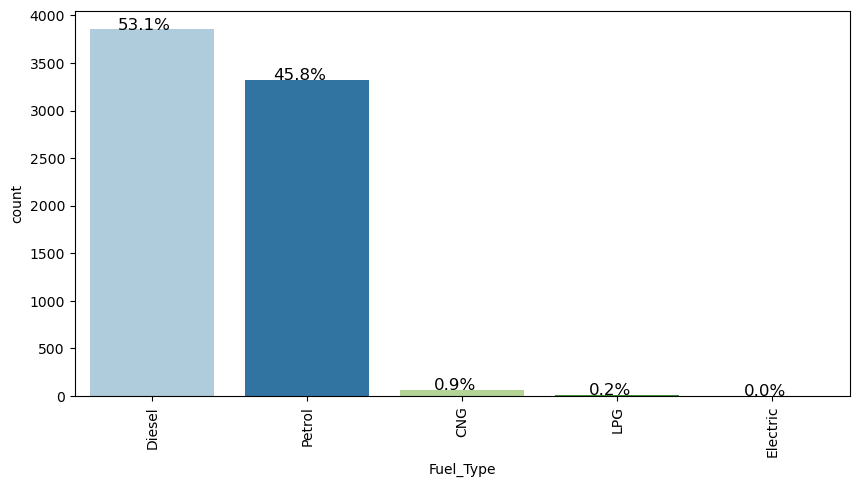

-------------------------------------------------- Transmission


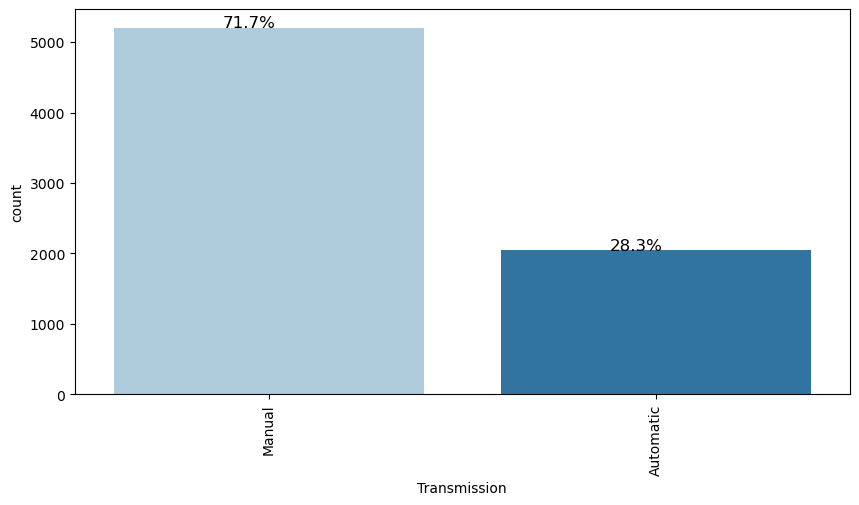

-------------------------------------------------- Seats


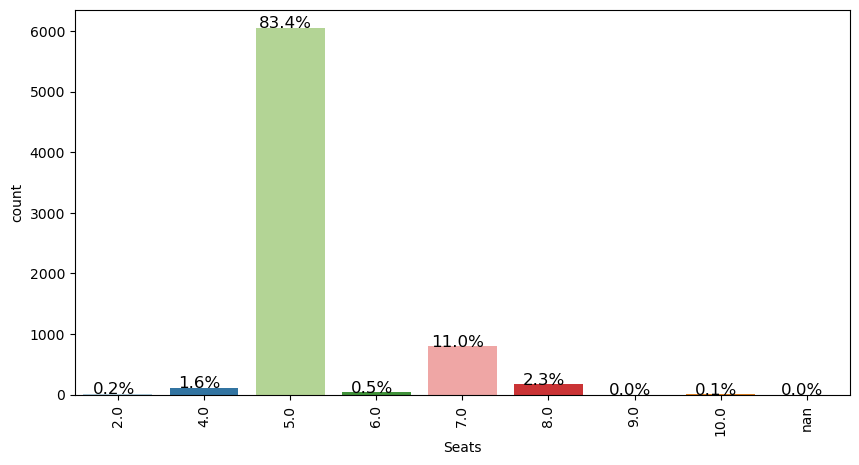

-------------------------------------------------- Owner_Type


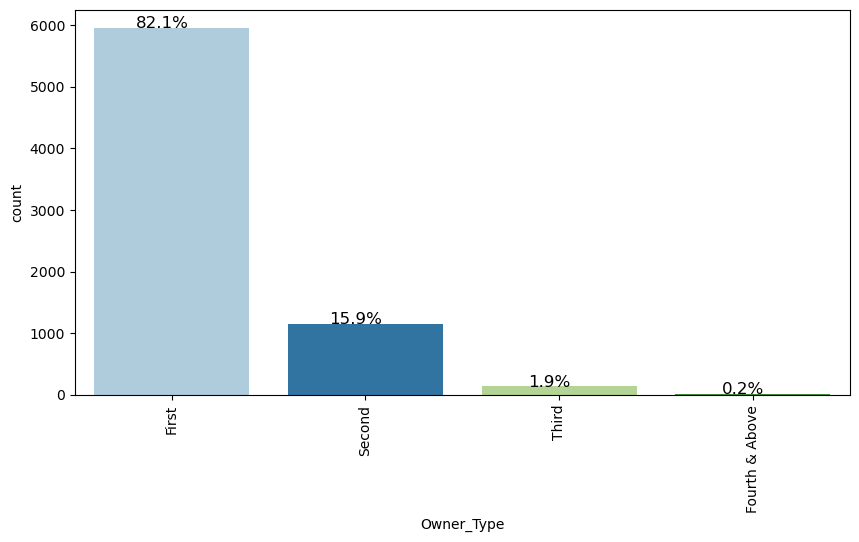

In [31]:
#DeepSpace way:
from deepspace.transformers.exploration.univariate.categorical.UnivariateAnalysis import UnivariateAnalysis
#Deepspace will show calculations and multiple charts by default
_ = (_ 
    >> UnivariateAnalysis(cat_cols=[], ord_cols=['Seats', 'Year'], normalize=None, figsize=(10,5)) 
)


**Observations:**
* Nearly 84% cars are 5 seats
* Maruti and Hyundi are by far the most frequent brands in the data, representing quite 20% of the volume

#### New Age feature

In [32]:
#creates Age from Year
import datetime as dt
import pandas as pd
class FeatureEngineerAgeFromYear(Transformer):
    '''Target Feature Engineering'''
    def __init__(self):
        Transformer.__init__(self)
    def transform(self, ds):
        df = ds.data
        maxY = str(df['Year'].max())
        #print(maxY)
        dfDDMMYYYY = '01'+'-01-'+df['Year'].astype(str)
        df['Age']  = dt.datetime.strptime(maxY, "%Y")-pd.to_datetime(dfDDMMYYYY, dayfirst=True)
        df['Age'] = df['Age'].dt.days
        return 

In [33]:
_ = ( _ >> FeatureEngineerAgeFromYear()) #execution of the monad chain

In [34]:
#DeepSpace way:
from deepspace.transformers.overview.CheckUniqueness import CheckUniqueness
_ = (_ 
    >> CheckUniqueness(cols=['Age'])  
)

Age
1461    0.128085
1826    0.127533
1096    0.122156
2191    0.109058
730     0.097753
2557    0.095133
2922    0.079829
3287    0.056115
365     0.049773
3652    0.034744
4018    0.028540
4383    0.020405
0       0.016407
4748    0.012271
5113    0.009375
5479    0.004826
5844    0.002757
6209    0.002482
6574    0.001103
6940    0.000689
7670    0.000551
7305    0.000276
8401    0.000138
Name: proportion, dtype: float64
--------------------------------------------------


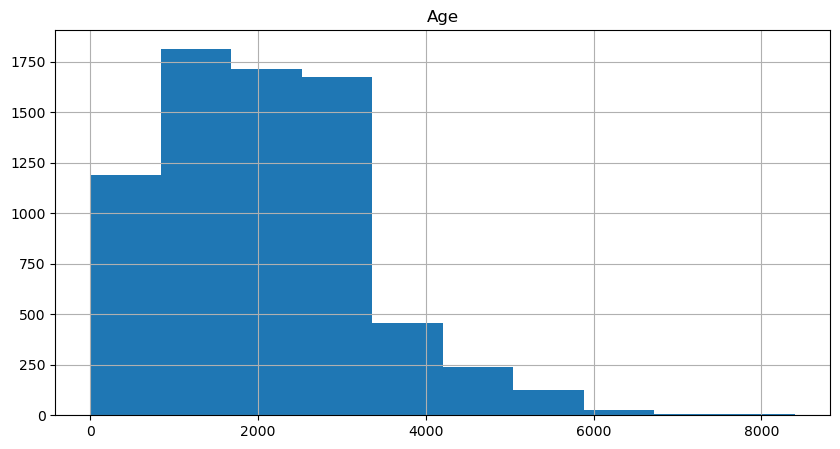

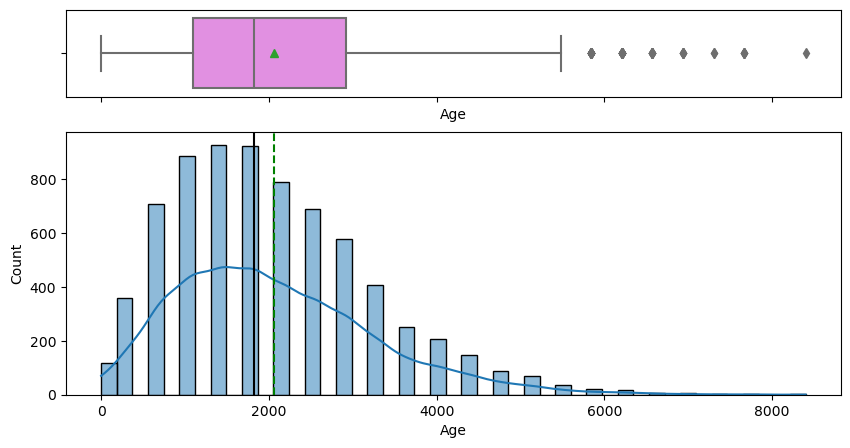

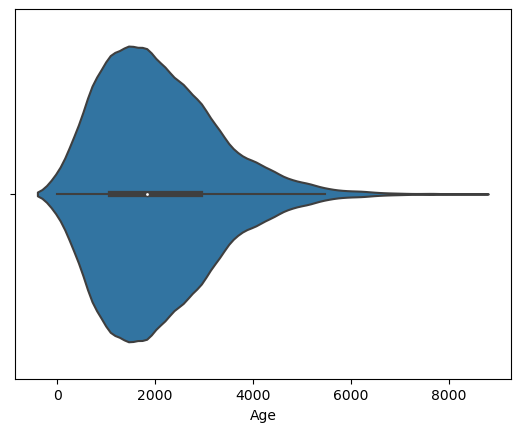

In [35]:
#DeepSpace way:
from deepspace.transformers.exploration.univariate.numerical.UnivariateAnalysis import UnivariateAnalysis
#Deepspace will show calculations and multiple charts by default
_ = (_ 
    >> UnivariateAnalysis(num_cols=['Age'], figsize=(10,5)) 
)


In [36]:
#here we adjust the columns that are useful for our analysis
from deepspace.transformers.column.numerical.Adjust import Adjust as NumAdjuster 

_ = ( _ 
    >> NumAdjuster([
            'Kilometers_Driven',
            'Kilometers_Driven_Log',
            'Mileage',
            'Engine',
            'Power',
            'New_price',
            'Price',
            'Price_Log',
        ])
)


Kilometers_Driven
60000    0.013236
45000    0.011857
65000    0.011857
70000    0.010616
50000    0.009927
           ...   
14001    0.000138
64158    0.000138
20969    0.000138
2900     0.000138
72443    0.000138
Name: proportion, Length: 3659, dtype: float64
--------------------------------------------------
Kilometers_Driven_Log
11.002117    0.013236
10.714440    0.011857
11.082158    0.011857
11.156265    0.010616
10.819798    0.009927
               ...   
9.546955     0.000138
11.069120    0.000138
9.950848     0.000138
7.972811     0.000138
11.190569    0.000138
Name: proportion, Length: 3659, dtype: float64
--------------------------------------------------
Mileage
17.00    0.028686
18.90    0.027720
18.60    0.019859
21.10    0.014757
20.36    0.014481
           ...   
17.09    0.000138
19.91    0.000138
17.16    0.000138
18.23    0.000138
17.15    0.000138
Name: proportion, Length: 438, dtype: float64
--------------------------------------------------
Engine
1197.0    0.10

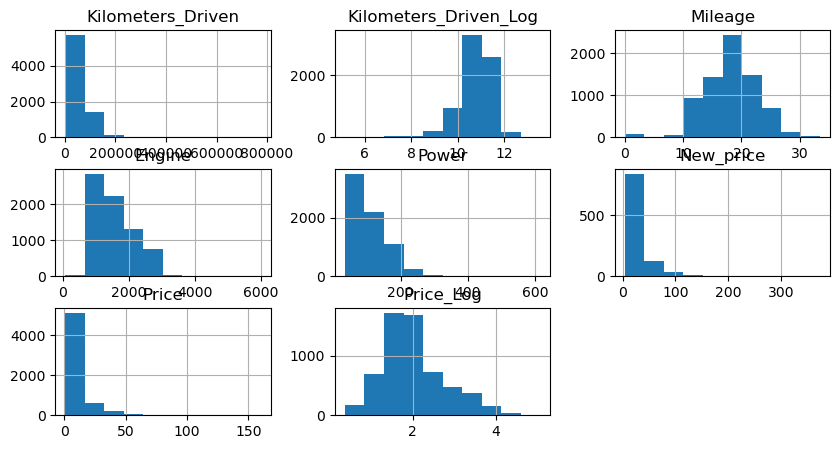

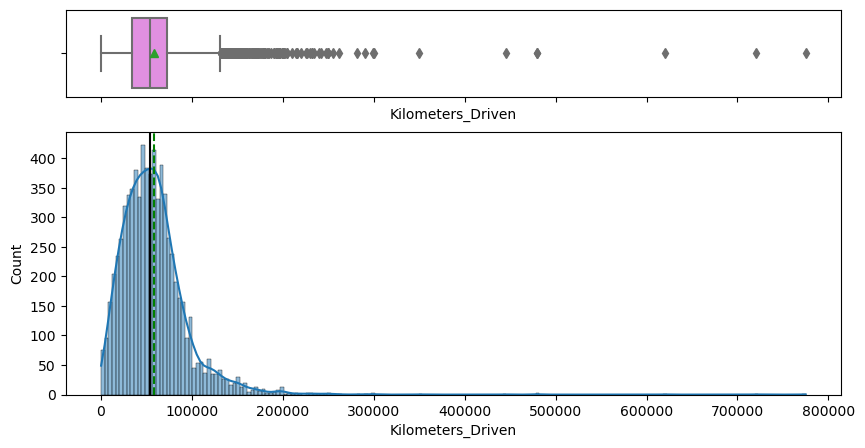

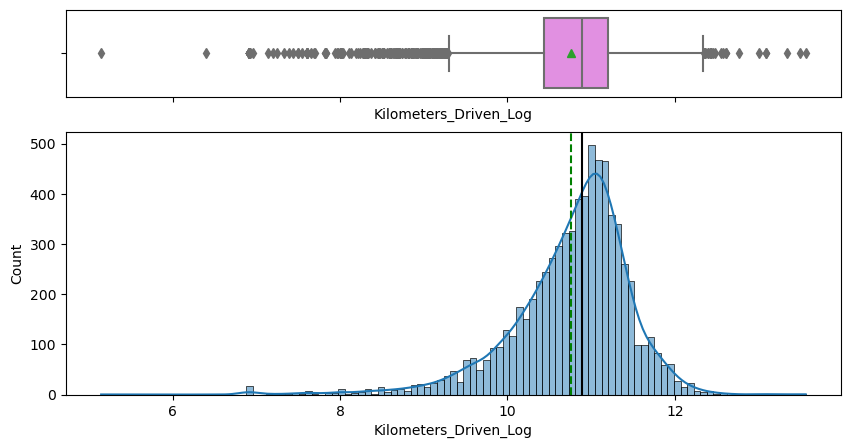

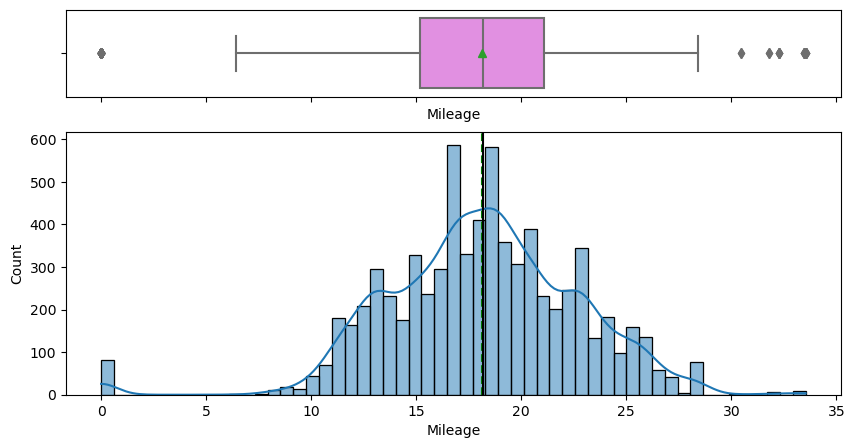

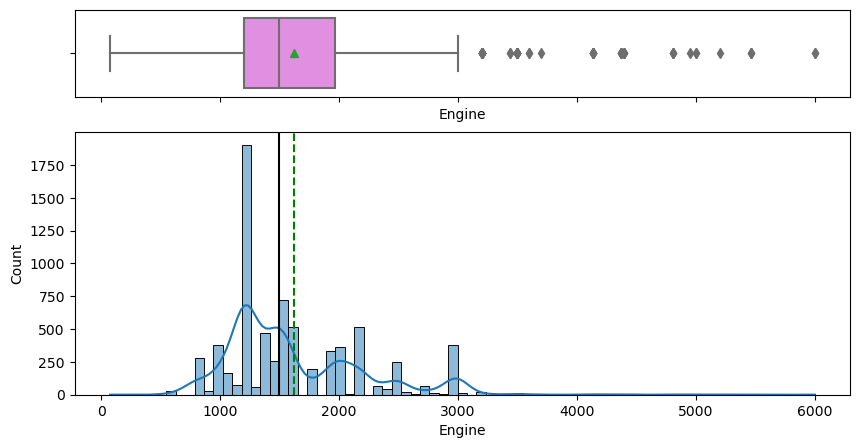

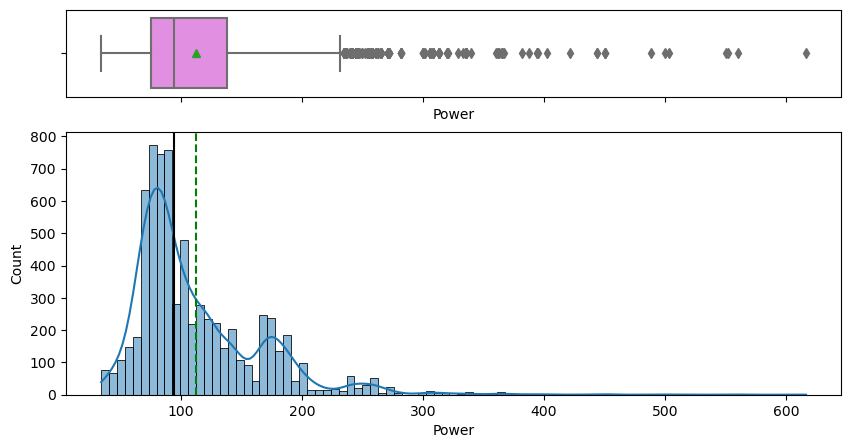

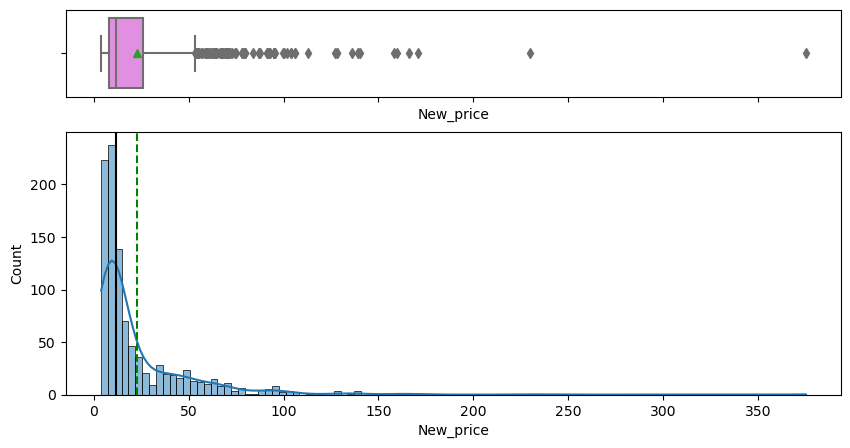

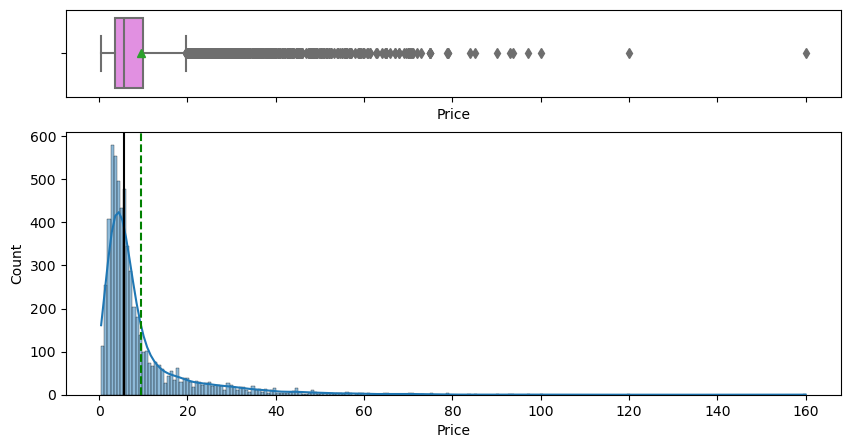

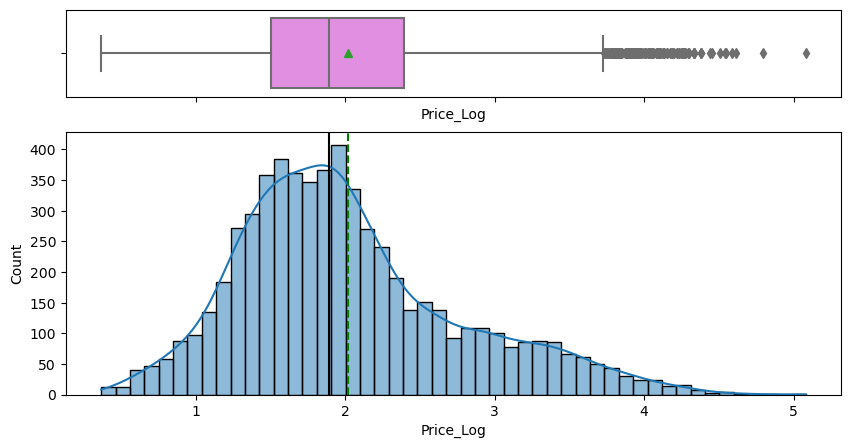

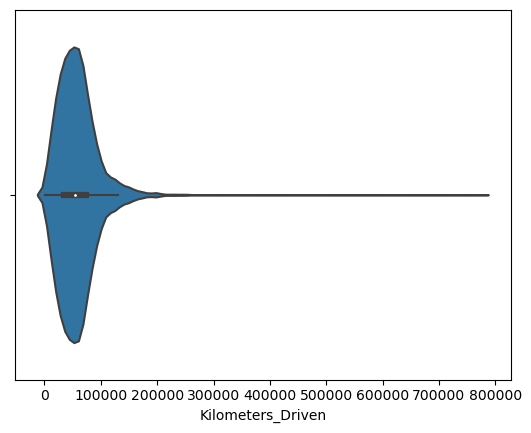

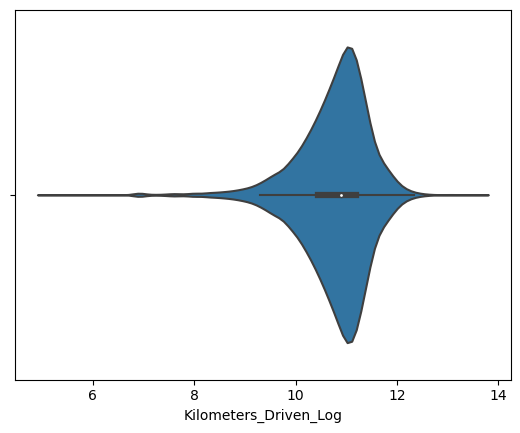

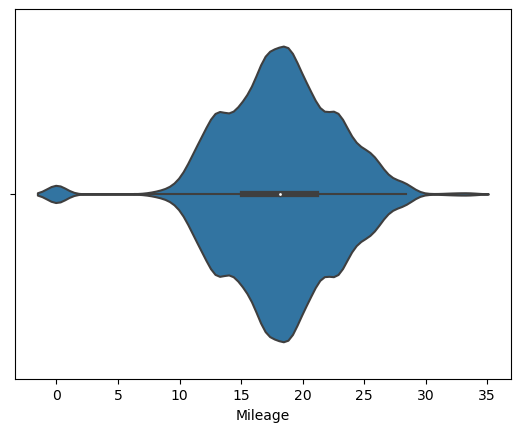

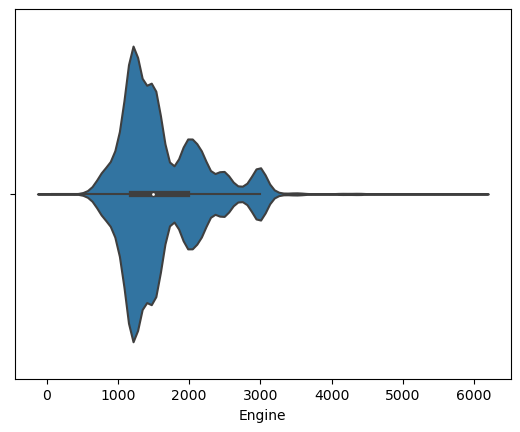

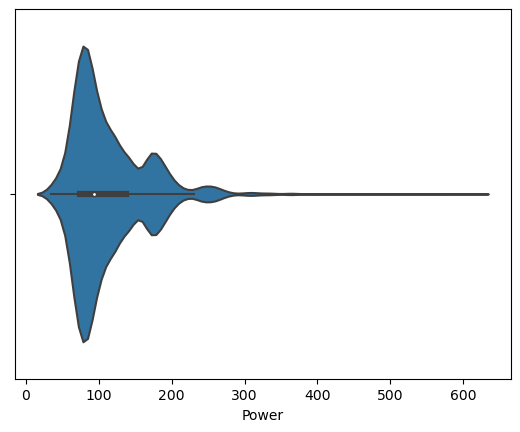

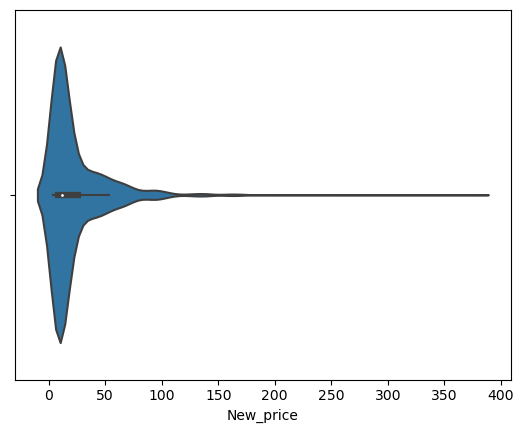

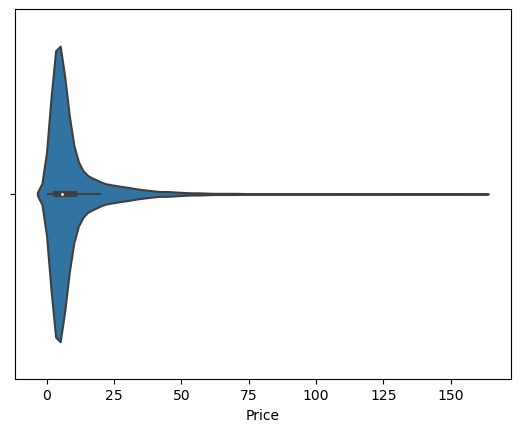

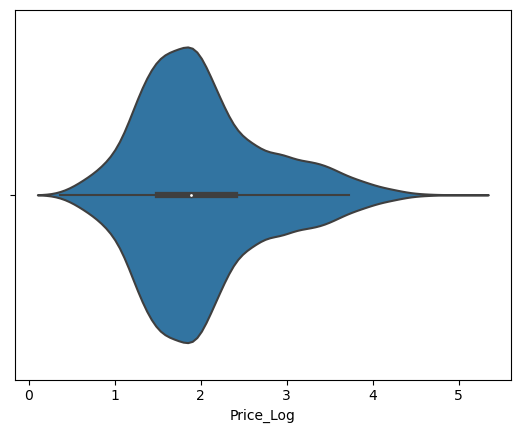

In [37]:
#DeepSpace way:
from deepspace.transformers.exploration.univariate.numerical.UnivariateAnalysis import UnivariateAnalysis
#Deepspace will show calculations and multiple charts by default
_ = (_ 
    >> UnivariateAnalysis(num_cols=[], figsize=(10,5)) 
)

### **Missing value treatment**

The code below is our null value treament algorithm.<br>
We take all identified features with nulls, except the target feature, and impute with average for numerical values, and mode for categorical.
As to the target feature we will drop them.

In [38]:

#DeepSpace way:
from deepspace.transformers.null.Process import ProcessImputation
_ = (_ 
    >> ProcessImputation(cat_cols=['Seats'], num_cols=['Mileage', 'Engine', 'Power']) 
    >> ProcessImputation(num_cols=['Price', 'Price_Log'], method='drop') 
)

num cols to impute
['Mileage', 'Engine', 'Power']
cat cols to impute
['Seats']
df cols
Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_price', 'Price', 'Price_Log', 'Kilometers_Driven_Log',
       'Price_Log_10_bins', 'Brand', 'Age'],
      dtype='object')


impute_nulls : removing 1234 rows for Price


In [39]:

#DeepSpace way:
from deepspace.transformers.null.Check import CheckNulls
_ = (_ 
    >> CheckNulls() 
)

**Observations**:
* All features with null values have been treated
* New_Price has too many null values (83%) and will be removed

[('Seats', 'Brand')]


________________________________________________________________________________________________________________________


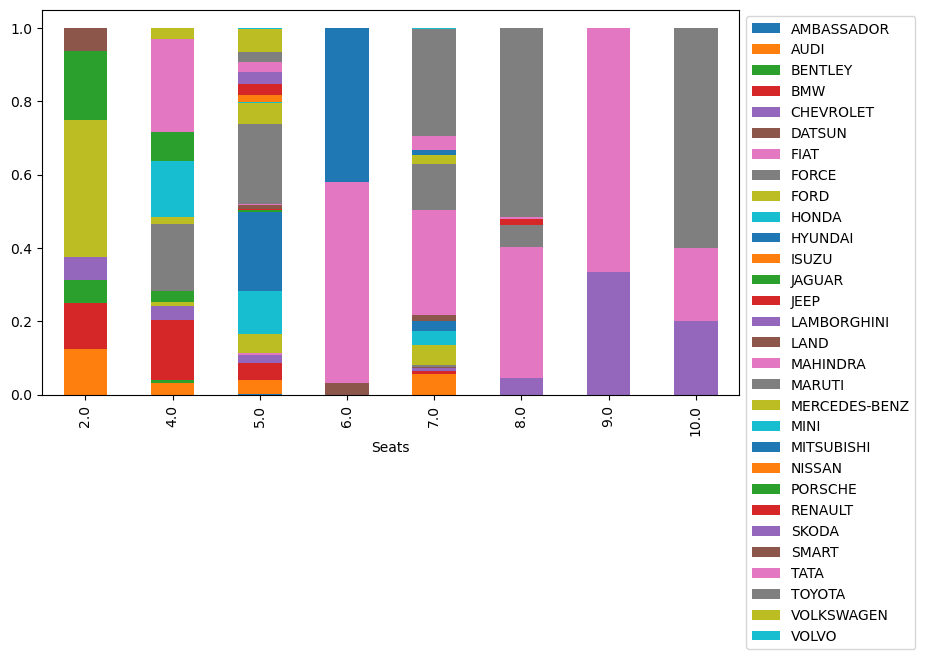

In [40]:
#DeepSpace way:
from deepspace.transformers.exploration.bivariate.NN.CxC import CxC
#Deepspace will show calculations and multiple charts by default
_ = (_ 
    >> CxC(cat_cols=['Seats', 'Brand']) 
)
#XXY

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

**Observations / Insights:**
* We observed some extreme outliers and we propose a treatment (Kilometers_Driven).<br>
* We found duplicates and proposed a treatment also.
* We observed some multicolinearity that should be addressed.<br>
* We looked at distributions and found right skewness for target_variable and proposed a solution.  

***TODO***

## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name.
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y).
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:**

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

#### Complete data preparation code with checkpoint (environment saved to pickle for future usage)

In [41]:
#here we adjust the columns that are useful for our analysis
from deepspace.transformers.column.categorical.Adjust import Adjust as CatAdjuster 
from deepspace.transformers.column.numerical.Adjust import Adjust as NumAdjuster 
from deepspace.transformers.featureengineering.func.logXPlus1.forward.XY import LogXPlus1 
from deepspace.transformers.outliers.Process import ProcessOutliers 
from deepspace.transformers.null.Process import ProcessImputation
from deepspace.transformers.encode.X.BeforeSplit import EncoderBeforeSplit
from deepspace.transformers.separate.Separator import Separator
from deepspace.transformers.column.Target import Adjust as TargetAdjuster
from deepspace.transformers.column.Drop import Adjust as DropAdjuster
from deepspace.transformers.drop.DropCols import DropCols
from deepspace.transformers.file.pickle.Save import Save
from deepspace.transformers.file.Load import CSVLoader
from deepspace.transformers.chain.Milestone import Milestone

file = r'used_cars.csv'

from deepspace.transformers.Transformer import Transformer
#Specific to current projet
class FeatureEngineerBrandFromName(Transformer):
    '''Target Feature Engineering'''
    def __init__(self):
        Transformer.__init__(self)
    def transform(self, ds):
        df = ds.data
        dfm = df['Name'].str.split(pat = ' ', expand = True)
        df['Brand'] = dfm[0].str.upper()
        #df['Model'] = dfm[1].str.upper()
        return ds
_ = ( 
        CSVLoader(file, ",")
        >> ProcessOutliers(num_cols=['Kilometers_Driven'], factor=10, method='median') 
        >> ProcessImputation(cat_cols=['Seats'], num_cols=['Mileage', 'Engine', 'Power']) 
        >> ProcessImputation(num_cols=['Price'], method='drop') 
        >> LogXPlus1 ('Price', 'Price_Log')  #+1 to avoid log(0) which is undefined
        >> LogXPlus1 ('Kilometers_Driven', 'Kilometers_Driven_Log') 
        >> FeatureEngineerBrandFromName() 
        >> CatAdjuster([     
                        'Brand',
                        'Location',
                        'Year',
                        'Fuel_Type',
                        'Transmission',
                        'Seats', #not continuous, but ordinal data
                        'Owner_Type'])
        >> NumAdjuster([
                        'Kilometers_Driven_Log',
                        'Mileage',
                        'Engine',
                        'Power',
                        'Price_Log',
                ])
        >> DropAdjuster(drop_cols=['S.No.', 'Name', 'New_price'])
        >> DropCols()
        >> TargetAdjuster(target_col='Price_Log')
        >> EncoderBeforeSplit()
        >> Separator()
        >> Save('dataprep-1.pkl')
)


averaging outliers 6 rows for Kilometers_Driven


num cols to impute
['Mileage', 'Engine', 'Power']
cat cols to impute
['Seats']
df cols
Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_price', 'Price'],
      dtype='object')


impute_nulls : removing 1234 rows for Price
cols to drop S.No.,Name,New_price
remaining cols to drop cols S.No.,Name,New_price
remaining cols Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_Log,Kilometers_Driven_Log,Brand
-> considering cat cols = Brand, Location, Year, Fuel_Type, Transmission, Seats, Owner_Type
Index(['Kilometers_Driven_Log', 'Mileage', 'Engine', 'Power', 'Price_Log',
       'Brand_AUDI', 'Brand_BENTLEY', 'Brand_BMW', 'Brand_CHEVROLET',
       'Brand_DATSUN', 'Brand_FIAT', 'Brand_FORCE', 'Brand_FORD',
       'Brand_HONDA', 'Brand_HYUNDAI', 'Brand_ISUZU', 'Brand_JAGUAR',
       'Brand_JEEP', 'Brand_LAMBORGHINI', 'Brand_LAND', 'Brand_MAHINDRA',
       'Brand_MARUTI', 'Brand_MERCEDES-BENZ', 'Brand_MINI', 'Brand_MITSUBISHI',
       'Brand_NISSAN', 'Brand_PORSCHE', 'Brand_RENAULT', 'Brand_SKODA',
       'Brand_SMART', 'Brand_TATA', 'Brand_TOYOTA', 'Brand_VOLKSWAGEN',
       'Brand_VOLVO', 'Location_Bangalore', 'Locat

**Answer:**
* We drop Name  because it has too many values as a categorical value.
* Price will be removed because we will use a transformed version instead, aka Pice_Log
* Pice_Log is removed from X because it's the target variable
* Kilometers_Driven is also replaced by the log transformed version, aka  Kilometers_Driven_Log

**In the next section we have created multiple models.
The first one is without log tranformations just to see the metric values. You can skip it if needed.
The following sections will take into account the log transformations**

### **Linear Regression**

#### **Linear Regression model #1.0**

###### Configuration
Let's create a first model with the following caracteristics :
* We remove some extreme outliers
* We impute nulls 
* We drop 'S.No.', 'Name', 'New_price' features

###### Data preparation

In [42]:
#here we adjust the columns that are useful for our analysis
from deepspace.transformers.column.categorical.Adjust import Adjust as CatAdjuster 
from deepspace.transformers.column.numerical.Adjust import Adjust as NumAdjuster 
from deepspace.transformers.outliers.Check import CheckOutliers 
from deepspace.transformers.outliers.Process import ProcessOutliers 
from deepspace.transformers.null.Check import CheckNulls
from deepspace.transformers.duplicates.CheckDuplicated import CheckDuplicated
from deepspace.transformers.duplicates.DropDuplicates import DropDuplicates
from deepspace.transformers.null.Process import ProcessImputation
from deepspace.transformers.encode.X.BeforeSplit import EncoderBeforeSplit
from deepspace.transformers.separate.Separator import Separator
from deepspace.transformers.split.Splitter import Splitter
from deepspace.transformers.column.Target import Adjust as TargetAdjuster
from deepspace.transformers.column.Drop import Adjust as DropAdjuster
from deepspace.transformers.drop.DropCols import DropCols
from deepspace.transformers.file.pickle.Save import Save
from deepspace.transformers.file.Load import CSVLoader
from deepspace.transformers.chain.Milestone import Milestone

file = r'used_cars.csv'
file = r'C:\Users\fdemb\Documents\Work\Projets\AI\MIT\Capstone Project\lib\used_cars.csv'

_ = ( 
        CSVLoader(file, ",")
        >> ProcessOutliers(num_cols=['Kilometers_Driven'], factor=10, method='median')
        >> CheckOutliers() 
        >> ProcessImputation(cat_cols=['Seats'], num_cols=['Mileage', 'Engine', 'Power']) 
        >> ProcessImputation(num_cols=['Price'], method='drop') 
        >> CheckNulls() 
        >> CatAdjuster([     
                        'Location',
                        'Year',
                        'Fuel_Type',
                        'Transmission',
                        'Seats', #not continuous, but ordinal data
                        'Owner_Type'])
        >> NumAdjuster([
                        'Kilometers_Driven',
                        'Mileage',
                        'Engine',
                        'Power',
                        'Price',
                ])
        >> DropAdjuster(drop_cols=['S.No.', 'Name', 'New_price'])
        >> DropCols()
        >> CheckNulls()
        >> CheckDuplicated()
        >> DropDuplicates()
        >> CheckDuplicated()                
        >> TargetAdjuster(target_col='Price')
        >> EncoderBeforeSplit()
        >> Separator()
        >> Splitter()
        >> Save('dataprep-1.pkl')
)


averaging outliers 6 rows for Kilometers_Driven
Feature *Year*: found 58 lower_bound outliers
Feature *Kilometers_Driven*: found 252 upper_bound rows outliers
Feature *Mileage*: found 81 lower_bound outliers
Feature *Mileage*: found 18 upper_bound rows outliers
Feature *Engine*: found 65 upper_bound rows outliers
Feature *Power*: found 273 upper_bound rows outliers
Feature *Seats*: found 137 lower_bound outliers
Feature *Seats*: found 1015 upper_bound rows outliers
Feature *New_price*: found 108 upper_bound rows outliers
Feature *Price*: found 718 upper_bound rows outliers


num cols to impute
['Mileage', 'Engine', 'Power']
cat cols to impute
['Seats']
df cols
Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_price', 'Price'],
      dtype='object')


impute_nulls : removing 1234 rows for Price


cols to drop S.No.,Name,New_price
remaining cols to drop cols S.No.,Name,New_price
remaining cols Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


Duplicates found : 2
Duplicates found : 0
-> considering cat cols = Location, Year, Fuel_Type, Transmission, Seats, Owner_Type
Index(['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Year_1999', 'Year_2000', 'Year_2001', 'Year_2002',
       'Year_2003', 'Year_2004', 'Year_2005', 'Year_2006', 'Year_2007',
       'Year_2008', 'Year_2009', 'Year_2010', 'Year_2011', 'Year_2012',
       'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016', 'Year_2017',
       'Year_2018', 'Year_2019', 'Fuel_Type_Diesel', 'Fuel_Type_Electric',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Manual', 'Seats_4.0',
       'Seats_5.0', 'Seats_6.0', 'Seats_7.0', 'Seats_8.0', 'Seats_9.0',
       'Seats_10.0', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_

###### Modeling

In [43]:
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.model.regression.linear.statsmodel.Model import OLS
from deepspace.transformers.model.regression.linear.statsmodel.performance.CalcNView import CalcNView as Performance

(
   Load('dataprep-1.pkl')
   >> OLS()
   >> Performance('dataprep-1.0', saveto='userd-cars-price--performance-store.pkl', kind='natural')
)

Trying to load from dataprep-1.pkl...
Loading from dataprep-1.pkl


Trying to save to userd-cars-price--performance-store.pkl...
Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl
Saving to userd-cars-price--performance-store.pkl


**Observations:**<br/>
This model is not so good, but quite interesting. We have a R-squared that is comparable for train and test data, not close to 1, which means the model is not overfitting. And we have similar values for RMSE.<br>

R-squared and Adjusted R-squared is telling us that this simple model is explaining about 80% of the Price in training data and 78% in validation data.

RMSE tells us that the error when predicting price is about 5 for training data, and 4.7 for test data. So if we take the average  predicted price for the train data, which is 9.44, the price could be  
3.84, wich is a huge difference.

We could have a better model.

#### **Linear Regression model #1.1**

###### Configuration

Let's create a better model with the following caracteristics :
* Price in logarithm
* Kilometers_Driven log transform
* Remove some outliers
* Impute nulls
* Drop 'S.No.', 'Name', 'New_price' features
* No scaling


###### Data preparation

In [44]:
#here we adjust the columns that are useful for our analysis
from deepspace.transformers.column.categorical.Adjust import Adjust as CatAdjuster 
from deepspace.transformers.column.numerical.Adjust import Adjust as NumAdjuster 
from deepspace.transformers.featureengineering.func.logXPlus1.forward.XY import LogXPlus1 
from deepspace.transformers.outliers.Check import CheckOutliers 
from deepspace.transformers.outliers.Process import ProcessOutliers 
from deepspace.transformers.null.Check import CheckNulls
from deepspace.transformers.null.Process import ProcessImputation
from deepspace.transformers.duplicates.CheckDuplicated import CheckDuplicated
from deepspace.transformers.duplicates.DropDuplicates import DropDuplicates
from deepspace.transformers.encode.X.BeforeSplit import EncoderBeforeSplit
from deepspace.transformers.separate.Separator import Separator
from deepspace.transformers.split.Splitter import Splitter
from deepspace.transformers.column.Target import Adjust as TargetAdjuster
from deepspace.transformers.column.Drop import Adjust as DropAdjuster
from deepspace.transformers.drop.DropCols import DropCols
from deepspace.transformers.file.pickle.Save import Save
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.file.Load import CSVLoader
from deepspace.transformers.chain.Milestone import Milestone

file = r'used_cars.csv'
file = r'C:\Users\fdemb\Documents\Work\Projets\AI\MIT\Capstone Project\lib\used_cars.csv'

_ = ( 
        CSVLoader(file, ",")
        >> ProcessOutliers(num_cols=['Kilometers_Driven'], factor=100, method='median')
        >> CheckOutliers() 
        >> ProcessImputation(cat_cols=['Seats'], num_cols=['Mileage', 'Engine', 'Power']) 
        >> ProcessImputation(num_cols=['Price'], method='drop') 
        >> CheckNulls() 
        >> LogXPlus1('Price', 'Price_Log')  #+1 to avoid log(0) which is undefined
        >> LogXPlus1('Kilometers_Driven', 'Kilometers_Driven_Log') 
        >> CatAdjuster([   
                        'Location',
                        'Year',
                        'Fuel_Type',
                        'Transmission',
                        'Seats', #not continuous, but ordinal data
                        'Owner_Type'])
        >> NumAdjuster([
                        'Price_Log',
                        'Kilometers_Driven_Log',
                        'Mileage',
                        'Engine',
                        'Power'
                ])
        >> DropAdjuster(drop_cols=['S.No.', 'Name', 'New_price'])
        >> DropCols()
        >> CheckNulls() 
        >> CheckDuplicated()
        >> DropDuplicates()
        >> CheckDuplicated()        
        >> TargetAdjuster(target_col='Price_Log')
        >> EncoderBeforeSplit()
        >> Save('dataprep-1.1-before-separator.pkl')
        >> Separator()
        >> Splitter()
        >> Save('dataprep-1.1-after-split.pkl')
)


averaging outliers 1 rows for Kilometers_Driven
Feature *Year*: found 58 lower_bound outliers
Feature *Kilometers_Driven*: found 257 upper_bound rows outliers
Feature *Mileage*: found 81 lower_bound outliers
Feature *Mileage*: found 18 upper_bound rows outliers
Feature *Engine*: found 65 upper_bound rows outliers
Feature *Power*: found 273 upper_bound rows outliers
Feature *Seats*: found 137 lower_bound outliers
Feature *Seats*: found 1015 upper_bound rows outliers
Feature *New_price*: found 108 upper_bound rows outliers
Feature *Price*: found 718 upper_bound rows outliers


num cols to impute
['Mileage', 'Engine', 'Power']
cat cols to impute
['Seats']
df cols
Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_price', 'Price'],
      dtype='object')


impute_nulls : removing 1234 rows for Price


cols to drop S.No.,Name,New_price
remaining cols to drop cols S.No.,Name,New_price
remaining cols Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_Log,Kilometers_Driven_Log


Duplicates found : 2
Duplicates found : 0
-> considering cat cols = Location, Year, Fuel_Type, Transmission, Seats, Owner_Type
Index(['Price_Log', 'Kilometers_Driven_Log', 'Mileage', 'Engine', 'Power',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Year_1999', 'Year_2000', 'Year_2001', 'Year_2002',
       'Year_2003', 'Year_2004', 'Year_2005', 'Year_2006', 'Year_2007',
       'Year_2008', 'Year_2009', 'Year_2010', 'Year_2011', 'Year_2012',
       'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016', 'Year_2017',
       'Year_2018', 'Year_2019', 'Fuel_Type_Diesel', 'Fuel_Type_Electric',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Manual', 'Seats_4.0',
       'Seats_5.0', 'Seats_6.0', 'Seats_7.0', 'Seats_8.0', 'Seats_9.0',
       'Seats_10.0', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
      

###### Modeling

In [45]:
from deepspace.transformers.file.pickle.Save import Save
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.model.regression.linear.statsmodel.Model import OLS

_ = (
    Load('dataprep-1.1-after-split.pkl')
    >> OLS()
    >> Save('dataprep-1.1-after-model.pkl')
)

Trying to load from dataprep-1.1-after-split.pkl...
Loading from dataprep-1.1-after-split.pkl
Trying to save to dataprep-1.1-after-model.pkl...
Saving to dataprep-1.1-after-model.pkl


In [46]:
from deepspace.transformers.file.pickle.Save import Save
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.model.regression.linear.statsmodel.performance.CalcNView import CalcNView as Performance

_ = (
    Load('dataprep-1.1-after-model.pkl')
    >> Performance('dataprep-1.1', saveto='userd-cars-price--performance-store.pkl', kind='synthetic')
    >> Save('dataprep-1.1-after-perf.pkl')
)

Trying to load from dataprep-1.1-after-model.pkl...
Loading from dataprep-1.1-after-model.pkl


Trying to save to userd-cars-price--performance-store.pkl...
Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl
Saving to userd-cars-price--performance-store.pkl
Trying to save to dataprep-1.1-after-perf.pkl...
Saving to dataprep-1.1-after-perf.pkl


###### **Observations:**

This model is quite good. We have a R-squared that is comparable for train and test data. Also RMSE is quite low.
The model is explaing 88% of the price in the training data as well as the test data. We consider the model as non fitting.

Also RMSE tells us that the error when predicting price is about 0.29 for training data, as well as for test data. But here it's related to the price logarithm.
For the real price, RMSE is 6.57 and the mean price is 9 wich is again a bad model makeing the price as low as 2.54, which is as bad as the previous one for teh average predicted price.
<br>
We could have a better model.


Let's see basic model assumptions if they hold.

###### Assumptions checking

Trying to load from dataprep-1.1-after-perf.pkl...
Loading from dataprep-1.1-after-perf.pkl
residuals mean close to 0: assumption #1 holds (6.674606385518742e-14)
No heteroscedasticity: null hypotesis fail hence assumption #2 holds (3.014835675498193e-06)


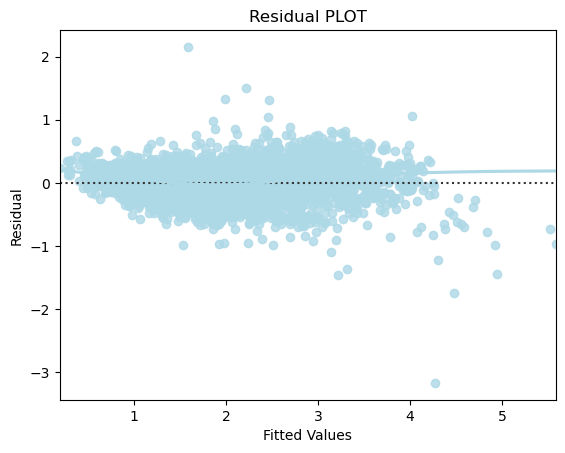

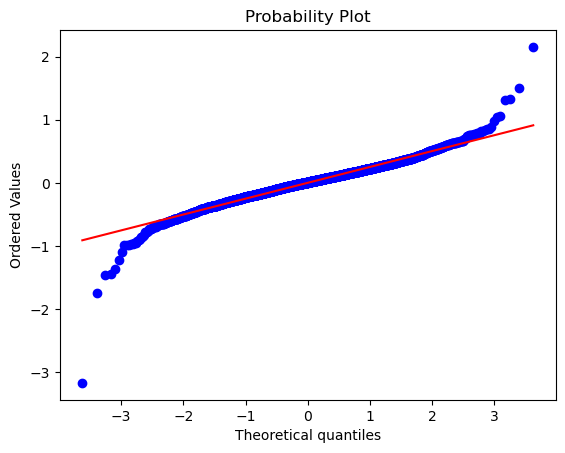

In [47]:
from deepspace.transformers.model.regression.linear.assumptions.CheckResidualsMean import CheckResidualsMean
from deepspace.transformers.model.regression.linear.assumptions.CheckHomoscedasticity import CheckHomoscedasticity
from deepspace.transformers.model.regression.linear.assumptions.CheckLinearity import CheckLinearity
from deepspace.transformers.model.regression.linear.assumptions.CheckNormalityOfErrorTerms import CheckNormalityOfErrorTerms
from deepspace.transformers.file.pickle.Load import Load

( 
    Load('dataprep-1.1-after-perf.pkl')
    >> CheckResidualsMean()
    >> CheckHomoscedasticity()
    >> CheckLinearity()
    >> CheckNormalityOfErrorTerms()
)

###### **Observations**

1. Residuals mean close to 0, so this first assumption holds
2. No heteroscedasticity: null hypotesis fail so this second assumption holds
3. Linearity of Variables : The error terms are ramdoly distributed around the x axis : this assumption does hold
4. Tests for Normality: we expect normality of error distribution and the previous graph demonstrates a good fit, so assumption 4 holds

Let'st try to improve the model with log transformed Kilometers_Driven.



###### Check performance (reverted)

Trying to load from dataprep-1.1-after-perf.pkl...
Loading from dataprep-1.1-after-perf.pkl


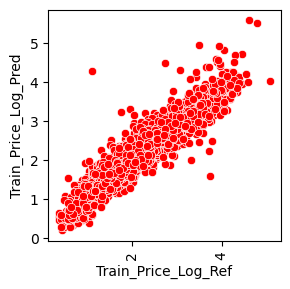

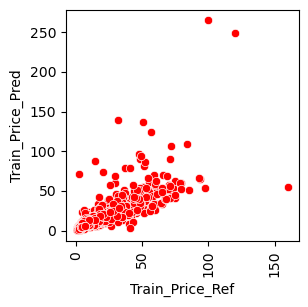

Trying to load from dataprep-1.1-after-perf.pkl...
Loading from dataprep-1.1-after-perf.pkl


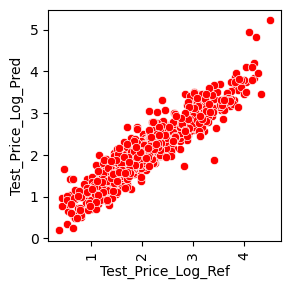

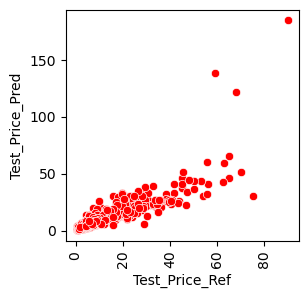

In [48]:
from deepspace.transformers.chain.Wrap import Wrap
from deepspace.transformers.Transformer import Transformer
from deepspace.transformers.file.pickle.Load import Load

from deepspace.transformers.separate.inverse.train.X import InverseSeparator as XInverseSeparator_Train
from deepspace.transformers.separate.inverse.train.Y import InverseSeparator as YInverseSeparator_Train
from deepspace.transformers.separate.inverse.test.X import InverseSeparator as XInverseSeparator_Test
from deepspace.transformers.separate.inverse.test.Y import InverseSeparator as YInverseSeparator_Test

from deepspace.transformers.scale.inverse.train.X import XInverseScaler2 as XInverseScaler2_Train
from deepspace.transformers.scale.inverse.train.Y import YInverseScaler2 as YInverseScaler2_Train
from deepspace.transformers.scale.inverse.test.X import XInverseScaler2 as XInverseScaler2_Test
from deepspace.transformers.scale.inverse.test.Y import YInverseScaler2 as YInverseScaler2_Test

from deepspace.transformers.featureengineering.func.logXPlus1.backward.train.X import InvLogXPlus1 as XInvLogXPlus1_Train
from deepspace.transformers.featureengineering.func.logXPlus1.backward.train.Y import InvLogXPlus1 as YInvLogXPlus1_Train
from deepspace.transformers.featureengineering.func.logXPlus1.backward.test.X import InvLogXPlus1 as XInvLogXPlus1_Test
from deepspace.transformers.featureengineering.func.logXPlus1.backward.test.Y import InvLogXPlus1 as YInvLogXPlus1_Test

from deepspace.transformers.model.regression.linear.statsmodel.performance.inverse.train.Calc import Calc as InversePerfCalc_Train
from deepspace.transformers.model.regression.linear.statsmodel.performance.inverse.test.Calc import Calc as InversePerfCalc_Test

from deepspace.transformers.model.regression.linear.statsmodel.performance.inverse.Plot import TrainPredictionPlot, TestPredictionPlot

from deepspace.transformers.column.Target import Adjust as TargetAdjuster
#########################
### TODO ON TEST DATA ###
#########################
class TrainInvertedPerformance(Transformer):
    def transform(self, ds):
        _ = (Wrap(ds)
            >> XInverseSeparator_Train('Price_Log')
            >> YInverseSeparator_Train('Price_Log')
            >> TrainPredictionPlot('Price_Log', figsize=(3, 3), xlabel='Train_Price_Log_Ref', ylabel='Train_Price_Log_Pred')
            >> XInvLogXPlus1_Train('Price', 'Price_Log')
            >> YInvLogXPlus1_Train('Price', 'Price_Log')
            >> TrainPredictionPlot('Price', figsize=(3, 3), xlabel='Train_Price_Ref', ylabel='Train_Price_Pred') 
            >> TargetAdjuster(target_col='Price')
            >> InversePerfCalc_Train('Price')
        )
        return _.ds
class TestInvertedPerformance(Transformer):
    def transform(self, ds):
        _ = (Wrap(ds)
            >> XInverseSeparator_Test('Price_Log')
            >> YInverseSeparator_Test('Price_Log')
            >> TestPredictionPlot('Price_Log', figsize=(3, 3), xlabel='Test_Price_Log_Ref', ylabel='Test_Price_Log_Pred')
            >> XInvLogXPlus1_Test('Price', 'Price_Log')
            >> YInvLogXPlus1_Test('Price', 'Price_Log')
            >> TestPredictionPlot('Price', figsize=(3, 3), xlabel='Test_Price_Ref', ylabel='Test_Price_Pred')
            >> TargetAdjuster(target_col='Price')
            >> InversePerfCalc_Test('Price')
        )
        return _.ds
_Tn = ( 
    Load('dataprep-1.1-after-perf.pkl')
	>> TrainInvertedPerformance()
)

_tt = ( 
    Load('dataprep-1.1-after-perf.pkl')
	>> TestInvertedPerformance()
)

Trying to load from dataprep-1.1-after-perf.pkl...
Loading from dataprep-1.1-after-perf.pkl


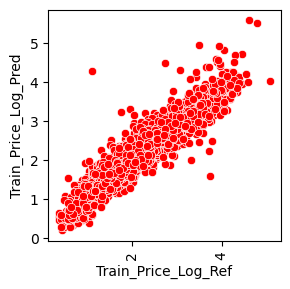

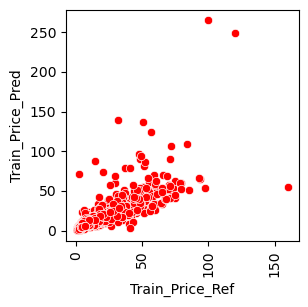

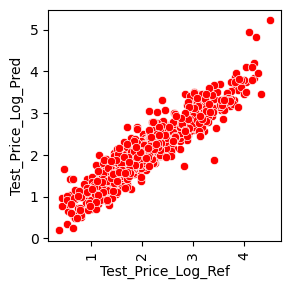

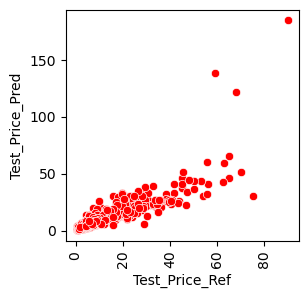

Trying to save to userd-cars-price--performance-store.pkl...
Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl
Saving to userd-cars-price--performance-store.pkl


In [49]:
from deepspace.transformers.chain.Wrap import Wrap
from deepspace.transformers.Transformer import Transformer
from deepspace.transformers.file.pickle.Load import Load

from deepspace.transformers.separate.inverse.train.X import InverseSeparator as XInverseSeparator_Train
from deepspace.transformers.separate.inverse.train.Y import InverseSeparator as YInverseSeparator_Train
from deepspace.transformers.separate.inverse.test.X import InverseSeparator as XInverseSeparator_Test
from deepspace.transformers.separate.inverse.test.Y import InverseSeparator as YInverseSeparator_Test

from deepspace.transformers.scale.inverse.train.X import XInverseScaler2 as XInverseScaler2_Train
from deepspace.transformers.scale.inverse.train.Y import YInverseScaler2 as YInverseScaler2_Train
from deepspace.transformers.scale.inverse.test.X import XInverseScaler2 as XInverseScaler2_Test
from deepspace.transformers.scale.inverse.test.Y import YInverseScaler2 as YInverseScaler2_Test

from deepspace.transformers.featureengineering.func.logXPlus1.backward.train.X import InvLogXPlus1 as XInvLogXPlus1_Train
from deepspace.transformers.featureengineering.func.logXPlus1.backward.train.Y import InvLogXPlus1 as YInvLogXPlus1_Train
from deepspace.transformers.featureengineering.func.logXPlus1.backward.test.X import InvLogXPlus1 as XInvLogXPlus1_Test
from deepspace.transformers.featureengineering.func.logXPlus1.backward.test.Y import InvLogXPlus1 as YInvLogXPlus1_Test

from deepspace.transformers.model.regression.linear.statsmodel.performance.inverse.train.Calc import Calc as InversePerfCalc_Train
from deepspace.transformers.model.regression.linear.statsmodel.performance.inverse.test.Calc import Calc as InversePerfCalc_Test

from deepspace.transformers.model.regression.linear.statsmodel.performance.inverse.Plot import TrainPredictionPlot, TestPredictionPlot

from deepspace.transformers.column.Target import Adjust as TargetAdjuster
#########################
#########################
class TrainInvertedPerformance(Transformer):
    def transform(self, ds):
        _ = (Wrap(ds)
            >> XInverseSeparator_Train('Price_Log')
            >> YInverseSeparator_Train('Price_Log')
            >> TrainPredictionPlot('Price_Log', figsize=(3, 3), xlabel='Train_Price_Log_Ref', ylabel='Train_Price_Log_Pred')
            >> XInvLogXPlus1_Train('Price', 'Price_Log')
            >> YInvLogXPlus1_Train('Price', 'Price_Log')
            >> TrainPredictionPlot('Price', figsize=(3, 3), xlabel='Train_Price_Ref', ylabel='Train_Price_Pred') 
            >> TargetAdjuster(target_col='Price')
            >> InversePerfCalc_Train('Price')
        )
        return _.ds
class TestInvertedPerformance(Transformer):
    def transform(self, ds):
        _ = (Wrap(ds)
            >> XInverseSeparator_Test('Price_Log')
            >> YInverseSeparator_Test('Price_Log')
            >> TestPredictionPlot('Price_Log', figsize=(3, 3), xlabel='Test_Price_Log_Ref', ylabel='Test_Price_Log_Pred')
            >> XInvLogXPlus1_Test('Price', 'Price_Log')
            >> YInvLogXPlus1_Test('Price', 'Price_Log')
            >> TestPredictionPlot('Price', figsize=(3, 3), xlabel='Test_Price_Ref', ylabel='Test_Price_Pred')
            >> TargetAdjuster(target_col='Price')
            >> InversePerfCalc_Test('Price')
        )
        return _.ds

from deepspace.transformers.model.regression.linear.statsmodel.performance.inverse.Calc import Calc as InversePerfCalc
_ = ( 
    Load('dataprep-1.1-after-perf.pkl')
	>> TrainInvertedPerformance()
	>> TestInvertedPerformance()
    >> InversePerfCalc('Price', identifier='dataprep-1.1--reversed', saveto='userd-cars-price--performance-store.pkl', kind='naturalized')
)

In [50]:
from deepspace.transformers.chain.Milestone import Milestone
from deepspace.transformers.project.performance.StorageViewer import Performance as ViewStoredProjectPerformance

(ViewStoredProjectPerformance('userd-cars-price--performance-store.pkl', kinds=['natural', 'naturalized']) >> Milestone())

Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl


#### **Linear Regression model #1.1.2**

###### Configuration

Let's create a better model with the following caracteristics :
* Price in logarithm
* Kilometers_Driven log transform
* Remove some outliers
* Impute nulls
* Drop 'S.No.', 'Name', 'New_price' features
* Scaling


###### Data Preparation

In [51]:
#here we adjust the columns that are useful for our analysis
from deepspace.transformers.column.categorical.Adjust import Adjust as CatAdjuster 
from deepspace.transformers.column.numerical.Adjust import Adjust as NumAdjuster 
#from deepspace.transformers.featureengineering.func.log.LogPlusN import LogPlusN
from deepspace.transformers.featureengineering.func.logXPlus1.forward.XY import LogXPlus1 
from deepspace.transformers.outliers.Check import CheckOutliers 
from deepspace.transformers.outliers.Process import ProcessOutliers 
from deepspace.transformers.null.Check import CheckNulls
from deepspace.transformers.null.Process import ProcessImputation
from deepspace.transformers.duplicates.CheckDuplicated import CheckDuplicated
from deepspace.transformers.duplicates.DropDuplicates import DropDuplicates
from deepspace.transformers.encode.X.BeforeSplit import EncoderBeforeSplit
from deepspace.transformers.separate.Separator import Separator
from deepspace.transformers.split.Splitter import Splitter
from deepspace.transformers.column.Target import Adjust as TargetAdjuster
from deepspace.transformers.column.Drop import Adjust as DropAdjuster
from deepspace.transformers.drop.DropCols import DropCols
from deepspace.transformers.scale.Scaler2 import Scaler2
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.file.pickle.Save import Save
from deepspace.transformers.file.Load import CSVLoader
from deepspace.transformers.chain.Milestone import Milestone
from deepspace.transformers.model.regression.linear.statsmodel.Model import OLS

file = r'used_cars.csv'
file = r'C:\Users\fdemb\Documents\Work\Projets\AI\MIT\Capstone Project\lib\used_cars.csv'

from deepspace.transformers.Transformer import Transformer

_ = ( 
        CSVLoader(file, ",")
        >> ProcessOutliers(num_cols=['Kilometers_Driven'], factor=100, method='median')
        >> CheckOutliers() 
        >> ProcessImputation(cat_cols=['Seats'], num_cols=['Mileage', 'Engine', 'Power']) 
        >> ProcessImputation(num_cols=['Price'], method='drop') 
        >> CheckNulls() 
        >> LogXPlus1('Price', 'Price_Log')  #+1 to avoid log(0) which is undefined
        >> LogXPlus1('Kilometers_Driven', 'Kilometers_Driven_Log') 
        >> CatAdjuster([   
                        'Location',
                        'Year',
                        'Fuel_Type',
                        'Transmission',
                        'Seats', #not continuous, but ordinal data
                        'Owner_Type'])
        >> NumAdjuster([
                        'Price_Log',
                        'Kilometers_Driven_Log',
                        'Mileage',
                        'Engine',
                        'Power'
                ])
        >> DropAdjuster(drop_cols=['S.No.', 'Name', 'New_price'])
        >> DropCols()
        >> CheckNulls() 
        >> CheckDuplicated()
        >> DropDuplicates()
        >> CheckDuplicated()        
        >> TargetAdjuster(target_col='Price_Log')
        >> EncoderBeforeSplit()
        >> Save('dataprep-1.1-before-separator.pkl')
        >> Scaler2(num_cols=['Mileage', 'Engine', 'Power', 'Price_Log', 'Kilometers_Driven_Log',
                'Year_1999', 'Year_2000', 'Year_2001', 'Year_2002', 'Year_2003',
                'Year_2004', 'Year_2005', 'Year_2006', 'Year_2007', 'Year_2008',
                'Year_2009', 'Year_2010', 'Year_2011', 'Year_2012', 'Year_2013',
                'Year_2014', 'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018',
                'Year_2019', 'Location_Bangalore', 'Location_Chennai',
                'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
                'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
                'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel',
                'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
                'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
                'Owner_Type_Third', 'Seats_4.0', 'Seats_5.0', 'Seats_6.0', 'Seats_7.0',
                'Seats_8.0', 'Seats_9.0', 'Seats_10.0'])
        >> Separator()
        >> Splitter()
        >> Save('dataprep-1.1.2-post-split.pkl')
)

averaging outliers 1 rows for Kilometers_Driven
Feature *Year*: found 58 lower_bound outliers
Feature *Kilometers_Driven*: found 257 upper_bound rows outliers
Feature *Mileage*: found 81 lower_bound outliers
Feature *Mileage*: found 18 upper_bound rows outliers
Feature *Engine*: found 65 upper_bound rows outliers
Feature *Power*: found 273 upper_bound rows outliers
Feature *Seats*: found 137 lower_bound outliers
Feature *Seats*: found 1015 upper_bound rows outliers
Feature *New_price*: found 108 upper_bound rows outliers
Feature *Price*: found 718 upper_bound rows outliers


num cols to impute
['Mileage', 'Engine', 'Power']
cat cols to impute
['Seats']
df cols
Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_price', 'Price'],
      dtype='object')


impute_nulls : removing 1234 rows for Price


cols to drop S.No.,Name,New_price
remaining cols to drop cols S.No.,Name,New_price
remaining cols Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_Log,Kilometers_Driven_Log


Duplicates found : 2
Duplicates found : 0
-> considering cat cols = Location, Year, Fuel_Type, Transmission, Seats, Owner_Type
Index(['Price_Log', 'Kilometers_Driven_Log', 'Mileage', 'Engine', 'Power',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Year_1999', 'Year_2000', 'Year_2001', 'Year_2002',
       'Year_2003', 'Year_2004', 'Year_2005', 'Year_2006', 'Year_2007',
       'Year_2008', 'Year_2009', 'Year_2010', 'Year_2011', 'Year_2012',
       'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016', 'Year_2017',
       'Year_2018', 'Year_2019', 'Fuel_Type_Diesel', 'Fuel_Type_Electric',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Manual', 'Seats_4.0',
       'Seats_5.0', 'Seats_6.0', 'Seats_7.0', 'Seats_8.0', 'Seats_9.0',
       'Seats_10.0', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
      

###### Running the model

In [52]:
from deepspace.transformers.model.regression.linear.statsmodel.Model import OLS
from deepspace.transformers.model.regression.linear.statsmodel.performance.CalcNView import CalcNView as Performance
(
    Load('dataprep-1.1.2-post-split.pkl')
    >> OLS()
    >> Save('dataprep-1.1.2-post-model.pkl')
)

Trying to load from dataprep-1.1.2-post-split.pkl...
Loading from dataprep-1.1.2-post-split.pkl
Trying to save to dataprep-1.1.2-post-model.pkl...
Saving to dataprep-1.1.2-post-model.pkl


###### Performance calculation (as is)

In [53]:
from deepspace.transformers.model.regression.linear.statsmodel.performance.CalcNView import CalcNView as Performance

(
    Load('dataprep-1.1.2-post-model.pkl')
    >> Performance('dataprep-1.1.2', saveto='userd-cars-price--performance-store.pkl', kind='synthetic')
    >> Save('dataprep-1.1.2-post-perf.pkl')
)

Trying to load from dataprep-1.1.2-post-model.pkl...
Loading from dataprep-1.1.2-post-model.pkl


Trying to save to userd-cars-price--performance-store.pkl...
Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl
Saving to userd-cars-price--performance-store.pkl
Trying to save to dataprep-1.1.2-post-perf.pkl...
Saving to dataprep-1.1.2-post-perf.pkl


##### **Observations:**


It seems that the model has the same performance with or whithout scaling: R-squared and Adjusted R-squared are the same as before. RMSE decreases but it's expected as the whole data variables are lower than before.


###### Performance calculation (reverted)

Trying to load from dataprep-1.1.2-post-perf.pkl...
Loading from dataprep-1.1.2-post-perf.pkl


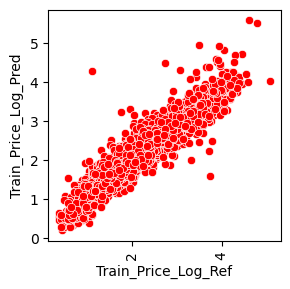

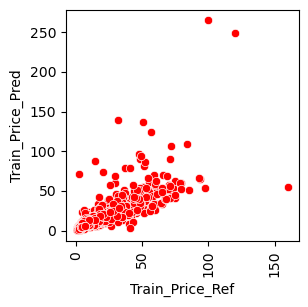

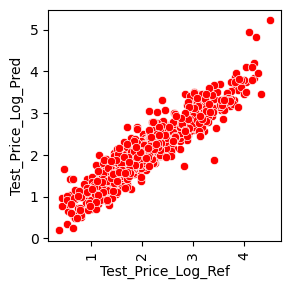

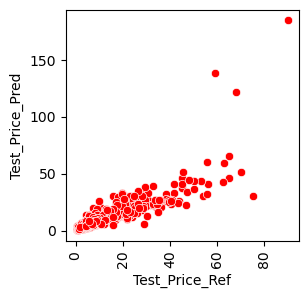

Trying to save to userd-cars-price--performance-store.pkl...
Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl
Saving to userd-cars-price--performance-store.pkl


In [54]:
from deepspace.transformers.chain.Wrap import Wrap
from deepspace.transformers.Transformer import Transformer
from deepspace.transformers.file.pickle.Load import Load

from deepspace.transformers.separate.inverse.train.X import InverseSeparator as XInverseSeparator_Train
from deepspace.transformers.separate.inverse.train.Y import InverseSeparator as YInverseSeparator_Train
from deepspace.transformers.separate.inverse.test.X import InverseSeparator as XInverseSeparator_Test
from deepspace.transformers.separate.inverse.test.Y import InverseSeparator as YInverseSeparator_Test

from deepspace.transformers.scale.inverse.train.X import XInverseScaler2 as XInverseScaler2_Train
from deepspace.transformers.scale.inverse.train.Y import YInverseScaler2 as YInverseScaler2_Train
from deepspace.transformers.scale.inverse.test.X import XInverseScaler2 as XInverseScaler2_Test
from deepspace.transformers.scale.inverse.test.Y import YInverseScaler2 as YInverseScaler2_Test

from deepspace.transformers.featureengineering.func.logXPlus1.backward.train.X import InvLogXPlus1 as XInvLogXPlus1_Train
from deepspace.transformers.featureengineering.func.logXPlus1.backward.train.Y import InvLogXPlus1 as YInvLogXPlus1_Train
from deepspace.transformers.featureengineering.func.logXPlus1.backward.test.X import InvLogXPlus1 as XInvLogXPlus1_Test
from deepspace.transformers.featureengineering.func.logXPlus1.backward.test.Y import InvLogXPlus1 as YInvLogXPlus1_Test

from deepspace.transformers.model.regression.linear.statsmodel.performance.inverse.train.Calc import Calc as InversePerfCalc_Train
from deepspace.transformers.model.regression.linear.statsmodel.performance.inverse.test.Calc import Calc as InversePerfCalc_Test

from deepspace.transformers.model.regression.linear.statsmodel.performance.inverse.Plot import TrainPredictionPlot, TestPredictionPlot

from deepspace.transformers.column.Target import Adjust as TargetAdjuster
#########################
#########################
class TrainInvertedPerformance(Transformer):
    def transform(self, ds):
        _ = (Wrap(ds)
            >> XInverseSeparator_Train('Price_Log')
            >> YInverseSeparator_Train('Price_Log')
            >> XInverseScaler2_Train()
            >> YInverseScaler2_Train()
            >> TrainPredictionPlot('Price_Log', figsize=(3, 3), xlabel='Train_Price_Log_Ref', ylabel='Train_Price_Log_Pred')
            >> XInvLogXPlus1_Train('Price', 'Price_Log')
            >> YInvLogXPlus1_Train('Price', 'Price_Log')
            >> TrainPredictionPlot('Price', figsize=(3, 3), xlabel='Train_Price_Ref', ylabel='Train_Price_Pred') 
            >> TargetAdjuster(target_col='Price')
            >> InversePerfCalc_Train('Price')
        )
        return _.ds
class TestInvertedPerformance(Transformer):
    def transform(self, ds):
        _ = (Wrap(ds)
            >> XInverseSeparator_Test('Price_Log')
            >> YInverseSeparator_Test('Price_Log')
            >> XInverseScaler2_Test()
            >> YInverseScaler2_Test()
            >> TestPredictionPlot('Price_Log', figsize=(3, 3), xlabel='Test_Price_Log_Ref', ylabel='Test_Price_Log_Pred')
            >> XInvLogXPlus1_Test('Price', 'Price_Log')
            >> YInvLogXPlus1_Test('Price', 'Price_Log')
            >> TestPredictionPlot('Price', figsize=(3, 3), xlabel='Test_Price_Ref', ylabel='Test_Price_Pred')
            >> TargetAdjuster(target_col='Price')
            >> InversePerfCalc_Test('Price')
        )
        return _.ds

from deepspace.transformers.model.regression.linear.statsmodel.performance.inverse.Calc import Calc as InversePerfCalc
_ = ( 
    Load('dataprep-1.1.2-post-perf.pkl') 
	>> TrainInvertedPerformance()
	>> TestInvertedPerformance()
    >> InversePerfCalc('Price', identifier='dataprep-1.1.2--reverse', saveto='userd-cars-price--performance-store.pkl', kind='naturalized')
)

**Observation**<br>
The previous task is the performance after normalization, a normalized performance. This means applygin all reverse operations as log, scaling, etc, so that we have a version easy to compare with models without this configuration. 

We observe that RMSE is quite important as it's close to the mean.

If the residuals follow a normal distribution (we will check that later) then we can predict that 95% of the prices will fall in between +/-2*5.78.

**Observation**<br>
Here we just plot the target variable against the predicted values. We observe a certain linerarity.<br>
The plot should should show a line close to the equation y=x, and this is the case. <br>
This is exactly what we observe. 

In [55]:
from deepspace.transformers.chain.Milestone import Milestone
from deepspace.transformers.project.performance.StorageViewer import Performance as ViewStoredProjectPerformance

(ViewStoredProjectPerformance('userd-cars-price--performance-store.pkl', kinds=['natural', 'naturalized']) >> Milestone())

Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl


###### Assumptions checking

Trying to load from dataprep-1.1.2-post-perf.pkl...
Loading from dataprep-1.1.2-post-perf.pkl
residuals mean close to 0: assumption #1 holds (3.264835362837028e-15)
No heteroscedasticity: null hypotesis fail hence assumption #2 holds (3.0148356754988836e-06)


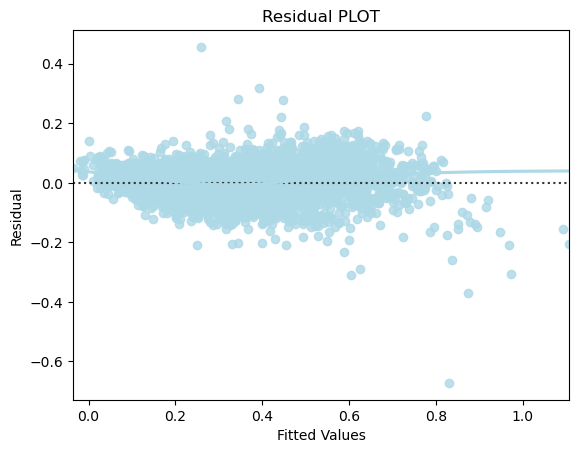

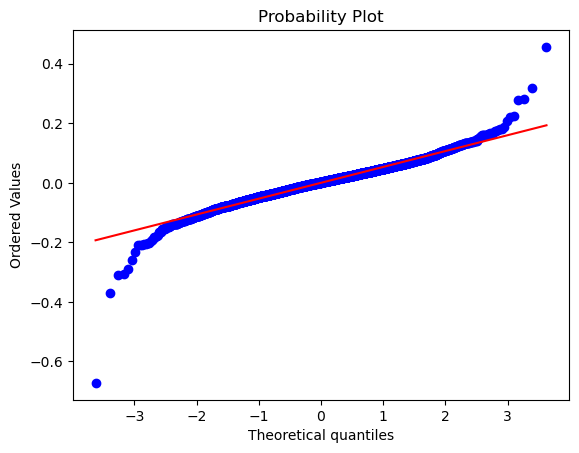

In [56]:
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.model.regression.linear.assumptions.CheckAllRegressionAssumptions import CheckAll4RegressionAssumptions

( 
    Load('dataprep-1.1.2-post-perf.pkl')
    >> CheckAll4RegressionAssumptions()
)

**Observations**:<br>
1. Residuals mean close to 0, so this first assumption holds
2. No heteroscedasticity: null hypotesis fail so this second assumption holds
3. Linearity of Variables : The error terms are ramdomly distributed around the x axis : this assumption does hold
4. Tests for Normality: we expect normality of error distribution and the previous graph demonstrates a good fit, so assumption 4 holds

All 4 linear regression assupmtions hold. 

Let'st try to improve the model with log transformed Kilometers_Driven.



#### **Linear Regression model #1.2**

###### Configuration
Let's create a better model with the following caracteristics :
* Price in logarithm
* Kilometers_Driven: remove some extreme outliers
* We drop 'S.No.', 'Name', 'New_price', Model features
* Kilometers_Driven log transform
* Feature engineering: Brand feature from Name


###### Feature engineering

In [57]:
#this code will create brand feature
from deepspace.transformers.Transformer import Transformer
#Specific to current projet
class FeatureEngineerBrandFromName(Transformer):
    '''Target Feature Engineering'''
    def __init__(self):
        Transformer.__init__(self)
    def transform(self, ds):
        df = ds.data
        dfm = df['Name'].str.split(pat = ' ', expand = True)
        df['Brand'] = dfm[0].str.upper()
        #df['Model'] = dfm[1].str.upper()
        return ds

###### Data Preparation

In [58]:
#here we adjust the columns that are useful for our analysis
from deepspace.transformers.column.categorical.Adjust import Adjust as CatAdjuster 
from deepspace.transformers.column.numerical.Adjust import Adjust as NumAdjuster 
#from deepspace.transformers.featureengineering.func.log.LogPlusN import LogPlusN
from deepspace.transformers.featureengineering.func.logXPlus1.forward.XY import LogXPlus1 
from deepspace.transformers.outliers.Check import CheckOutliers 
from deepspace.transformers.outliers.Process import ProcessOutliers 
from deepspace.transformers.null.Check import CheckNulls
from deepspace.transformers.null.Process import ProcessImputation
from deepspace.transformers.duplicates.CheckDuplicated import CheckDuplicated
from deepspace.transformers.duplicates.DropDuplicates import DropDuplicates
from deepspace.transformers.encode.X.BeforeSplit import EncoderBeforeSplit
from deepspace.transformers.separate.Separator import Separator
from deepspace.transformers.split.Splitter import Splitter
from deepspace.transformers.column.Target import Adjust as TargetAdjuster
from deepspace.transformers.column.Drop import Adjust as DropAdjuster
from deepspace.transformers.drop.DropCols import DropCols
from deepspace.transformers.scale.Scaler2 import Scaler2
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.file.pickle.Save import Save
from deepspace.transformers.file.Load import CSVLoader
from deepspace.transformers.chain.Milestone import Milestone
from deepspace.transformers.model.regression.linear.statsmodel.Model import OLS

file = r'used_cars.csv'
file = r'C:\Users\fdemb\Documents\Work\Projets\AI\MIT\Capstone Project\lib\used_cars.csv'

_ = ( 
        CSVLoader(file, ",")
        >> ProcessOutliers(num_cols=['Kilometers_Driven'], factor=100, method='median')
        >> CheckOutliers() 
        >> ProcessImputation(cat_cols=['Seats'], num_cols=['Mileage', 'Engine', 'Power']) 
        >> ProcessImputation(num_cols=['Price'], method='drop') 
        >> CheckNulls() 
        >> LogXPlus1('Price', 'Price_Log')  #+1 to avoid log(0) which is undefined
        >> LogXPlus1('Kilometers_Driven', 'Kilometers_Driven_Log') 
        >> FeatureEngineerBrandFromName() 
        >> CatAdjuster([   
                        'Brand',
                        'Location',
                        'Year',
                        'Fuel_Type',
                        'Transmission',
                        'Seats', #not continuous, but ordinal data
                        'Owner_Type'])
        >> NumAdjuster([
                        'Price_Log',
                        'Kilometers_Driven_Log',
                        'Mileage',
                        'Engine',
                        'Power'
                ])
        >> DropAdjuster(drop_cols=['S.No.', 'Name', 'New_price'])
        >> DropCols()
        >> CheckNulls() 
        >> CheckDuplicated()
        >> DropDuplicates()
        >> CheckDuplicated()        
        >> TargetAdjuster(target_col='Price_Log')
        >> EncoderBeforeSplit()
        >> Save('dataprep-1.2-before-separator.pkl')
        >> Scaler2(num_cols=['Kilometers_Driven_Log', 'Mileage', 'Engine', 'Power', 'Price_Log',
                        'Brand_AUDI', 'Brand_BENTLEY', 'Brand_BMW', 'Brand_CHEVROLET',
                        'Brand_DATSUN', 'Brand_FIAT', 'Brand_FORCE', 'Brand_FORD',
                        'Brand_HONDA', 'Brand_HYUNDAI', 'Brand_ISUZU', 'Brand_JAGUAR',
                        'Brand_JEEP', 'Brand_LAMBORGHINI', 'Brand_LAND', 'Brand_MAHINDRA',
                        'Brand_MARUTI', 'Brand_MERCEDES-BENZ', 'Brand_MINI', 'Brand_MITSUBISHI',
                        'Brand_NISSAN', 'Brand_PORSCHE', 'Brand_RENAULT', 'Brand_SKODA',
                        'Brand_SMART', 'Brand_TATA', 'Brand_TOYOTA', 'Brand_VOLKSWAGEN',
                        'Brand_VOLVO', 'Location_Bangalore', 'Location_Chennai',
                        'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
                        'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
                        'Location_Mumbai', 'Location_Pune', 'Year_1999', 'Year_2000',
                        'Year_2001', 'Year_2002', 'Year_2003', 'Year_2004', 'Year_2005',
                        'Year_2006', 'Year_2007', 'Year_2008', 'Year_2009', 'Year_2010',
                        'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015',
                        'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019', 'Fuel_Type_Diesel',
                        'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
                        'Transmission_Manual', 'Seats_4.0', 'Seats_5.0', 'Seats_6.0',
                        'Seats_7.0', 'Seats_8.0', 'Seats_9.0', 'Seats_10.0',
                        'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third']
               )
        >> Separator()
        >> Splitter()
        >> Save('dataprep-1.2-after-split.pkl')
)

averaging outliers 1 rows for Kilometers_Driven
Feature *Year*: found 58 lower_bound outliers
Feature *Kilometers_Driven*: found 257 upper_bound rows outliers
Feature *Mileage*: found 81 lower_bound outliers
Feature *Mileage*: found 18 upper_bound rows outliers
Feature *Engine*: found 65 upper_bound rows outliers
Feature *Power*: found 273 upper_bound rows outliers
Feature *Seats*: found 137 lower_bound outliers
Feature *Seats*: found 1015 upper_bound rows outliers
Feature *New_price*: found 108 upper_bound rows outliers
Feature *Price*: found 718 upper_bound rows outliers


num cols to impute
['Mileage', 'Engine', 'Power']
cat cols to impute
['Seats']
df cols
Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_price', 'Price'],
      dtype='object')


impute_nulls : removing 1234 rows for Price


cols to drop S.No.,Name,New_price
remaining cols to drop cols S.No.,Name,New_price
remaining cols Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_Log,Kilometers_Driven_Log,Brand


Duplicates found : 2
Duplicates found : 0
-> considering cat cols = Brand, Location, Year, Fuel_Type, Transmission, Seats, Owner_Type
Index(['Price_Log', 'Kilometers_Driven_Log', 'Mileage', 'Engine', 'Power',
       'Brand_AUDI', 'Brand_BENTLEY', 'Brand_BMW', 'Brand_CHEVROLET',
       'Brand_DATSUN', 'Brand_FIAT', 'Brand_FORCE', 'Brand_FORD',
       'Brand_HONDA', 'Brand_HYUNDAI', 'Brand_ISUZU', 'Brand_JAGUAR',
       'Brand_JEEP', 'Brand_LAMBORGHINI', 'Brand_LAND', 'Brand_MAHINDRA',
       'Brand_MARUTI', 'Brand_MERCEDES-BENZ', 'Brand_MINI', 'Brand_MITSUBISHI',
       'Brand_NISSAN', 'Brand_PORSCHE', 'Brand_RENAULT', 'Brand_SKODA',
       'Brand_SMART', 'Brand_TATA', 'Brand_TOYOTA', 'Brand_VOLKSWAGEN',
       'Brand_VOLVO', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Year_1999', 'Year_2000',
       'Year_2001', 

###### Modeling

In [59]:
(
    Load('dataprep-1.2-after-split.pkl')
    >> OLS()
    >> Save('dataprep-1.2-after-model.pkl')
)

Trying to load from dataprep-1.2-after-split.pkl...
Loading from dataprep-1.2-after-split.pkl
Trying to save to dataprep-1.2-after-model.pkl...
Saving to dataprep-1.2-after-model.pkl


###### Performance checking (as is)

In [60]:
from deepspace.transformers.model.regression.linear.statsmodel.performance.CalcNView import CalcNView as Performance
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.file.pickle.Save import Save

_ = (
    Load('dataprep-1.2-after-model.pkl')
    >> Performance('dataprep-1.2', saveto='userd-cars-price--performance-store.pkl', kind='synthetic')
    >> Save('dataprep-1.2-after-perf.pkl')
)

Trying to load from dataprep-1.2-after-model.pkl...
Loading from dataprep-1.2-after-model.pkl


Trying to save to userd-cars-price--performance-store.pkl...
Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl
Saving to userd-cars-price--performance-store.pkl
Trying to save to dataprep-1.2-after-perf.pkl...
Saving to dataprep-1.2-after-perf.pkl


###### Observations

**Observations:**<br/>
This model is very good. We have a R-squared that is close to 1without overfitting and comparable for train and test data. Also RMSE is quite low.<br>

Let's see basic model assumptions if they hold.

###### Performance calculation (inverted)

In [61]:
from deepspace.transformers.chain.Milestone import Milestone
from deepspace.transformers.Transformer import Transformer
from deepspace.transformers.file.pickle.Load import Load

from deepspace.transformers.separate.inverse.train.X import InverseSeparator as XInverseSeparator_Train
from deepspace.transformers.separate.inverse.train.Y import InverseSeparator as YInverseSeparator_Train
from deepspace.transformers.separate.inverse.test.X import InverseSeparator as XInverseSeparator_Test
from deepspace.transformers.separate.inverse.test.Y import InverseSeparator as YInverseSeparator_Test

from deepspace.transformers.scale.inverse.train.X import XInverseScaler2 as XInverseScaler2_Train
from deepspace.transformers.scale.inverse.train.Y import YInverseScaler2 as YInverseScaler2_Train
from deepspace.transformers.scale.inverse.test.X import XInverseScaler2 as XInverseScaler2_Test
from deepspace.transformers.scale.inverse.test.Y import YInverseScaler2 as YInverseScaler2_Test

from deepspace.transformers.featureengineering.func.logXPlus1.backward.train.X import InvLogXPlus1 as XInvLogXPlus1_Train
from deepspace.transformers.featureengineering.func.logXPlus1.backward.train.Y import InvLogXPlus1 as YInvLogXPlus1_Train
from deepspace.transformers.featureengineering.func.logXPlus1.backward.test.X import InvLogXPlus1 as XInvLogXPlus1_Test
from deepspace.transformers.featureengineering.func.logXPlus1.backward.test.Y import InvLogXPlus1 as YInvLogXPlus1_Test

from deepspace.transformers.model.regression.linear.statsmodel.performance.inverse.train.Calc import Calc as InversePerfCalc_Train
from deepspace.transformers.model.regression.linear.statsmodel.performance.inverse.test.Calc import Calc as InversePerfCalc_Test

from deepspace.transformers.column.Target import Adjust as TargetAdjuster

class TrainInvertedPerformance(Transformer):
    def transform(self, ds):
        _ = Milestone(ds)
        _ = (_
            >> XInverseSeparator_Train('Price_Log')
            >> YInverseSeparator_Train('Price_Log')
            >> XInverseScaler2_Train()
            >> YInverseScaler2_Train()
            >> XInvLogXPlus1_Train('Price', 'Price_Log')
            >> YInvLogXPlus1_Train('Price', 'Price_Log')
            >> TargetAdjuster(target_col='Price')
            #>> InversePerfCalc_Train('Price')
        )
        return _.ds
class TestInvertedPerformance(Transformer):
    def transform(self, ds):
        _ = Milestone(ds)
        _ = (_
            >> XInverseSeparator_Test('Price_Log')
            >> YInverseSeparator_Test('Price_Log')
            >> XInverseScaler2_Test()
            >> YInverseScaler2_Test()
            >> XInvLogXPlus1_Test('Price', 'Price_Log')
            >> YInvLogXPlus1_Test('Price', 'Price_Log')
            >> TargetAdjuster(target_col='Price')
            #>> InversePerfCalc_Test('Price')
        )
        return _.ds

from deepspace.transformers.model.regression.linear.statsmodel.performance.inverse.Calc import Calc as InversePerfCalc
_ = ( 
    Load('dataprep-1.2-after-perf.pkl')
	>> TrainInvertedPerformance()
	>> TestInvertedPerformance()
    >> InversePerfCalc('Price', identifier='dataprep-1.2--reverse', saveto='userd-cars-price--performance-store.pkl', kind='naturalized')
)

Trying to load from dataprep-1.2-after-perf.pkl...
Loading from dataprep-1.2-after-perf.pkl


Trying to save to userd-cars-price--performance-store.pkl...
Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl
Saving to userd-cars-price--performance-store.pkl


In [62]:
from deepspace.transformers.chain.Milestone import Milestone
from deepspace.transformers.project.performance.StorageViewer import Performance as ViewStoredProjectPerformance

(ViewStoredProjectPerformance('userd-cars-price--performance-store.pkl') >> Milestone())

Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl


###### Assumptions checking

Trying to load from dataprep-1.2-after-perf.pkl...
Loading from dataprep-1.2-after-perf.pkl
residuals mean close to 0: assumption #1 holds (2.0624820502344585e-15)
No heteroscedasticity: null hypotesis fail hence assumption #2 holds (1.8444462361976536e-10)


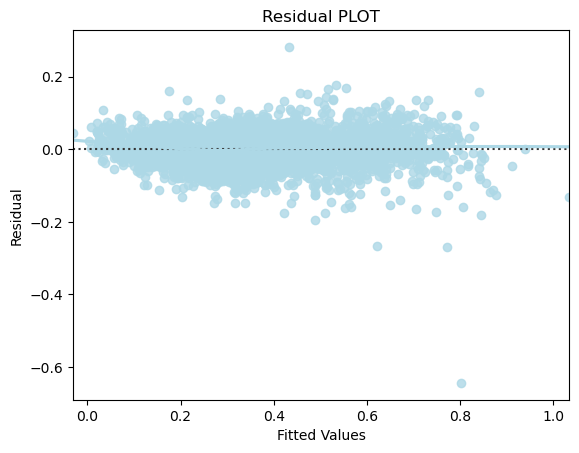

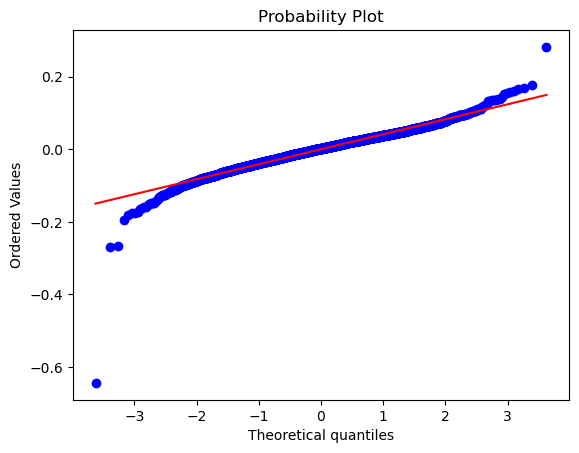

In [63]:
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.model.regression.linear.assumptions.CheckAllRegressionAssumptions import CheckAll4RegressionAssumptions

( 
    Load('dataprep-1.2-after-perf.pkl')
    >> CheckAll4RegressionAssumptions()
)

**Observations**:<br>
1. Residuals mean close to 0, so this first assumption holds
2. No heteroscedasticity: null hypotesis fail so this second assumption holds
3. Linearity of Variables : The error terms are ramdoly distributed around the x axis : this assumption does hold
4. Tests for Normality: we expect normality of error distribution and the previous graph demonstrates a good fit, so assumption 4 holds


Let's see a summary of the model.

In [64]:
from deepspace.transformers.model.regression.linear.statsmodel.Summary import Summary
( 
    Load('dataprep-1.2-after-perf.pkl')
    >> Summary()
)

Trying to load from dataprep-1.2-after-perf.pkl...
Loading from dataprep-1.2-after-perf.pkl
                            OLS Regression Results                            
Dep. Variable:              Price_Log   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     806.2
Date:                Sat, 18 May 2024   Prob (F-statistic):               0.00
Time:                        13:23:37   Log-Likelihood:                 8396.4
No. Observations:                4813   AIC:                        -1.663e+04
Df Residuals:                    4734   BIC:                        -1.612e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------

**Observation:**<br>
If we set pvalue threshold at 0.05, we observe some pvlaues above.
By looking at the coefficienys some of them are very low (Engine for instance).

We can simplify the model with removing multicolinearity and non significant featrues.


#### **Linear Regression model #1.3**

##### Prepared data
Let's create a better model with the following caracteristics :
* Price in logarithm
* Kilometers_Driven: remove some extreme outliers
* We drop 'S.No.', 'Name', 'New_price' features
* Kilometers_Driven log transform
* Feature engineering: Model feature from Name
* Remove multicolinearity
* Remove non significant features


In [65]:
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.file.pickle.Save import Save
from deepspace.transformers.multicolinearity.OLS.RemoveMulticolinearity import RemoveMulticolinearity2

(
    Load('dataprep-1.2-after-split.pkl')
    >> RemoveMulticolinearity2()
    >> Save('dataprep-1.3-after-remove-multicolinearity.pkl')
)

Trying to load from dataprep-1.2-after-split.pkl...
Loading from dataprep-1.2-after-split.pkl
Processing Seats_5.0(vif = 385.56663954722353)...
Processing Seats_5.0 because of valmax 385.56663954722353
Rejecting  categorical feature Seats_5.0
Processing Brand_MARUTI(vif = 345.5336840709896)...
Processing Brand_MARUTI because of valmax 345.5336840709896
Rejecting  categorical feature Brand_MARUTI
Processing Brand_HYUNDAI(vif = 311.14183066110803)...
Processing Brand_HYUNDAI because of valmax 311.14183066110803
Rejecting  categorical feature Brand_HYUNDAI
Processing Brand_HONDA(vif = 178.37855558025507)...
Processing Brand_HONDA because of valmax 178.37855558025507
Rejecting  categorical feature Brand_HONDA
Processing Year_2014(vif = 169.43420846206013)...
Processing Year_2014 because of valmax 169.43420846206013
Rejecting  categorical feature Year_2014
Processing Year_2015(vif = 159.53553970031365)...
Processing Year_2015 because of valmax 159.53553970031365
Rejecting  categorical featu

In [66]:
##################################################
# probably unuseful cosdrop has already been done
##################################################
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.file.pickle.Save import Save
from deepspace.transformers.multicolinearity.OLS.RemoveMulticolinearity import RemoveMulticolinearity
from deepspace.transformers.drop.DropColsXYXY import DropColsXYXY

(
    Load('dataprep-1.3-after-remove-multicolinearity.pkl')
    >> DropColsXYXY()
    >> Save('dataprep-1.3-after-remmultico-dropcols.pkl')
)

Trying to load from dataprep-1.3-after-remove-multicolinearity.pkl...
Loading from dataprep-1.3-after-remove-multicolinearity.pkl
cols to drop S.No.,Kilometers_Driven_Log,Mileage,New_price,Name,Power,Engine
remaining cols to drop cols 
remaining cols Brand_AUDI,Brand_BENTLEY,Brand_BMW,Brand_CHEVROLET,Brand_DATSUN,Brand_FIAT,Brand_FORCE,Brand_FORD,Brand_HONDA,Brand_HYUNDAI,Brand_ISUZU,Brand_JAGUAR,Brand_JEEP,Brand_LAMBORGHINI,Brand_LAND,Brand_MAHINDRA,Brand_MARUTI,Brand_MERCEDES-BENZ,Brand_MINI,Brand_MITSUBISHI,Brand_NISSAN,Brand_PORSCHE,Brand_RENAULT,Brand_SKODA,Brand_SMART,Brand_TATA,Brand_TOYOTA,Brand_VOLKSWAGEN,Brand_VOLVO,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_10.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0

**Observation**<br>
Ou multicolineratrity algorithm has detected and removed 4 columns: Kilometers_Driven_Log, Engine, and Power.<br>
And we observe that Kilometers_Driven_Log is colinear to other variables. But this has already been identified with the help of correlation matrix. However now we know that this relation is strong enough to be removed.

We can now prepare a new set of data with these features removed, then we would create a new model.

###### Running model

In [67]:
from deepspace.transformers.model.regression.linear.statsmodel.Model import OLS
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.file.pickle.Save import Save

(
    Load('dataprep-1.3-after-remmultico-dropcols.pkl')
    >> OLS()
    >> Save('dataprep-1.3-after-model.pkl')
)

Trying to load from dataprep-1.3-after-remmultico-dropcols.pkl...
Loading from dataprep-1.3-after-remmultico-dropcols.pkl
Trying to save to dataprep-1.3-after-model.pkl...
Saving to dataprep-1.3-after-model.pkl


##### Performance checking (as is)

In [68]:
from deepspace.transformers.model.regression.linear.statsmodel.performance.CalcNView import CalcNView as Performance
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.file.pickle.Save import Save

_ = (
    Load('dataprep-1.3-after-model.pkl')
    >> Performance('dataprep-1.3-rmc', saveto='userd-cars-price--performance-store.pkl', kind='synthetic')
    >> Save('dataprep-1.3-after-perf.pkl')
)

Trying to load from dataprep-1.3-after-model.pkl...
Loading from dataprep-1.3-after-model.pkl


Trying to save to userd-cars-price--performance-store.pkl...
Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl
Saving to userd-cars-price--performance-store.pkl
Trying to save to dataprep-1.3-after-perf.pkl...
Saving to dataprep-1.3-after-perf.pkl


**Observations:**<br/>
This model is still very good. We have a lower R-squared but this one is still close to 1 whthout overfitting, and comparable for train and test data. <br>
Also RMSE is quite low and comparable.<br>

Considering the equation below, we think the model is still too complex. For that we will try to remove non significant features.

In [69]:
from deepspace.transformers.model.regression.linear.statsmodel.Summary import Summary
( 
    Load('dataprep-1.3-after-perf.pkl')
    >> Summary()
)

Trying to load from dataprep-1.3-after-perf.pkl...
Loading from dataprep-1.3-after-perf.pkl
                            OLS Regression Results                            
Dep. Variable:              Price_Log   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     474.7
Date:                Sat, 18 May 2024   Prob (F-statistic):               0.00
Time:                        13:35:08   Log-Likelihood:                 7122.6
No. Observations:                4813   AIC:                        -1.410e+04
Df Residuals:                    4738   BIC:                        -1.361e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------

Let's try to identify and remove some non significant features.

In [70]:
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.file.pickle.Save import Save
from deepspace.transformers.nonsignificance.Process import RemoveNonSignificantFeatures2
( 
    Load('dataprep-1.3-after-perf.pkl')
    >> RemoveNonSignificantFeatures2()
    >> Save('dataprep-1.3-after-remnonsigfeat.pkl')
)

Trying to load from dataprep-1.3-after-perf.pkl...
Loading from dataprep-1.3-after-perf.pkl
Removing Brand_BENTLEY beccause of coef greater than threshhold (0.29761172840266675)
Removing Brand_BENTLEY
Removing Brand_CHEVROLET beccause of coef greater than threshhold (0.5177040463160618)
Removing Brand_CHEVROLET
Removing Brand_DATSUN beccause of coef greater than threshhold (0.0531624254148918)
Removing Brand_DATSUN
Removing Brand_FIAT beccause of coef greater than threshhold (0.6914171600940624)
Removing Brand_FIAT
Removing Brand_FORCE beccause of coef greater than threshhold (0.7257293088805568)
Removing Brand_FORCE
Removing Brand_FORD beccause of coef greater than threshhold (0.7967524072291836)
Removing Brand_FORD
Removing Brand_HONDA beccause of coef greater than threshhold (0.45795242005677284)
Removing Brand_HONDA
Removing Brand_HYUNDAI beccause of coef greater than threshhold (0.734759266193366)
Removing Brand_HYUNDAI
Removing Brand_ISUZU beccause of coef greater than threshhold

**Note**<br>
The code above allows us to identify and remove some non significant features. Here's the list : Year_1999, Year_2001, Year_2002, Location_Chennai, Location_Kochi, Location_Mumbai, Fuel_Type_LPG, Owner_Type_Fourth & Above, Brand_CHEVROLET, Brand_DATSUN, Brand_FIAT, Brand_FORCE, Brand_FORD, Brand_HONDA, Brand_HYUNDAI, Brand_ISUZU, Brand_MAHINDRA, Brand_MARUTI, Brand_NISSAN, Brand_RENAULT, Brand_SKODA, Brand_TATA, Brand_TOYOTA, Brand_VOLKSWAGEN.

We now run an new model after removing these variables.

##### Modeling

In [71]:
from deepspace.transformers.model.regression.linear.statsmodel.Model import OLS
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.file.pickle.Save import Save


(
    Load('dataprep-1.3-after-remnonsigfeat.pkl')
    >> OLS()
    >> Save('dataprep-1.3-final-after-model.pkl')
)

Trying to load from dataprep-1.3-after-remnonsigfeat.pkl...
Loading from dataprep-1.3-after-remnonsigfeat.pkl
Trying to save to dataprep-1.3-final-after-model.pkl...
Saving to dataprep-1.3-final-after-model.pkl


##### Performance checking (as is)

In [72]:
from deepspace.transformers.model.regression.linear.statsmodel.performance.CalcNView import CalcNView as Performance
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.file.pickle.Save import Save

_ = (
    Load('dataprep-1.3-final-after-model.pkl')
    >> Performance('dataprep-1.3-rmc-rnsf', saveto='userd-cars-price--performance-store.pkl', kind='synthetic')
    >> Save('dataprep-1.3-final-after-perf.pkl')
)

Trying to load from dataprep-1.3-final-after-model.pkl...
Loading from dataprep-1.3-final-after-model.pkl


Trying to save to userd-cars-price--performance-store.pkl...
Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl
Saving to userd-cars-price--performance-store.pkl
Trying to save to dataprep-1.3-final-after-perf.pkl...
Saving to dataprep-1.3-final-after-perf.pkl


This model is not so bad. R-squared	Adj. and R-squared are close to each other and close to 1 but not so close - no overfitting. RMSE is sufficiently low.

##### Performance Calculation (reversed)

In [73]:
from deepspace.transformers.chain.Milestone import Milestone
from deepspace.transformers.Transformer import Transformer
from deepspace.transformers.file.pickle.Load import Load

from deepspace.transformers.separate.inverse.train.X import InverseSeparator as XInverseSeparator_Train
from deepspace.transformers.separate.inverse.train.Y import InverseSeparator as YInverseSeparator_Train
from deepspace.transformers.separate.inverse.test.X import InverseSeparator as XInverseSeparator_Test
from deepspace.transformers.separate.inverse.test.Y import InverseSeparator as YInverseSeparator_Test

from deepspace.transformers.scale.inverse.train.X import XInverseScaler2 as XInverseScaler2_Train
from deepspace.transformers.scale.inverse.train.Y import YInverseScaler2 as YInverseScaler2_Train
from deepspace.transformers.scale.inverse.test.X import XInverseScaler2 as XInverseScaler2_Test
from deepspace.transformers.scale.inverse.test.Y import YInverseScaler2 as YInverseScaler2_Test

from deepspace.transformers.featureengineering.func.logXPlus1.backward.train.X import InvLogXPlus1 as XInvLogXPlus1_Train
from deepspace.transformers.featureengineering.func.logXPlus1.backward.train.Y import InvLogXPlus1 as YInvLogXPlus1_Train
from deepspace.transformers.featureengineering.func.logXPlus1.backward.test.X import InvLogXPlus1 as XInvLogXPlus1_Test
from deepspace.transformers.featureengineering.func.logXPlus1.backward.test.Y import InvLogXPlus1 as YInvLogXPlus1_Test

from deepspace.transformers.model.regression.linear.statsmodel.performance.inverse.train.Calc import Calc as InversePerfCalc_Train
from deepspace.transformers.model.regression.linear.statsmodel.performance.inverse.test.Calc import Calc as InversePerfCalc_Test

from deepspace.transformers.multicolinearity.OLS.inverse.train.X import XInverseRmc as XInverseRmc_Train
from deepspace.transformers.multicolinearity.OLS.inverse.test.X import XInverseRmc as XInverseRmc_Test
from deepspace.transformers.nonsignificance.inverse.train.X import XInverseRnsf as XInverseRnsf_Train
from deepspace.transformers.nonsignificance.inverse.test.X import XInverseRnsf as XInverseRnsf_Test

from deepspace.transformers.column.Target import Adjust as TargetAdjuster

class TrainInvertedPerformance(Transformer):
    def transform(self, ds):
        _ = ( Milestone(ds)
            >> XInverseRnsf_Train()
            >> XInverseRmc_Train()
            >> XInverseSeparator_Train('Price_Log')
            >> YInverseSeparator_Train('Price_Log')
            >> XInverseScaler2_Train()
            >> YInverseScaler2_Train()
            >> XInvLogXPlus1_Train('Price', 'Price_Log')
            >> YInvLogXPlus1_Train('Price', 'Price_Log')
            >> TargetAdjuster(target_col='Price')
            #>> InversePerfCalc_Train('Price')
        )
        return _.ds
class TestInvertedPerformance(Transformer):
    def transform(self, ds):
        _ = ( Milestone(ds)
            >> XInverseRnsf_Test()
            >> XInverseRmc_Test()
            >> XInverseSeparator_Test('Price_Log')
            >> YInverseSeparator_Test('Price_Log')
            >> XInverseScaler2_Test()
            >> YInverseScaler2_Test()
            >> XInvLogXPlus1_Test('Price', 'Price_Log')
            >> YInvLogXPlus1_Test('Price', 'Price_Log')
            >> TargetAdjuster(target_col='Price')
            #>> InversePerfCalc_Test('Price')
        )
        return _.ds

from deepspace.transformers.model.regression.linear.statsmodel.performance.inverse.Calc import Calc as InversePerfCalc
_ = ( 
    Load('dataprep-1.3-final-after-perf.pkl')
	>> TrainInvertedPerformance()
	>> TestInvertedPerformance()
    >> InversePerfCalc('Price', identifier='dataprep-1.3--reverse', saveto='userd-cars-price--performance-store.pkl', kind='naturalized')
)

Trying to load from dataprep-1.3-final-after-perf.pkl...
Loading from dataprep-1.3-final-after-perf.pkl


Trying to save to userd-cars-price--performance-store.pkl...
Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl
Saving to userd-cars-price--performance-store.pkl


In [74]:
from deepspace.transformers.chain.Milestone import Milestone
#from deepspace.transformers.project.performance.StorageViewer import Performance as ViewStoredProjectPerformance

(ViewStoredProjectPerformance('userd-cars-price--performance-store.pkl', kinds=['natural', 'naturalized']) >> Milestone())

Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl


##### Equation

Here's the linear equation of the model:

In [75]:
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.file.pickle.Save import Save

from deepspace.transformers.model.regression.linear.statsmodel.Equation import LogModelEquation
_ = (
    Load('dataprep-1.3-final-after-perf.pkl')
    >> LogModelEquation('Price_Log')
)


Trying to load from dataprep-1.3-final-after-perf.pkl...
Loading from dataprep-1.3-final-after-perf.pkl
log(Price_Log) = (0.5261001620783783) * Brand_LAMBORGHINI
	+ (0.3436804003081547) * Brand_PORSCHE
	+ (0.28636855462412536) * Year_2018
	+ (0.28439104253949526) * Year_2019
	+ (0.2817166202229486) * Brand_JAGUAR
	+ (0.2709646581173561) * Brand_LAND
	+ (0.25714159703033074) * Year_2017
	+ (0.2555359301562955) * const
	+ (0.23883949912521274) * Brand_MINI
	+ (0.23616065658370505) * Year_2016
	+ (0.21903272454442166) * Year_2015
	+ (0.21832091059492603) * Brand_MERCEDES-BENZ
	+ (0.21362392002955838) * Brand_BMW
	+ (0.1973643917196158) * Year_2014
	+ (0.1959328759648189) * Brand_AUDI
	+ (-0.1939604869465252) * Brand_SMART
	+ (0.18359666787135134) * Fuel_Type_Electric
	+ (0.17437420479382665) * Year_2013
	+ (0.16624116090575536) * Brand_JEEP
	+ (0.1604542975376717) * Brand_VOLVO
	+ (-0.15695591644882786) * Seats_4.0
	+ (0.15354388875029534) * Year_2012
	+ (-0.14558981315994013) * Seats_5.0

We can conclude with that last stable linear model that the logarithm of the price dependant mainly:
* firstly and positively on model and in particular on the "luxuryness" of the car (Bentley, Lamborgini, BMW, etc),
* the year of the car,
* on the importance if the locations in the country (for instance positively on Bangalore but negatively Jaipur)
* the type of petrol : diesel cars are, all things equal otherwise, more expensive than electric cars, which also are more expensive than petrol cars

We can try another trick which could help use get a better R-squared : use the age in place of the year.
We prepare a model below.


#### **Linear Regression model #1.4**

##### Feature Engineering

In [76]:
#creates Age from Year
import datetime as dt
import pandas as pd
from deepspace.transformers.Transformer import Transformer

class FeatureEngineerAgeFromYear(Transformer):
    '''Target Feature Engineering'''
    def __init__(self):
        Transformer.__init__(self)
    def transform(self, ds):
        df = ds.data
        maxY = str(df['Year'].max())
        #print(maxY)
        dfDDMMYYYY = '01'+'-01-'+df['Year'].astype(str)
        df['Age']  = dt.datetime.strptime(maxY, "%Y")-pd.to_datetime(dfDDMMYYYY, dayfirst=True)
        df['Age'] = df['Age'].dt.days
        return 

In [77]:
#this code will create brand feature
from deepspace.transformers.Transformer import Transformer
#Specific to current projet
class FeatureEngineerBrandFromName(Transformer):
    '''Target Feature Engineering'''
    def __init__(self):
        Transformer.__init__(self)
    def transform(self, ds):
        df = ds.data
        dfm = df['Name'].str.split(pat = ' ', expand = True)
        df['Brand'] = dfm[0].str.upper()
        #df['Model'] = dfm[1].str.upper()
        return ds

##### Data preprocessing

In [78]:
#here we adjust the columns that are useful for our analysis
from deepspace.transformers.column.categorical.Adjust import Adjust as CatAdjuster 
from deepspace.transformers.column.numerical.Adjust import Adjust as NumAdjuster 
#from deepspace.transformers.featureengineering.func.log.LogPlusN import LogPlusN
from deepspace.transformers.featureengineering.func.logXPlus1.forward.XY import LogXPlus1 
from deepspace.transformers.outliers.Check import CheckOutliers 
from deepspace.transformers.outliers.Process import ProcessOutliers 
from deepspace.transformers.null.Check import CheckNulls
from deepspace.transformers.null.Process import ProcessImputation
from deepspace.transformers.duplicates.CheckDuplicated import CheckDuplicated
from deepspace.transformers.duplicates.DropDuplicates import DropDuplicates
from deepspace.transformers.encode.X.BeforeSplit import EncoderBeforeSplit
from deepspace.transformers.separate.Separator import Separator
from deepspace.transformers.split.Splitter import Splitter
from deepspace.transformers.column.Target import Adjust as TargetAdjuster
from deepspace.transformers.column.Drop import Adjust as DropAdjuster
from deepspace.transformers.drop.DropCols import DropCols
from deepspace.transformers.scale.Scaler2 import Scaler2
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.file.pickle.Save import Save
from deepspace.transformers.file.Load import CSVLoader
from deepspace.transformers.chain.Milestone import Milestone

file = r'used_cars.csv'
file = r'C:\Users\fdemb\Documents\Work\Projets\AI\MIT\Capstone Project\lib\used_cars.csv'

_ = ( 
        CSVLoader(file, ",")
        >> ProcessOutliers(num_cols=['Kilometers_Driven'], factor=100, method='median')
        >> CheckOutliers() 
        >> ProcessImputation(cat_cols=['Seats'], num_cols=['Mileage', 'Engine', 'Power']) 
        >> ProcessImputation(num_cols=['Price'], method='drop') 
        >> CheckNulls() 
        >> LogXPlus1('Price', 'Price_Log')  #+1 to avoid log(0) which is undefined
        >> LogXPlus1('Kilometers_Driven', 'Kilometers_Driven_Log') 
        >> FeatureEngineerBrandFromName() 
        >> FeatureEngineerAgeFromYear()
        >> CatAdjuster([   
                        'Brand',
                        'Location',
                        'Year',
                        'Fuel_Type',
                        'Transmission',
                        'Seats', #not continuous, but ordinal data
                        'Owner_Type'])
        >> NumAdjuster([
                        'Price_Log',
                        'Kilometers_Driven_Log',
                        'Age',
                        'Mileage',
                        'Engine',
                        'Power'
                ])
        >> DropAdjuster(drop_cols=['S.No.', 'Year', 'Name', 'New_price'])
        >> DropCols()
        >> CheckNulls() 
        >> CheckDuplicated()
        >> DropDuplicates()
        >> CheckDuplicated()        
        >> TargetAdjuster(target_col='Price_Log')
        >> EncoderBeforeSplit()
        >> Save('dataprep-1.4-before-separator.pkl')
        >> Scaler2(num_cols=['Age', 'Kilometers_Driven_Log', 'Mileage', 'Engine', 'Power', 'Price_Log',
                        'Brand_AUDI', 'Brand_BENTLEY', 'Brand_BMW', 'Brand_CHEVROLET',
                        'Brand_DATSUN', 'Brand_FIAT', 'Brand_FORCE', 'Brand_FORD',
                        'Brand_HONDA', 'Brand_HYUNDAI', 'Brand_ISUZU', 'Brand_JAGUAR',
                        'Brand_JEEP', 'Brand_LAMBORGHINI', 'Brand_LAND', 'Brand_MAHINDRA',
                        'Brand_MARUTI', 'Brand_MERCEDES-BENZ', 'Brand_MINI', 'Brand_MITSUBISHI',
                        'Brand_NISSAN', 'Brand_PORSCHE', 'Brand_RENAULT', 'Brand_SKODA',
                        'Brand_SMART', 'Brand_TATA', 'Brand_TOYOTA', 'Brand_VOLKSWAGEN',
                        'Brand_VOLVO', 'Location_Bangalore', 'Location_Chennai',
                        'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
                        'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
                        'Location_Mumbai', 'Location_Pune', 'Year_1999', 'Year_2000',
                        'Year_2001', 'Year_2002', 'Year_2003', 'Year_2004', 'Year_2005',
                        'Year_2006', 'Year_2007', 'Year_2008', 'Year_2009', 'Year_2010',
                        'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015',
                        'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019', 'Fuel_Type_Diesel',
                        'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
                        'Transmission_Manual', 'Seats_4.0', 'Seats_5.0', 'Seats_6.0',
                        'Seats_7.0', 'Seats_8.0', 'Seats_9.0', 'Seats_10.0',
                        'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third']
                        )
        >> Separator()
        >> Splitter()
        >> Save('dataprep-1.4-after-split.pkl')
)

averaging outliers 1 rows for Kilometers_Driven
Feature *Year*: found 58 lower_bound outliers
Feature *Kilometers_Driven*: found 257 upper_bound rows outliers
Feature *Mileage*: found 81 lower_bound outliers
Feature *Mileage*: found 18 upper_bound rows outliers
Feature *Engine*: found 65 upper_bound rows outliers
Feature *Power*: found 273 upper_bound rows outliers
Feature *Seats*: found 137 lower_bound outliers
Feature *Seats*: found 1015 upper_bound rows outliers
Feature *New_price*: found 108 upper_bound rows outliers
Feature *Price*: found 718 upper_bound rows outliers


num cols to impute
['Mileage', 'Engine', 'Power']
cat cols to impute
['Seats']
df cols
Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_price', 'Price'],
      dtype='object')


impute_nulls : removing 1234 rows for Price


cols to drop S.No.,Year,Name,New_price
remaining cols to drop cols S.No.,Year,Name,New_price
remaining cols Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_Log,Kilometers_Driven_Log,Brand,Age


Duplicates found : 2
Duplicates found : 0
-> considering cat cols = Brand, Location, Fuel_Type, Transmission, Seats, Owner_Type
Index(['Price_Log', 'Kilometers_Driven_Log', 'Age', 'Mileage', 'Engine',
       'Power', 'Brand_AUDI', 'Brand_BENTLEY', 'Brand_BMW', 'Brand_CHEVROLET',
       'Brand_DATSUN', 'Brand_FIAT', 'Brand_FORCE', 'Brand_FORD',
       'Brand_HONDA', 'Brand_HYUNDAI', 'Brand_ISUZU', 'Brand_JAGUAR',
       'Brand_JEEP', 'Brand_LAMBORGHINI', 'Brand_LAND', 'Brand_MAHINDRA',
       'Brand_MARUTI', 'Brand_MERCEDES-BENZ', 'Brand_MINI', 'Brand_MITSUBISHI',
       'Brand_NISSAN', 'Brand_PORSCHE', 'Brand_RENAULT', 'Brand_SKODA',
       'Brand_SMART', 'Brand_TATA', 'Brand_TOYOTA', 'Brand_VOLKSWAGEN',
       'Brand_VOLVO', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel',
       'Fuel_Type_Electri

##### Running the model

In [79]:
from deepspace.transformers.model.regression.linear.statsmodel.Model import OLS
(
    Load('dataprep-1.4-after-split.pkl')
    >> OLS()
    >> Save('dataprep-1.4-after-model.pkl')
)

Trying to load from dataprep-1.4-after-split.pkl...
Loading from dataprep-1.4-after-split.pkl
Trying to save to dataprep-1.4-after-model.pkl...
Saving to dataprep-1.4-after-model.pkl


##### Performance calculation (as is)

In [80]:
from deepspace.transformers.model.regression.linear.statsmodel.performance.CalcNView import CalcNView as Performance
_ = (
    Load('dataprep-1.4-after-model.pkl')
    >> Performance('dataprep-1.4', saveto='userd-cars-price--performance-store.pkl', kind='synthetic')
    >> Save('dataprep-1.4-after-perf.pkl')
)

Trying to load from dataprep-1.4-after-model.pkl...
Loading from dataprep-1.4-after-model.pkl


Trying to save to userd-cars-price--performance-store.pkl...
Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl
Saving to userd-cars-price--performance-store.pkl
Trying to save to dataprep-1.4-after-perf.pkl...
Saving to dataprep-1.4-after-perf.pkl


This model is better than the previous. R-squared Adj. and R-squared are close to each other and close to 1. RMSE is sufficiently low.

##### Performance calculation (reverted)

In [81]:
from deepspace.transformers.chain.Milestone import Milestone
from deepspace.transformers.Transformer import Transformer
from deepspace.transformers.file.pickle.Load import Load

from deepspace.transformers.separate.inverse.train.X import InverseSeparator as XInverseSeparator_Train
from deepspace.transformers.separate.inverse.train.Y import InverseSeparator as YInverseSeparator_Train
from deepspace.transformers.separate.inverse.test.X import InverseSeparator as XInverseSeparator_Test
from deepspace.transformers.separate.inverse.test.Y import InverseSeparator as YInverseSeparator_Test

from deepspace.transformers.scale.inverse.train.X import XInverseScaler2 as XInverseScaler2_Train
from deepspace.transformers.scale.inverse.train.Y import YInverseScaler2 as YInverseScaler2_Train
from deepspace.transformers.scale.inverse.test.X import XInverseScaler2 as XInverseScaler2_Test
from deepspace.transformers.scale.inverse.test.Y import YInverseScaler2 as YInverseScaler2_Test

from deepspace.transformers.featureengineering.func.logXPlus1.backward.train.X import InvLogXPlus1 as XInvLogXPlus1_Train
from deepspace.transformers.featureengineering.func.logXPlus1.backward.train.Y import InvLogXPlus1 as YInvLogXPlus1_Train
from deepspace.transformers.featureengineering.func.logXPlus1.backward.test.X import InvLogXPlus1 as XInvLogXPlus1_Test
from deepspace.transformers.featureengineering.func.logXPlus1.backward.test.Y import InvLogXPlus1 as YInvLogXPlus1_Test

from deepspace.transformers.model.regression.linear.statsmodel.performance.inverse.train.Calc import Calc as InversePerfCalc_Train
from deepspace.transformers.model.regression.linear.statsmodel.performance.inverse.test.Calc import Calc as InversePerfCalc_Test

from deepspace.transformers.column.Target import Adjust as TargetAdjuster

class TrainInvertedPerformance(Transformer):
    def transform(self, ds):
        _ = ( Milestone(ds)
            >> XInverseSeparator_Train('Price_Log')
            >> YInverseSeparator_Train('Price_Log')
            >> XInverseScaler2_Train()
            >> YInverseScaler2_Train()
            >> XInvLogXPlus1_Train('Price', 'Price_Log')
            >> YInvLogXPlus1_Train('Price', 'Price_Log')
            >> TargetAdjuster(target_col='Price')
            #>> InversePerfCalc_Train('Price')
        )
        return _.ds
class TestInvertedPerformance(Transformer):
    def transform(self, ds):
        _ = ( Milestone(ds)
            >> XInverseSeparator_Test('Price_Log')
            >> YInverseSeparator_Test('Price_Log')
            >> XInverseScaler2_Test()
            >> YInverseScaler2_Test()
            >> XInvLogXPlus1_Test('Price', 'Price_Log')
            >> YInvLogXPlus1_Test('Price', 'Price_Log')
            >> TargetAdjuster(target_col='Price')
            #>> InversePerfCalc_Test('Price')
        )
        return _.ds

from deepspace.transformers.model.regression.linear.statsmodel.performance.inverse.Calc import Calc as InversePerfCalc
_ = ( 
    Load('dataprep-1.4-after-perf.pkl')
	>> TrainInvertedPerformance()
	>> TestInvertedPerformance()
    >> InversePerfCalc('Price', identifier='dataprep-1.4--reverse', saveto='userd-cars-price--performance-store.pkl', kind='naturalized')
)

Trying to load from dataprep-1.4-after-perf.pkl...
Loading from dataprep-1.4-after-perf.pkl


Trying to save to userd-cars-price--performance-store.pkl...
Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl
Saving to userd-cars-price--performance-store.pkl


**Observations**

##### Performance Comparaison

There are 3 kinds of performance:
1. natural : with no transformation (scaling, logarithm, etc)
2. synthetic : with transformations
3. naturalized : after revese transformation of a synthtic 

In [82]:
from deepspace.transformers.chain.Milestone import Milestone
from deepspace.transformers.project.performance.StorageViewer import Performance as ViewStoredProjectPerformance

(ViewStoredProjectPerformance('userd-cars-price--performance-store.pkl', kinds=['natural', 'naturalized']) >> Milestone())

(ViewStoredProjectPerformance('userd-cars-price--performance-store.pkl', kinds=['synthetic']) >> Milestone())

Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl


Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl


**Observations:**

##### Assumptions

**Let's see basic model assumptions if they hold.**

Trying to load from dataprep-1.4-after-perf.pkl...
Loading from dataprep-1.4-after-perf.pkl
residuals mean close to 0: assumption #1 holds (2.0388612653348915e-15)
No heteroscedasticity: null hypotesis fail hence assumption #2 holds (2.3266605498528987e-10)


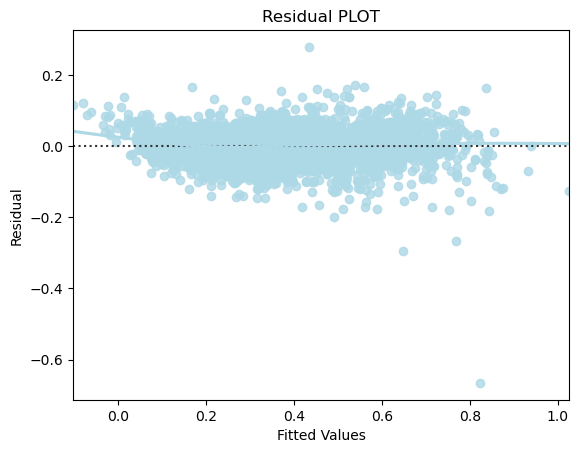

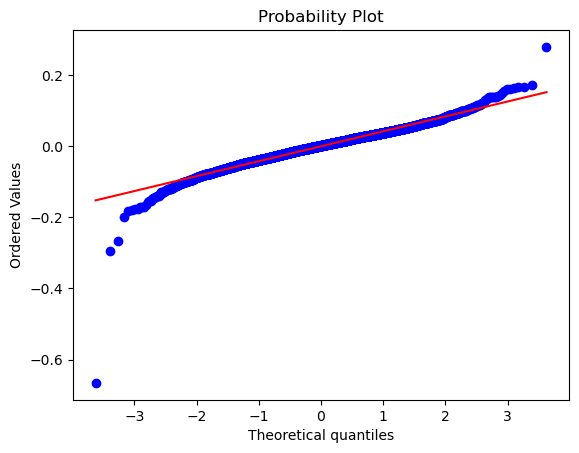

In [83]:
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.model.regression.linear.assumptions.CheckAllRegressionAssumptions import CheckAll4RegressionAssumptions

( 
    Load('dataprep-1.4-after-perf.pkl')
    >> CheckAll4RegressionAssumptions()
)

**Observations**:<br>
1. Residuals mean close to 0, so this first assumption holds
2. No heteroscedasticity: null hypotesis fail so this second assumption holds
3. Linearity of Variables : The error terms are ramdoly distributed around the x axis : this assumption does hold
4. Tests for Normality: we expect normality of error distribution and the previous graph demonstrates a good fit, so assumption 4 holds


Let's see a summary of the model.

**Observation:**<br>
If we set pvalue threshold at 0.05, we can detect some insignificant variables. Same thing if we look at the coefficients - some of them are very low.

So we can optimize probably more.

##### Conclusion

In [84]:
from deepspace.transformers.model.regression.linear.statsmodel.Summary import Summary
( 
    Load('dataprep-1.4-after-perf.pkl')
    >> Summary()
)

Trying to load from dataprep-1.4-after-perf.pkl...
Loading from dataprep-1.4-after-perf.pkl
                            OLS Regression Results                            
Dep. Variable:              Price_Log   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1050.
Date:                Sat, 18 May 2024   Prob (F-statistic):               0.00
Time:                        13:35:22   Log-Likelihood:                 8316.2
No. Observations:                4813   AIC:                        -1.651e+04
Df Residuals:                    4754   BIC:                        -1.613e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------

Here's the linear equation of the model:

In [85]:
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.file.pickle.Save import Save

from deepspace.transformers.model.regression.linear.statsmodel.Equation import LogModelEquation
_ = (
    Load('dataprep-1.4-after-perf.pkl')
    >> LogModelEquation('Price_Log')
)


Trying to load from dataprep-1.4-after-perf.pkl...
Loading from dataprep-1.4-after-perf.pkl
log(Price_Log) = (0.5484052596835839) * const
	+ (0.43872152210557086) * Power
	+ (-0.4291620869913169) * Age
	+ (0.21667604292111356) * Fuel_Type_Electric
	+ (0.17501511014579016) * Engine
	+ (0.1694568301634935) * Brand_MINI
	+ (0.15824913849325573) * Brand_LAND
	+ (-0.13454683938743178) * Brand_SMART
	+ (-0.12264745334117647) * Brand_DATSUN
	+ (-0.11691966634924753) * Kilometers_Driven_Log
	+ (-0.1101937133392506) * Brand_TATA
	+ (0.10318826349209857) * Brand_JAGUAR
	+ (0.0977398900066729) * Brand_PORSCHE
	+ (0.09430013644113748) * Brand_MERCEDES-BENZ
	+ (0.088820756944383) * Brand_AUDI
	+ (-0.08661482231667898) * Brand_CHEVROLET
	+ (0.08542533310919868) * Brand_BMW
	+ (-0.08065399672012176) * Mileage
	+ (-0.08033363460341487) * Brand_FIAT
	+ (-0.06799543631825983) * Brand_ISUZU
	+ (-0.0667086438753259) * Brand_MAHINDRA
	+ (-0.06280948102505317) * Seats_5.0
	+ (-0.06096343608617741) * Seats_4

But here Age seems to be a nonsignificant feature. We should rerun our non significant feature algorithm. But we think our model is enough for now.

#### **Ridge** Model #1.5

In [86]:
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.file.pickle.Save import Save
from deepspace.transformers.model.regression.linear.sklearn.Ridge.Model import Model as Ridge
from deepspace.transformers.model.regression.linear.sklearn.Ridge.performance.CalcNView import CalcNView as Performance

_ = ( 
    Load('dataprep-1.3-final-after-perf.pkl')
	>> Ridge()
    >> Performance('ridge-1.5', saveto='userd-cars-price--performance-store.pkl', kind='synthetic')
    >> Save('ridge-1.5-ridge-after-perf.pkl')
)

Trying to load from dataprep-1.3-final-after-perf.pkl...
Loading from dataprep-1.3-final-after-perf.pkl


Trying to save to userd-cars-price--performance-store.pkl...
Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl
Saving to userd-cars-price--performance-store.pkl
Trying to save to ridge-1.5-ridge-after-perf.pkl...
Saving to ridge-1.5-ridge-after-perf.pkl


**Observations:** We have similar resultas as our last handmade model. We have no overfitting.

#### **Lasso** Model #1.6

In [87]:
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.file.pickle.Save import Save
from deepspace.transformers.model.regression.linear.sklearn.Lasso.Model import Model as Lasso
from deepspace.transformers.model.regression.linear.sklearn.Lasso.performance.CalcNView import CalcNView as Performance

_ = ( 
    Load('dataprep-1.3-final-after-perf.pkl')
	>> Lasso()
    >> Performance('lasso-1.6', saveto='userd-cars-price--performance-store.pkl', kind='synthetic')
    >> Save('lasso-1.6-after-perf.pkl')
)



Trying to load from dataprep-1.3-final-after-perf.pkl...
Loading from dataprep-1.3-final-after-perf.pkl


Trying to save to userd-cars-price--performance-store.pkl...
Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl
Saving to userd-cars-price--performance-store.pkl
Trying to save to lasso-1.6-after-perf.pkl...
Saving to lasso-1.6-after-perf.pkl


**Observations:** We observe the equivalence of R-squared and RMSE here for test and train data, which tells us there is no overfitting here. But this is a very bad model, and by far less interesting than Ridge model or our last handmade model. 

### **Decision Trees**

#### **Decision Tree Model #1**

##### Configuration
* We don't process outliers as Decision Trees are not affected by them
* We impute nulls 
* We keep 'Name' feature
* We drop 'S.No.', 'New_price' features

##### Data preparation

In [88]:
#here we adjust the columns that are useful for our analysis
from deepspace.transformers.column.categorical.Adjust import Adjust as CatAdjuster 
from deepspace.transformers.column.numerical.Adjust import Adjust as NumAdjuster 
from deepspace.transformers.outliers.Check import CheckOutliers 
from deepspace.transformers.outliers.Process import ProcessOutliers 
from deepspace.transformers.null.Check import CheckNulls
from deepspace.transformers.duplicates.CheckDuplicated import CheckDuplicated
from deepspace.transformers.duplicates.DropDuplicates import DropDuplicates
from deepspace.transformers.null.Process import ProcessImputation
from deepspace.transformers.encode.X.BeforeSplit import EncoderBeforeSplit
from deepspace.transformers.separate.Separator import Separator
from deepspace.transformers.split.Splitter import Splitter
from deepspace.transformers.column.Target import Adjust as TargetAdjuster
from deepspace.transformers.column.Drop import Adjust as DropAdjuster
from deepspace.transformers.drop.DropCols import DropCols
from deepspace.transformers.file.pickle.Save import Save
from deepspace.transformers.file.Load import CSVLoader
from deepspace.transformers.chain.Milestone import Milestone

file = r'used_cars.csv'
file = r'C:\Users\fdemb\Documents\Work\Projets\AI\MIT\Capstone Project\lib\used_cars.csv'

_ = ( 
        CSVLoader(file, ",")
        #>> ProcessOutliers(num_cols=['Kilometers_Driven'], factor=10, method='median')
        #>> CheckOutliers() 
        >> ProcessImputation(cat_cols=['Seats'], num_cols=['Mileage', 'Engine', 'Power']) 
        >> ProcessImputation(num_cols=['Price'], method='drop') 
        >> CheckNulls() 
        >> CatAdjuster([     
                        'Location',
                        #'Name',
                        'Year',
                        'Fuel_Type',
                        'Transmission',
                        'Seats', #not continuous, but ordinal data
                        'Owner_Type'])
        >> NumAdjuster([
                        'Kilometers_Driven',
                        'Mileage',
                        'Engine',
                        'Power',
                        'Price',
                ])
        >> DropAdjuster(drop_cols=['S.No.', 'New_price'])
        >> DropCols()
        >> CheckNulls()
        >> CheckDuplicated()
        >> DropDuplicates()
        >> CheckDuplicated()                
        >> TargetAdjuster(target_col='Price')
        >> EncoderBeforeSplit()
        >> Separator()
        >> Splitter()
        >> Save('dataprep-dt-1.pkl')
)


num cols to impute
['Mileage', 'Engine', 'Power']
cat cols to impute
['Seats']
df cols
Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_price', 'Price'],
      dtype='object')


impute_nulls : removing 1234 rows for Price


cols to drop S.No.,New_price
remaining cols to drop cols S.No.,New_price
remaining cols Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


Duplicates found : 0
Duplicates found : 0
-> considering cat cols = Location, Year, Fuel_Type, Transmission, Seats, Owner_Type
Index(['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Year_1999', 'Year_2000', 'Year_2001', 'Year_2002',
       'Year_2003', 'Year_2004', 'Year_2005', 'Year_2006', 'Year_2007',
       'Year_2008', 'Year_2009', 'Year_2010', 'Year_2011', 'Year_2012',
       'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016', 'Year_2017',
       'Year_2018', 'Year_2019', 'Fuel_Type_Diesel', 'Fuel_Type_Electric',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Manual', 'Seats_4.0',
       'Seats_5.0', 'Seats_6.0', 'Seats_7.0', 'Seats_8.0', 'Seats_9.0',
       'Seats_10.0', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_

##### Modeling

In [89]:
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.file.pickle.Save import Save
from deepspace.transformers.model.regression.tree.Model import Model as DTreeRegressor
from deepspace.transformers.model.regression.tree.performance.CalcNView import CalcNView as Performance

_ = ( 
    Load('dataprep-dt-1.pkl')
	>> DTreeRegressor()
    >> Performance('dataprep-decision-tree-1.0', saveto='userd-cars-price--performance-store.pkl', kind='natural')
    >> Save('dataprep-dt-1-after-perf.pkl')
)



Trying to load from dataprep-dt-1.pkl...
Loading from dataprep-dt-1.pkl
shapes  (4815, 50) (1204, 50)
<class 'sklearn.tree._classes.DecisionTreeRegressor'>
<class 'sklearn.tree._classes.DecisionTreeRegressor'>


Trying to save to userd-cars-price--performance-store.pkl...
Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl
Saving to userd-cars-price--performance-store.pkl
Trying to save to dataprep-dt-1-after-perf.pkl...
Saving to dataprep-dt-1-after-perf.pkl


**Observations:** This model si clearly overfitting: Rsquared is 1, our RMSE is nearly 0, and we don't have the same values for test data. We can try optimizing the depth of the tree or other hyparameters, or adding engineered features.

Let's first set max_depth to 10 and 5 to see if we get better results.

##### Performance Comparaison

There are 3 kinds of performance:
1. natural : with no transformation (scaling, logarithm, etc)
2. synthetic : with transformations
3. naturalized : after reverse transformation of a synthtic 

In [90]:
from deepspace.transformers.chain.Milestone import Milestone
from deepspace.transformers.project.performance.StorageViewer import Performance as ViewStoredProjectPerformance

(ViewStoredProjectPerformance('userd-cars-price--performance-store.pkl', kinds=['natural', 'naturalized']) >> Milestone())

(ViewStoredProjectPerformance('userd-cars-price--performance-store.pkl', kinds=['synthetic']) >> Milestone())

Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl


Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl


**Observations:**

#### **Decision Trees Model #1.1**

In [91]:
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.file.pickle.Save import Save
from deepspace.transformers.model.regression.tree.Model import Model as DTreeRegressor
from deepspace.transformers.model.regression.tree.performance.CalcNView import CalcNView as Performance

_ = ( 
    Load('dataprep-dt-1.pkl')
	>> DTreeRegressor(max_depth=20)
    >> Performance('dataprep-decision-tree-1.1', saveto='userd-cars-price--performance-store.pkl', kind='natural')
    >> Save('dataprep-decision-tree-1.1-after-perf.pkl')
)


Trying to load from dataprep-dt-1.pkl...
Loading from dataprep-dt-1.pkl
shapes  (4815, 50) (1204, 50)
<class 'sklearn.tree._classes.DecisionTreeRegressor'>
<class 'sklearn.tree._classes.DecisionTreeRegressor'>


Trying to save to userd-cars-price--performance-store.pkl...
Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl
Saving to userd-cars-price--performance-store.pkl
Trying to save to dataprep-decision-tree-1.1-after-perf.pkl...
Saving to dataprep-decision-tree-1.1-after-perf.pkl


**Observations:** Here we limited the depth of the tree (by default it end up with all leaves pure, a full grow tree). This model is still overfitting. But it's better. We can try a decrease the depth to 5.


##### Performance Comparaison

There are 3 kinds of performance:
1. natural : with no transformation (scaling, logarithm, etc)
2. synthetic : with transformations
3. naturalized : after reverse transformation of a synthtic 

In [92]:
from deepspace.transformers.chain.Milestone import Milestone
from deepspace.transformers.project.performance.StorageViewer import Performance as ViewStoredProjectPerformance

(ViewStoredProjectPerformance('userd-cars-price--performance-store.pkl', kinds=['natural', 'naturalized']) >> Milestone())

Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl


**Observations:**

#### **Decision Trees Model #1.2**

In [93]:
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.file.pickle.Save import Save
from deepspace.transformers.model.regression.tree.Model import Model as DTreeRegressor
from deepspace.transformers.model.regression.tree.performance.CalcNView import CalcNView as Performance

_ = ( 
    Load('dataprep-dt-1.pkl')
	>> DTreeRegressor(max_depth=5)
    >> Performance('dataprep-decision-tree-1.2', saveto='userd-cars-price--performance-store.pkl', kind='natural')
    >> Save('dataprep-decision-tree-1.2-after-perf.pkl')
)


Trying to load from dataprep-dt-1.pkl...
Loading from dataprep-dt-1.pkl
shapes  (4815, 50) (1204, 50)
<class 'sklearn.tree._classes.DecisionTreeRegressor'>
<class 'sklearn.tree._classes.DecisionTreeRegressor'>


Trying to save to userd-cars-price--performance-store.pkl...
Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl
Saving to userd-cars-price--performance-store.pkl
Trying to save to dataprep-decision-tree-1.2-after-perf.pkl...
Saving to dataprep-decision-tree-1.2-after-perf.pkl


**Observations:** Here we limited the depth of the tree to 5. Rsquared is quite acceptable for traing data, and for test data compared to training data. This model is way better. However RMSE is high for both train and test data.

We can try optimize the hyperparameters.

##### Performance Comparaison

In [94]:
from deepspace.transformers.chain.Milestone import Milestone
from deepspace.transformers.project.performance.StorageViewer import Performance as ViewStoredProjectPerformance

(ViewStoredProjectPerformance('userd-cars-price--performance-store.pkl', kinds=['natural', 'naturalized']) >> Milestone())

Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl


#### **Decision Trees Model #1.3**

In [95]:
import numpy as np
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.file.pickle.Save import Save
from deepspace.transformers.model.regression.tree.Model import Model as DTreeRegressor
from deepspace.transformers.model.regression.tree.performance.CalcNView import CalcNView as Performance
parameters = {'param_grid': {'max_depth': np.arange(2, 7),
              'criterion': ['absolute_error', 'squared_error'],
              'min_samples_leaf': [5, 10, 20, 25]
             }}

_ = ( 
    Load('dataprep-dt-1.pkl')
	>> DTreeRegressor(do_tuning=True, tuning_params=parameters)
    >> Performance('dataprep-decision-tree-1.3', saveto='userd-cars-price--performance-store.pkl', kind='natural')
    >> Save('dataprep-decision-tree-1.3-after-perf.pkl')
)



Trying to load from dataprep-dt-1.pkl...
Loading from dataprep-dt-1.pkl
shapes  (4815, 50) (1204, 50)
{'max_depth': array([2, 3, 4, 5, 6]), 'criterion': ['absolute_error', 'squared_error'], 'min_samples_leaf': [5, 10, 20, 25]}
{'cv': 3, 'verbose': 3, 'scoring': 'neg_mean_squared_error'}
Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV 1/3] END criterion=absolute_error, max_depth=2, min_samples_leaf=5;, score=-49.072 total time=   0.6s
[CV 2/3] END criterion=absolute_error, max_depth=2, min_samples_leaf=5;, score=-67.844 total time=   0.7s
[CV 3/3] END criterion=absolute_error, max_depth=2, min_samples_leaf=5;, score=-58.823 total time=   0.6s
[CV 1/3] END criterion=absolute_error, max_depth=2, min_samples_leaf=10;, score=-49.072 total time=   0.6s
[CV 2/3] END criterion=absolute_error, max_depth=2, min_samples_leaf=10;, score=-67.844 total time=   0.6s
[CV 3/3] END criterion=absolute_error, max_depth=2, min_samples_leaf=10;, score=-58.823 total time=   0.7s
[CV 1/3] EN

Trying to save to userd-cars-price--performance-store.pkl...
Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl
Saving to userd-cars-price--performance-store.pkl
Trying to save to dataprep-decision-tree-1.3-after-perf.pkl...
Saving to dataprep-decision-tree-1.3-after-perf.pkl


**Obervations:**Out GridSearchCV optimize is giving us the best parameters :
* criterion='absolute_error',
* max_depth=6,
* min_samples_leaf=20,
* random_state=1

We try these in our next model.

**Observations:** We observe a better model, with
* R-squared of 0.84, equivalent to adjusted R-squared,
* a MAE of 2 for train and a bit more for test data (2.3)

Maybe we could have a better MAE with another model.
We can try a first model:
* with the same features as for our Linear Model: Model, Age, Kilometers_Driven_Log, Price_Log for instance
* with same hypermeters determined previously (then if it's a good model we wil try to optimize them again)

##### Performance Comparaison

In [96]:
from deepspace.transformers.chain.Milestone import Milestone
from deepspace.transformers.project.performance.StorageViewer import Performance as ViewStoredProjectPerformance

(ViewStoredProjectPerformance('userd-cars-price--performance-store.pkl', kinds=['natural', 'naturalized']) >> Milestone())

Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl


#### **Decision Tree Model #2.0**

##### Configuration

To improve the performance we add here a new feature extracted from the Name feature: Brand.
And see what happens.

##### Feature Engineering

In [97]:
#this code will create brand feature
from deepspace.transformers.Transformer import Transformer
#Specific to current projet
class FeatureEngineerBrandFromName(Transformer):
    '''Target Feature Engineering'''
    def __init__(self):
        Transformer.__init__(self)
    def transform(self, ds):
        df = ds.data
        dfm = df['Name'].str.split(pat = ' ', expand = True)
        df['Brand'] = dfm[0].str.upper()
        #df['Model'] = dfm[1].str.upper()
        return ds

##### Data preparation

In [98]:
from deepspace.transformers.column.categorical.Adjust import Adjust as CatAdjuster 
from deepspace.transformers.column.numerical.Adjust import Adjust as NumAdjuster 
from deepspace.transformers.outliers.Check import CheckOutliers 
from deepspace.transformers.outliers.Process import ProcessOutliers 
from deepspace.transformers.null.Check import CheckNulls
from deepspace.transformers.duplicates.CheckDuplicated import CheckDuplicated
from deepspace.transformers.duplicates.DropDuplicates import DropDuplicates
from deepspace.transformers.null.Process import ProcessImputation
from deepspace.transformers.encode.X.BeforeSplit import EncoderBeforeSplit
from deepspace.transformers.separate.Separator import Separator
from deepspace.transformers.split.Splitter import Splitter
from deepspace.transformers.column.Target import Adjust as TargetAdjuster
from deepspace.transformers.column.Drop import Adjust as DropAdjuster
from deepspace.transformers.drop.DropCols import DropCols
from deepspace.transformers.file.pickle.Save import Save
from deepspace.transformers.file.Load import CSVLoader
from deepspace.transformers.chain.Milestone import Milestone

file = r'used_cars.csv'
file = r'C:\Users\fdemb\Documents\Work\Projets\AI\MIT\Capstone Project\lib\used_cars.csv'

_ = ( 
        CSVLoader(file, ",")
        #>> ProcessOutliers(num_cols=['Kilometers_Driven'], factor=10, method='median')
        #>> CheckOutliers() 
        >> ProcessImputation(cat_cols=['Seats'], num_cols=['Mileage', 'Engine', 'Power']) 
        >> ProcessImputation(num_cols=['Price'], method='drop') 
        >> CheckNulls() 
        >> FeatureEngineerBrandFromName()
        >> CatAdjuster([     
                        'Location',
                        'Brand',
                        'Year',
                        'Fuel_Type',
                        'Transmission',
                        'Seats', #not continuous, but ordinal data
                        'Owner_Type'])
        >> NumAdjuster([
                        'Kilometers_Driven',
                        'Mileage',
                        'Engine',
                        'Power',
                        'Price',
                ])
        >> DropAdjuster(drop_cols=['S.No.', 'Name', 'New_price'])
        >> DropCols()
        >> CheckNulls()
        >> CheckDuplicated()
        >> DropDuplicates()
        >> CheckDuplicated()                
        >> TargetAdjuster(target_col='Price')
        >> EncoderBeforeSplit()
        >> Separator()
        >> Splitter()
        >> Save('dataprep-dt-2.pkl')
)


num cols to impute
['Mileage', 'Engine', 'Power']
cat cols to impute
['Seats']
df cols
Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_price', 'Price'],
      dtype='object')


impute_nulls : removing 1234 rows for Price


cols to drop S.No.,Name,New_price
remaining cols to drop cols S.No.,Name,New_price
remaining cols Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand


Duplicates found : 2
Duplicates found : 0
-> considering cat cols = Location, Brand, Year, Fuel_Type, Transmission, Seats, Owner_Type
Index(['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Brand_AUDI', 'Brand_BENTLEY', 'Brand_BMW',
       'Brand_CHEVROLET', 'Brand_DATSUN', 'Brand_FIAT', 'Brand_FORCE',
       'Brand_FORD', 'Brand_HONDA', 'Brand_HYUNDAI', 'Brand_ISUZU',
       'Brand_JAGUAR', 'Brand_JEEP', 'Brand_LAMBORGHINI', 'Brand_LAND',
       'Brand_MAHINDRA', 'Brand_MARUTI', 'Brand_MERCEDES-BENZ', 'Brand_MINI',
       'Brand_MITSUBISHI', 'Brand_NISSAN', 'Brand_PORSCHE', 'Brand_RENAULT',
       'Brand_SKODA', 'Brand_SMART', 'Brand_TATA', 'Brand_TOYOTA',
       'Brand_VOLKSWAGEN', 'Brand_VOLVO', 'Year_1999', 'Year_2000',
       'Year_2001', 'Year_20

##### Modeling

In [99]:
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.model.regression.tree.Model import Model as DTreeRegressor
from deepspace.transformers.model.regression.tree.performance.CalcNView import CalcNView as Performance

_ = ( 
    Load('dataprep-dt-2.pkl')
	>> DTreeRegressor()
    >> Performance('dataprep-decision-tree-2.0', saveto='userd-cars-price--performance-store.pkl', kind='natural')
    >> Save('dataprep-decision-tree-2.0-after-perf.pkl')
)

Trying to load from dataprep-dt-2.pkl...
Loading from dataprep-dt-2.pkl
shapes  (4813, 79) (1204, 79)
<class 'sklearn.tree._classes.DecisionTreeRegressor'>
<class 'sklearn.tree._classes.DecisionTreeRegressor'>


Trying to save to userd-cars-price--performance-store.pkl...
Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl
Saving to userd-cars-price--performance-store.pkl
Trying to save to dataprep-decision-tree-2.0-after-perf.pkl...
Saving to dataprep-decision-tree-2.0-after-perf.pkl


##### Performance Comparaison

In [100]:
from deepspace.transformers.chain.Milestone import Milestone
from deepspace.transformers.project.performance.StorageViewer import Performance as ViewStoredProjectPerformance

(ViewStoredProjectPerformance('userd-cars-price--performance-store.pkl', kinds=['natural', 'naturalized']) >> Milestone())

Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl


#### **Decision Tree Model #2.1**

##### Configuration

We try here to tune the parameters with KFold and GriSearch.

##### Modeling

In [101]:
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.model.regression.tree.Model import Model as DTreeRegressor
from deepspace.transformers.model.regression.tree.performance.CalcNView import CalcNView as Performance
parameters = {'param_grid': {'max_depth': np.arange(2, 7),
              'criterion': ['absolute_error', 'squared_error'],
              'min_samples_leaf': [5, 10, 20, 25]
             }}
_ = ( 
    Load('dataprep-dt-2.pkl')
	>> DTreeRegressor(do_tuning=True, tuning_params=parameters)
    >> Performance('dataprep-decision-tree-2.1', saveto='userd-cars-price--performance-store.pkl', kind='natural')
    >> Save('dataprep-decision-tree-2.1-after-perf.pkl')
)

Trying to load from dataprep-dt-2.pkl...
Loading from dataprep-dt-2.pkl
shapes  (4813, 79) (1204, 79)
{'max_depth': array([2, 3, 4, 5, 6]), 'criterion': ['absolute_error', 'squared_error'], 'min_samples_leaf': [5, 10, 20, 25]}
{'cv': 3, 'verbose': 3, 'scoring': 'neg_mean_squared_error'}
Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV 1/3] END criterion=absolute_error, max_depth=2, min_samples_leaf=5;, score=-53.072 total time=23.7min
[CV 2/3] END criterion=absolute_error, max_depth=2, min_samples_leaf=5;, score=-65.115 total time=   2.8s
[CV 3/3] END criterion=absolute_error, max_depth=2, min_samples_leaf=5;, score=-59.637 total time=31.9min
[CV 1/3] END criterion=absolute_error, max_depth=2, min_samples_leaf=10;, score=-53.072 total time=   3.5s
[CV 2/3] END criterion=absolute_error, max_depth=2, min_samples_leaf=10;, score=-65.115 total time=   3.9s
[CV 3/3] END criterion=absolute_error, max_depth=2, min_samples_leaf=10;, score=-59.637 total time=   2.5s
[CV 1/3] EN

Trying to save to userd-cars-price--performance-store.pkl...
Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl
Saving to userd-cars-price--performance-store.pkl
Trying to save to dataprep-decision-tree-2.1-after-perf.pkl...
Saving to dataprep-decision-tree-2.1-after-perf.pkl


##### Performance Comparaison

In [102]:
from deepspace.transformers.chain.Milestone import Milestone
from deepspace.transformers.project.performance.StorageViewer import Performance as ViewStoredProjectPerformance

(ViewStoredProjectPerformance('userd-cars-price--performance-store.pkl', kinds=['natural', 'naturalized']) >> Milestone())

Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl


#### **Decision Tree Model #3**

##### Configuration

##### Feature Engineering

In [103]:
#creates Age from Year
import datetime as dt
import pandas as pd
from deepspace.transformers.Transformer import Transformer

class FeatureEngineerAgeFromYear(Transformer):
    '''Target Feature Engineering'''
    def __init__(self):
        Transformer.__init__(self)
    def transform(self, ds):
        df = ds.data
        maxY = str(df['Year'].max())
        #print(maxY)
        dfDDMMYYYY = '01'+'-01-'+df['Year'].astype(str)
        df['Age']  = dt.datetime.strptime(maxY, "%Y")-pd.to_datetime(dfDDMMYYYY, dayfirst=True)
        df['Age'] = df['Age'].dt.days
        return 

##### Data preparation

In [104]:
from deepspace.transformers.column.categorical.Adjust import Adjust as CatAdjuster 
from deepspace.transformers.column.numerical.Adjust import Adjust as NumAdjuster 
from deepspace.transformers.outliers.Check import CheckOutliers 
from deepspace.transformers.outliers.Process import ProcessOutliers 
from deepspace.transformers.null.Check import CheckNulls
from deepspace.transformers.duplicates.CheckDuplicated import CheckDuplicated
from deepspace.transformers.duplicates.DropDuplicates import DropDuplicates
from deepspace.transformers.null.Process import ProcessImputation
from deepspace.transformers.encode.X.BeforeSplit import EncoderBeforeSplit
from deepspace.transformers.separate.Separator import Separator
from deepspace.transformers.split.Splitter import Splitter
from deepspace.transformers.column.Target import Adjust as TargetAdjuster
from deepspace.transformers.column.Drop import Adjust as DropAdjuster
from deepspace.transformers.drop.DropCols import DropCols
from deepspace.transformers.file.pickle.Save import Save
from deepspace.transformers.file.Load import CSVLoader
from deepspace.transformers.chain.Milestone import Milestone

file = r'used_cars.csv'
file = r'C:\Users\fdemb\Documents\Work\Projets\AI\MIT\Capstone Project\lib\used_cars.csv'

_ = ( 
        CSVLoader(file, ",")
        #>> ProcessOutliers(num_cols=['Kilometers_Driven'], factor=10, method='median')
        #>> CheckOutliers() 
        >> ProcessImputation(cat_cols=['Seats'], num_cols=['Mileage', 'Engine', 'Power']) 
        >> ProcessImputation(num_cols=['Price'], method='drop') 
        >> CheckNulls() 
        >> FeatureEngineerBrandFromName()
        >> FeatureEngineerAgeFromYear()
        >> CatAdjuster([     
                        'Location',
                        'Brand', #Name
                        'Fuel_Type',
                        'Transmission',
                        'Seats', #not continuous, but ordinal data
                        'Owner_Type'])
        >> NumAdjuster([
                        'Kilometers_Driven',
                        'Age', #'Year',
                        'Mileage',
                        'Engine',
                        'Power',
                        'Price',
                ])
        >> DropAdjuster(drop_cols=['S.No.', 'Year', 'Name', 'New_price'])
        >> DropCols()
        >> CheckNulls()
        >> CheckDuplicated()
        >> DropDuplicates()
        >> CheckDuplicated()                
        >> TargetAdjuster(target_col='Price')
        >> EncoderBeforeSplit()
        >> Separator()
        >> Splitter()
        >> Save('dataprep-dt-3.pkl')
)


num cols to impute
['Mileage', 'Engine', 'Power']
cat cols to impute
['Seats']
df cols
Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_price', 'Price'],
      dtype='object')


impute_nulls : removing 1234 rows for Price


cols to drop S.No.,Year,Name,New_price
remaining cols to drop cols S.No.,Year,Name,New_price
remaining cols Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Age


Duplicates found : 2
Duplicates found : 0
-> considering cat cols = Location, Brand, Fuel_Type, Transmission, Seats, Owner_Type
Index(['Kilometers_Driven', 'Age', 'Mileage', 'Engine', 'Power', 'Price',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Brand_AUDI', 'Brand_BENTLEY', 'Brand_BMW',
       'Brand_CHEVROLET', 'Brand_DATSUN', 'Brand_FIAT', 'Brand_FORCE',
       'Brand_FORD', 'Brand_HONDA', 'Brand_HYUNDAI', 'Brand_ISUZU',
       'Brand_JAGUAR', 'Brand_JEEP', 'Brand_LAMBORGHINI', 'Brand_LAND',
       'Brand_MAHINDRA', 'Brand_MARUTI', 'Brand_MERCEDES-BENZ', 'Brand_MINI',
       'Brand_MITSUBISHI', 'Brand_NISSAN', 'Brand_PORSCHE', 'Brand_RENAULT',
       'Brand_SKODA', 'Brand_SMART', 'Brand_TATA', 'Brand_TOYOTA',
       'Brand_VOLKSWAGEN', 'Brand_VOLVO', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fue

##### Modeling

In [105]:
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.model.regression.tree.Model import Model as DTreeRegressor
from deepspace.transformers.model.regression.tree.performance.CalcNView import CalcNView as Performance

_ = ( 
    Load('dataprep-dt-3.pkl')
	>> DTreeRegressor()
    >> Performance('dataprep-decision-tree-3.0', saveto='userd-cars-price--performance-store.pkl', kind='natural')
    >> Save('dataprep-decision-tree-3.0-after-perf.pkl')
) 

Trying to load from dataprep-dt-3.pkl...
Loading from dataprep-dt-3.pkl
shapes  (4813, 59) (1204, 59)
<class 'sklearn.tree._classes.DecisionTreeRegressor'>
<class 'sklearn.tree._classes.DecisionTreeRegressor'>


Trying to save to userd-cars-price--performance-store.pkl...
Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl
Saving to userd-cars-price--performance-store.pkl
Trying to save to dataprep-decision-tree-3.0-after-perf.pkl...
Saving to dataprep-decision-tree-3.0-after-perf.pkl


**Observations:**<br>
This model is overfitting. 
We'll be trying to tune it in the next section. 

##### Performance Comparaison

In [106]:
from deepspace.transformers.chain.Milestone import Milestone
from deepspace.transformers.project.performance.StorageViewer import Performance as ViewStoredProjectPerformance

(ViewStoredProjectPerformance('userd-cars-price--performance-store.pkl', kinds=['natural', 'naturalized']) >> Milestone())

Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl


#### **Decision Tree Model #3.1 (tuning of DT Model #3.1)**

##### Configuration

We try here to tune the parameters with KFold and GriSearch.

##### Modeling

In [ ]:
import numpy as np
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.model.regression.tree.Model import Model as DTreeRegressor
from deepspace.transformers.model.regression.tree.performance.CalcNView import CalcNView as Performance

parameters = {'param_grid': {'max_depth': np.arange(2, 7),
              'criterion': ['absolute_error', 'squared_error'],
              'min_samples_leaf': [5, 10, 20, 25]
             }}

_ = ( 
    Load('dataprep-dt-3.pkl')
	>> DTreeRegressor(do_tuning=True, tuning_params=parameters)
    >> Performance('dataprep-decision-tree-3.1', saveto='userd-cars-price--performance-store.pkl', kind='natural')
    >> Save('dataprep-decision-tree-3.1-after-perf.pkl')
)

**Observations:** We have a quite good model here. Let's try if can get a better one through hyperparameters opitmisation.

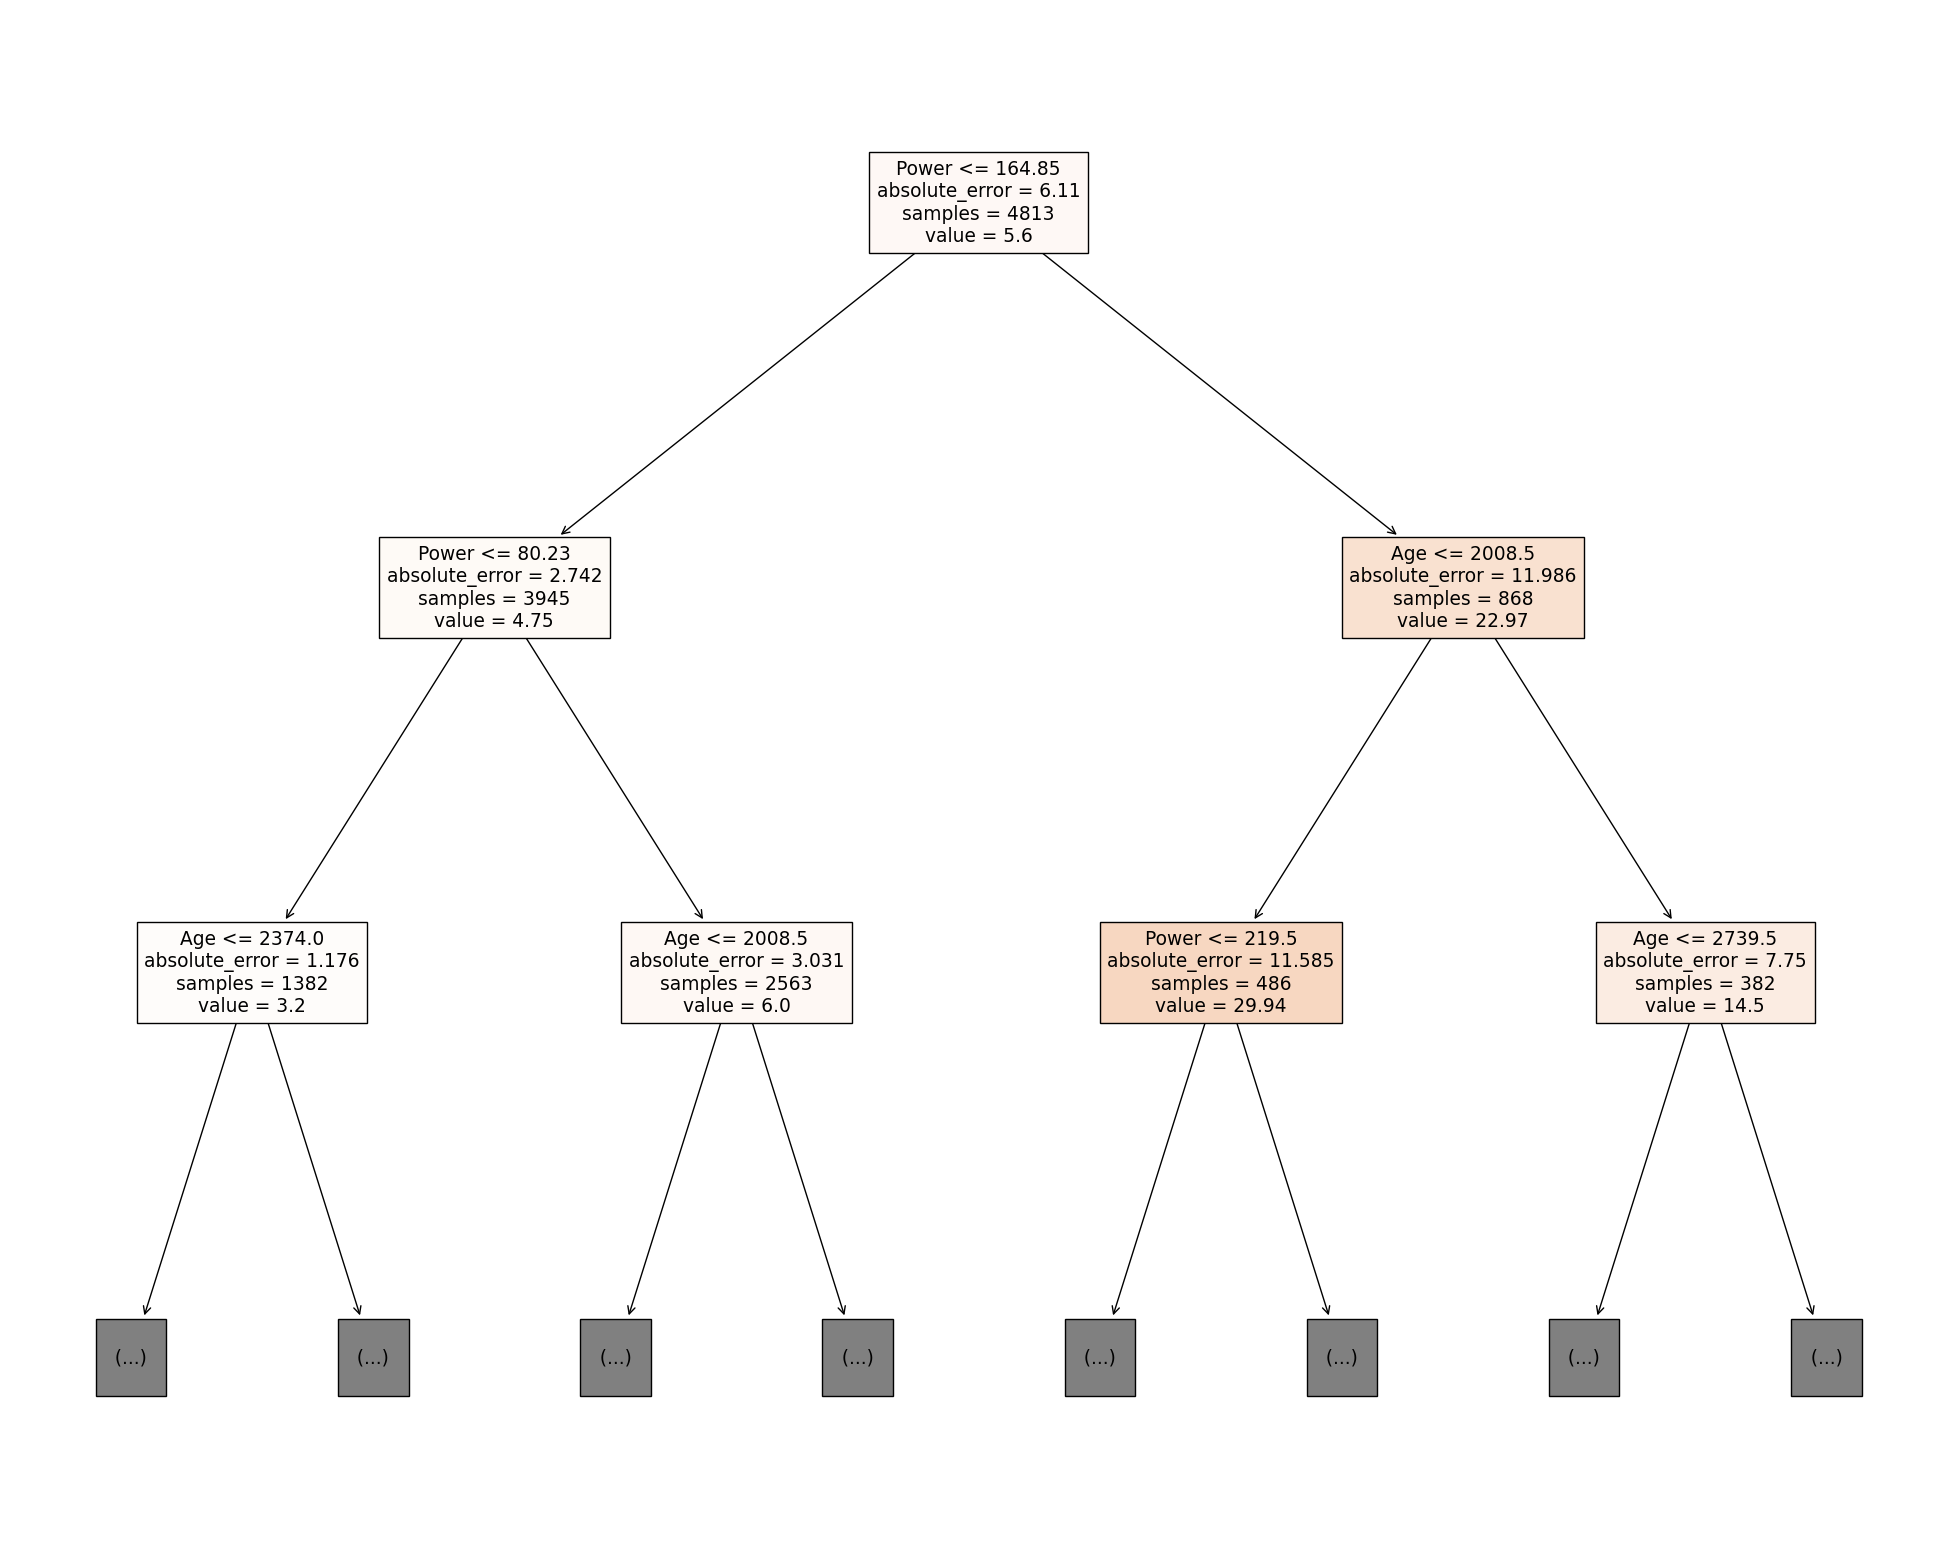

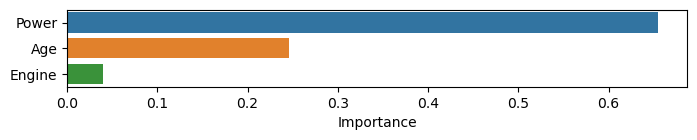

In [108]:
from deepspace.transformers.model.regression.tree.ShowTree import ShowTree
from deepspace.transformers.model.regression.tree.ShowFeatures import ShowMainFeatures, SaveMainFeatures

( 
    _
    >> ShowTree(max_depth=2)
    >> ShowMainFeatures(saveto=r'dataprep-dt-3-tuned--tree.png')
)


**Observations:** <br>
Here we can see which features are most important, namely:
1. Power
2. Age
3. Engine
Nor the model, nor the localtion, nor the fuel type or the number of seats is important in reality - as far as this model is conerned.

We observe also that Kilometers_Drivern weight is way below these 3. Which means it's not such a critical decision criteria as we expected.

**Obervations:**Out GridSearchCV optimize is giving us the best parameters :
* max_depth=6,
* min_samples_leaf=10,
* random_state=1

We can observe that the minimum number of leafs is now half of the previous model, and no metric is given. But max_depth is the same.

We can try these parameters in our next model.
We will stick to absolute_error.



##### Performance Comparaison

In [109]:
from deepspace.transformers.chain.Milestone import Milestone
from deepspace.transformers.project.performance.StorageViewer import Performance as ViewStoredProjectPerformance

(ViewStoredProjectPerformance('userd-cars-price--performance-store.pkl', kinds=['natural', 'naturalized']) >> Milestone())

Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl


#### **Bagging Model #3.2**

In [110]:
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.file.pickle.Save import Save
from deepspace.transformers.model.regression.tree.ensemble.bagging.Model import Model as Bagging
from deepspace.transformers.model.regression.tree.ensemble.bagging.performance.CalcNView import CalcNView as Performance

_ = ( 
    Load('dataprep-dt-3.pkl')
	>> Bagging()
    >> Performance('bagging-3.2', saveto='userd-cars-price--performance-store.pkl', kind='natural')
    >> Save('bagging-3.2-after-perf.pkl')
)

Trying to load from dataprep-dt-3.pkl...
Loading from dataprep-dt-3.pkl
shapes  (4813, 59) (1204, 59)
<class 'sklearn.ensemble._bagging.BaggingRegressor'>
<class 'sklearn.ensemble._bagging.BaggingRegressor'>


Trying to save to userd-cars-price--performance-store.pkl...
Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl
Saving to userd-cars-price--performance-store.pkl
Trying to save to bagging-3.2-after-perf.pkl...
Saving to bagging-3.2-after-perf.pkl


**Observations:** Bagging is not doing much better: Our Rsquared in training data is close to 1. And our RMSE is very high in test data compared to train data. We conclude that our model is not yet acceptable.

#### **Random Forest Model #3.3**

In [111]:
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.file.pickle.Save import Save

from deepspace.transformers.model.regression.tree.ensemble.randomforest.Model import Model as RandomForest
from deepspace.transformers.model.regression.tree.ensemble.randomforest.performance.CalcNView import CalcNView as Performance

_ = ( 
    Load('dataprep-dt-3.pkl')
    >> RandomForest()
    >> Performance('randomforest-3.3', saveto='userd-cars-price--performance-store.pkl', kind='natural')
    >> Save('randomforest-3.3-after-perf.pkl')
)



Trying to load from dataprep-dt-3.pkl...
Loading from dataprep-dt-3.pkl
shapes  (4813, 59) (1204, 59)
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
<class 'sklearn.ensemble._forest.RandomForestRegressor'>


Trying to save to userd-cars-price--performance-store.pkl...
Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl
Saving to userd-cars-price--performance-store.pkl
Trying to save to randomforest-3.3-after-perf.pkl...
Saving to randomforest-3.3-after-perf.pkl


**Observations:** Same here. Random Forest is not doing much better. Our Rsquared is close to 1 and RMSE is too high in test data. This model is overfitting.

Let's try to optimize hyperparameters.

#### **Random Forest Model #3.4**

In [113]:
import numpy as np
from deepspace.transformers.file.pickle.Load import Load
from deepspace.transformers.file.pickle.Save import Save
from deepspace.transformers.model.regression.tree.ensemble.randomforest.Model import Model as RandomForest
from deepspace.transformers.model.regression.tree.ensemble.randomforest.performance.CalcNView import CalcNView as Performance

parameters = {'param_grid': {'max_depth': np.arange(2, 7),
              'criterion': ['absolute_error', 'squared_error'],
              'min_samples_leaf': [5, 10, 20, 25]
             }}

_ = ( 
    Load('dataprep-dt-3.pkl')
	>> RandomForest(do_tuning=True, tuning_params=parameters)
    >> Performance('randomforest-3.4', saveto='userd-cars-price--performance-store.pkl', kind='natural')
    >> Save('randomforest-3.4-after-perf.pkl')
)

[CV 1/3] END criterion=absolute_error, max_depth=6, min_samples_leaf=5;, score=-17.782 total time=  40.3s
[CV 2/3] END criterion=absolute_error, max_depth=6, min_samples_leaf=5;, score=-22.171 total time=  37.6s
[CV 3/3] END criterion=absolute_error, max_depth=6, min_samples_leaf=5;, score=-24.300 total time=  37.3s
[CV 1/3] END criterion=absolute_error, max_depth=6, min_samples_leaf=10;, score=-19.831 total time=  34.2s
[CV 2/3] END criterion=absolute_error, max_depth=6, min_samples_leaf=10;, score=-23.275 total time=  34.1s
[CV 3/3] END criterion=absolute_error, max_depth=6, min_samples_leaf=10;, score=-24.600 total time=  35.8s
[CV 1/3] END criterion=absolute_error, max_depth=6, min_samples_leaf=20;, score=-22.311 total time=  36.4s
[CV 2/3] END criterion=absolute_error, max_depth=6, min_samples_leaf=20;, score=-26.676 total time=  31.0s
[CV 3/3] END criterion=absolute_error, max_depth=6, min_samples_leaf=20;, score=-25.595 total time=  31.2s
[CV 1/3] END criterion=absolute_error, m

Trying to save to userd-cars-price--performance-store.pkl...
Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl
Saving to userd-cars-price--performance-store.pkl
Trying to save to randomforest-3.4-after-perf.pkl...
Saving to randomforest-3.4-after-perf.pkl


**Obervations:**The best parameters given after optimisation are as follows:
* max_depth=6,
* min_samples_leaf=5

We can stick to absolute_error because the optimizer does not propose a metric criterion.



**Observation:**
* Our R-squared metric is close to 1 without overfitting for train data as well as test data
* The value for R-squared is comparable for both test and train data  
* RMSE is low also and means that in the case of test data the error on Price is +/-3.4 

We can conclude that the model is quite good

Trying to load from randomforest-3.4-after-perf.pkl...
Loading from randomforest-3.4-after-perf.pkl


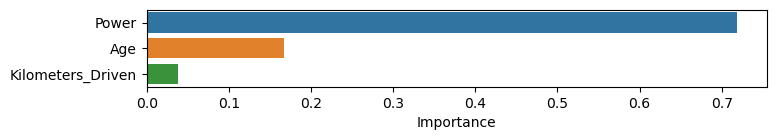

In [116]:
from deepspace.transformers.model.regression.tree.ShowTree import ShowTree
from deepspace.transformers.model.regression.tree.ShowFeatures import ShowMainFeatures, SaveMainFeatures

( 
    Load('randomforest-3.4-after-perf.pkl')
    >> ShowMainFeatures(saveto=r'dataprep-dt-3-tuned--tree.png')
)


**Conclusion:**

In [118]:
from deepspace.transformers.chain.Milestone import Milestone
from deepspace.transformers.project.performance.StorageViewer import Performance as ViewStoredProjectPerformance

(ViewStoredProjectPerformance('userd-cars-price--performance-store.pkl', kinds=['natural', 'naturalized']) >> Milestone())
#here are all the metrics for all the models that have been build so far
#we chose only those that are comparable

Trying to load from userd-cars-price--performance-store.pkl...
Loading from userd-cars-price--performance-store.pkl


#### **Hyperparameter Tuning: Decision Tree**

**Observations:** The most important features are Power, Age and Kilometers_Driven.

#### **Hyperparameter Tuning: Decision Tree**

In [ ]:
#Please refer to "Decision Tree Model #3" above.

Please refer to "Decision Tree Model #3" above.

**Feature Importance**

In [ ]:
#Please refer to "Decision Tree Model #3" above.

**Observations:** The most important features are Power, Age and Kilometers_Driven.

#### **Hyperparameter Tuning: Random Forest**

In [ ]:
# Please refer to Random Forest Model #4.1

**Feature Importance**

In [ ]:
# Please refer to Random Forest Model #4.1

**Observations:** The most important features are Power, Age and Kilometers_Driven.

## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

We tried different techniques and different models: multiple models like linear regression, multiple models like decision tree regressors.

The one that is best is Random Forest. Indeed this one outperformed the others and has the folowing performance :

|     -      |     RMSE	|R-squared	|Adj. R-squared |
|          ---|     ---|---	|--- |
|train	|3.7	|0.89	|0.89       |
|test	|3.4	|0.89	|0.88       |

R-squared is about 0.88 for both test and trains data, which is excellent - no overfitting, no undefitting. And RMSE is 3.4 which sufficiantly low to accept the model.

Note that in decision trees we did not use logarithm transformations to avoid the impact of outliers. So we had to inverse the logarithm, i.e. exponenciate, on all the other models that used this technique so that we could compare them. 



**2. Refined insights:**
- What are the most meaningful insights relevant to the problem?

We learned that the most important features are Power, Age and Kilometers_Driven. In that order. Our guess was that Age then Kilometers_Driven, but we did not expect Power as a top decision criteria.

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?



The most performing model is Random Forest with the following parameters :
* max_depth=6,
* min_samples_leaf=5,
* criterion=squared_error

However if consider the Price average, witch is about 10, we have a guess between 6.6 and 13.4 if we consider on test data only. We can't decide if this acceptable and need the evaluation of a business specialist.  

Also we could try to improve this one by setting changing the optimization parameters for instance CV value, which we didn't try in this delivery.

However, even if Decision Trees are simple to interpret, with high level of prediction on non-linear data, they are not stable, as they are prone to minor changes in the data.
So the question is:
* if minor changes impact the model, should we collect new data regularly ? should we create a new model again regularity based on new data ? what is the frequency ?  
* does that impact the prediction ?
* what is the impact of approximations for the seller ? I mean if he doesn't know the characteristics of it's model precisely ?    ==> the model depends on some major features which should not be biaised like Engine, Mileage, etc

We also checked the main assumptions on residuals and the model proved holding all of them. The model is thus trustable.

Also we could try to improve this one by setting trying feature engineering technique and create other features.
But for now and as a first delivery the model is sufficiant.
Maybe we can try other modeling techniques before deciding, like for example Deep Learning.

Note: Due to a lack of time, this section is not complete.